# S2 Width study

Miguel Ángel Vargas, February - March 2016.

## Motivation
Study of S2 signal width reprocesing Xenon100 data with PAX.

### Goals

(Analysis related)

* Produce an introductory and self-explanatory script (at least for me) to analyze data from XENON100 (hopefully with a later application to XENON1T too). 

(Physics related)

* Explore the consistency cut on the S2 pulse width needed when using PAX, given the way PAX classifies S2 candidate signals (e.g. overlapping peaks), see _Introduction_.
 
_Although the extension of all that can be done is not completely clear yet_, **some ways to progress are**:
    
 * Describe S2 pulse width dependence on energy and drift time
     * Fit these dependencies
 * Fit the S2 pulse width correction map and its time drift behavior
 * Determine the dependence of the longitudinal diffusion coefficient on an applied electric field E.
 * (Maybe) Quantify the horizontal gas gap width dependence.
 
**These, at least for now, would lead us to set a consistency condition that relates the longitudinal electron diffusion (S2 pulse width) in liquid xenon to the z coordinate of the interaction vertex.**
 
 * Try to solve especifics related to clustering

** TO DO: Keep learning about issues and relevant proceedures, ask Chris for feedback.**

# Table of content

* [Introduction](#Introduction)
* [Procedure](#Procedure)
    * [Data selection](#Data-selection)
    * [Selection of interesting variables](#Selection-of-interesting-variables)
    * [Cuts](#Cuts)
    * [Exploratory analysis (preview of the data after cuts)](#Exploratory-analysis)
* [Analysis](#Analysis)
    * [Fit Functions](#Fit-functions)
    * [Drift Time parametrization](#Drift-time-parametrization)
        * [S2 width std (dt)](#S2-width-std-%28dt%29)
        * [S2 width 50p (dt)](#S2-width-50p-%28dt%29)
        * [S2 width 90p (dt)](#S2-width-90p-%28dt%29)
        * [S2 width Full (dt)](#S2-width-Full-%28dt%29)
    * [S2 Area parametrization](#S2-area-parametrization)
        * [S2 Area (width std)](#S2-area-%28width-std%29)
        * [S2 Area (width 50p)](#S2-area-%28width-50p%29)
        * [S2 Area (width 90p)](#S2-area-%28width-90p%29)
        * [S2 Area (width full)](#S2-area-%28width-full%29)
    * [Longitudinal diffusion coefficient $d_L$](#Longitudinal-diffusion-coefficient)
* [Annex](#Annex)

# Introduction

## General issue

This is a highly simplified diagram of how Xerawdp works. For more details can be found [here](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon100:analysis:xerawdp:study "Anatomy Xerawdp"). 

**JINX, XeRawDP**
![Im1](https://dl.dropboxusercontent.com/u/32195161/Xerawdpclass.png "JINX, XeRawDP")

Clustering of channel peaks should be done by a sophisticated algorithm, right now only a placeholder is implemented (any gap of more than 0.8 us forces a new cluster, however there are some issues present in clustering, see _Annex_):

**SUPER-PAC**
![Im1](https://dl.dropboxusercontent.com/u/32195161/superpax.png "SUPER-PAC")

## Pax's clustering

The clustering in pax proceeds in two steps:

   * A rough clustering based on gaps between hits;
   * A more refined, recursive clustering algorithm based loosely on 'natural breaks' (a specialized 1d clustering algorithm).

In the first step, we walk through all hits in a detector from left to right. When a gap between hits larger than some threshold _max-gap-size-in-cluster_ is encountered, a new cluster is made.

In the second step, we consider splitting the clusters we got from step 1 at the largest gaps between hits. For each split candidate point, we compute a 'goodness of split' function: if it is higher than some threshold, we split the peak and recurse on the fragments. For more details about clustering see the following [note](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon1t:processor:natural_breaks_clustering "Clustering in Pax"):

**Some example peaks from XENON100 data**
![Im1](https://dl.dropboxusercontent.com/u/32195161/Pax_classification.png "Some example peaks from XENON100 data")

**Illustration of the goodness of split function**
![Im1](https://dl.dropboxusercontent.com/u/32195161/clustering.png "Illustration of the goodness of split function")

**Issue:**

How can define a proper consistency cut on the S2 pulse width for PAX such that we can quantify the impact due to the clustering?

![Im1](https://xecluster.lngs.infn.it/dokuwiki/lib/exe/fetch.php?cache=&media=xenon:xenon100:analysis:sebastian:s2widthreview:s2swidth-vs-dt.png "x")

## Some ways to progress

See Sebastian Lindemann [PhD thesis](http://pubman.mpdl.mpg.de/pubman/item/escidoc:1859172/component/escidoc:1859171/diss_lindemann.pdf "Chapter 2 XENON100 data analysis:  the ionization signal S2 and its pulse width"), the paper Anisotropic diffusion of electrons in liquid xenon with application to improving the sensitivity of direct dark matter searches[1102.2865](http://arxiv.org/pdf/1102.2865v2.pdf  "1102.2865") and Stephen Skocpol [Bachelor thesis](https://esc.fnwi.uva.nl/thesis/centraal/files/f962790082.pdf  "Determining the drift time dependence of S2 width for the XENON100 dark matter").

In standard analysis the **z** coordinate of interaction is obtained from the time delay between the electron **(S2)** and primary scintillation **(S1)** signals. The delay results from the transit time of the electrons through the liquid. The precision is $\sigma_e v_d \lesssim 0.1 cm $.

In order to improve this precision, **it has to be considered that the width of the S2 signal increases with drift distance through the liquid, due to the diffusion of a swarm of ionized electrons**. Then an important thing to do is to determine the dependence of the longitudinal diffusion coefficient on the applied electric drift field.

## Starting point

The current data processor for XENON100, **XeRawDP**, uses the width measure known as the Full Width at Low Maximum (FWLM). This width measure is determined by summing the signal from all the PMTs and creating a summed waveform.  **XeRawDP** then  finds peaks in the summed signal and  finds their widths at 10% of the peaks' heights:

![Im3](https://dl.dropboxusercontent.com/u/32195161/Xerawdp.png "XeRawDP's Full Width at Low Maximum")

**PAX** records individual PMT hits of an event, so peaks are found using a [clustering algorithm](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon1t:processor:natural_breaks_clustering "Natural breaks clustering in Pax"). 

Basically, the algorithm determines the center of the peak using the mean hit time and defines a width which encloses the hits before and after this mean time. Here for example **PAX** takes the width around the center mean time until 90% of the peak's energy is enclosed:

![Im4](https://dl.dropboxusercontent.com/u/32195161/PAX.png " PAX's S2 range 90p area width measure.")

**Comment**: Given that in PAX there are various new width methods to define the S2 width, four width measures are considered in order to find which is the most accurate predictor of an event's drift time.

# Procedure

In [3]:
#Initialization

# Loading of standard libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display
from IPython.display import Latex
from IPython.display import Math
from matplotlib.colors import LogNorm
from sklearn import mixture

%matplotlib inline

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

# Import the XENON100 configuration from pax
from pax.configuration import load_configuration
pax_config = load_configuration('XENON100')
from pax import units
import hax # This may give a "ShimWarning" which you can ignore

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Data selection

First we can take a look of the data available to analyse:

In [4]:
hax.init(main_data_paths=['/cfs/klemming/projects/xenon/common_old/PaxReprocessed_9/good'])
hax.runs.update_datasets()
#If doesn't work Restart the kernel 

query = 'location != "" & category == "standard"'
datasets = hax.runs.datasets.query(query)
datasets.head(6)

name      number raw_data_subfolder source position trigger  \
447  xe100_110207_1015  1102071015             run_10  Cs137      red      S1   
473  xe100_110210_1100  1102101100             run_10   AmBe    other      S1   
475  xe100_110210_1412  1102101412             run_10   AmBe    other      S1   
483  xe100_110211_0532  1102110532             run_10   AmBe    other      S1   
488  xe100_110211_1650  1102111650             run_10  Cs137      red      S1   
496  xe100_110216_1055  1102161055             run_10  Cs137      red      S1   

     anode  cathode  shield  livetime      ...        processed  category  \
447    4.0     16.0  closed   1811.18      ...            0.4.5  standard   
473    4.4     16.0  closed    202.16      ...            0.4.5  standard   
475    4.4     16.0  closed   2025.08      ...            0.4.5  standard   
483    4.4     16.0  closed   2274.46      ...            0.4.5  standard   
488    4.0     16.0  closed   1774.50      ...            0.4.5  standard   
496    2.2     16.0  closed   1909.35      ...            0.4.5  standard   

                                               comment Unnamed: 16  \
447  Trigger 60/51, holdoff 1ms, PMT 177 Off, PMT89...         NaN   
473  Trg 60/51, holdoff 1ms, HE veto (2x10dB/4/100/40)         NaN   
475  Trg 60/51, holdoff 1ms, HE veto (2x10dB/4/100/40)         NaN   
483  Trg 60/51, holdoff 1ms, HE veto (2x10dB/4/100/40)         NaN   
488                         Trigger 60/51, holdoff 1ms         NaN   
496                         Trigger 60/51, holdoff 1ms         NaN   

    Unnamed: 17 Unnamed: 18 run       tpc  \
447         NaN         NaN  10  XENON100   
473         NaN         NaN  10  XENON100   
475         NaN         NaN  10  XENON100   
483         NaN         NaN  10  XENON100   
488         NaN         NaN  10  XENON100   
496         NaN         NaN  10  XENON100   

                                              location raw_data_found  
447  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  
473  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  
475  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  
483  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  
488  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  
496  /cfs/klemming/projects/xenon/common_old/PaxRep...          False  

[6 rows x 23 columns]

Now lets just read the AmBe datasets, since they are important for this analysis:

In [3]:
datasets_AmBe = datasets[datasets['source'] == 'AmBe']['name'].values
list(datasets_AmBe)

['xe100_110210_1100',
 'xe100_110210_1412',
 'xe100_110211_0532',
 'xe100_120404_0804']

In [4]:
data = hax.minitrees.load(datasets_AmBe)
data.head()
print("%d events" % len(data))

Found minitree at ./xe100_110210_1100_Basics.root
Found minitree at ./xe100_110210_1412_Basics.root
Found minitree at ./xe100_110211_0532_Basics.root
Found minitree at ./xe100_120404_0804_Basics.root
120947 events


In this analysis the mentioned Run10 AmBe data will be analysed. To have a starting point we can take a look of the note presented by Sebastian [here](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon100:analysis:sebastian:s2widthreview "Reviewing the S2 width"). According to this note, proper cuts for this analysis would be:

* **Xs1coin0**
* Xs1single4 (sort of defined, but not implemented yet)
* Xs2single3 (sort of defined, but not implemented yet)
* Xsignalnoise3 (not longer used)
* **Xs2top0**
* **Xlownoise0**
* Xs2pmtorder0 (missing)
* Xhighlog0 (not longer used)
* **150 < S2sTot[0] < 5000**

whose definition can be found [here](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon100:analysis:data_quality_cuts "Data quality cuts"). To implement these cuts, given that they were written to be implemented in XeRawDP (previous processor), we may require a Xerawdp and pax Equivalence Table for translating the different variables needed; this Table can be found [here](https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=mcfate:pax_equivalent_branches_alias_cuts "Equivalent descriptions in pax of branches, alias and cuts used in xerawdp").

According to these definitions, we actually need new variables that are not declared in the "Basic" minitree produced by hax. We need to add new classes to extract new variables.

## Selection of interesting variables

To extract interesting variables for analysis we can always rely on the documentation within the pax event class. The way how to use it presented [here](http://xenon1t.github.io/pax/format.html "Pax event format").  Given that at the moment there is a problem with how pax computes the drift time (see the appendix of Jelle's note ["electron_lifetime"](https://github.com/XENON1T/hax/blob/master/examples/05_electron_lifetime.ipynb "05_electron_lifetime")), we first can re-compute the drift time from the lower-level information in the file: 

In [5]:
# New drif time 
class NewDriftTime(hax.minitrees.TreeMaker):
    __version__ = '0.0.1'
    extra_branches = ['peaks.index_of_maximum']
    
    def extract_data(self, event):
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(drift_time_2 = (s2.index_of_maximum - s1.index_of_maximum) * 10)

Now we extract the different measurements for the s2 signal width:

In [6]:
# Different S2 widths
class s2Witdhs(hax.minitrees.TreeMaker):
    __version__ = '0.0.1'
    extra_branches = ['peaks.range_area_decile[11]','peaks.hit_time_std']
    
    def extract_data(self, event):
        if not len(event.interactions):
            return dict()
      
        # Get the main S2
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(s2_width_50p = s2.range_area_decile[5],
                    s2_width_90p = s2.range_area_decile[9],
                    s2_width_full = s2.range_area_decile[10],
                    s2_width_std = s2.hit_time_std)

And further variables needed to apply some specific cuts:

In [7]:
# Coincidences
class S1coincidences(hax.minitrees.TreeMaker):
    __version__ = '0.0.1'
    extra_branches = ['peaks.n_contributing_channels']
    
    def extract_data(self, event):
        if not len(event.interactions):
        #if len(event.interactions) < 3:
            return dict()
      
        # Get the main S1
        s1 = event.peaks[event.interactions[0].s1]
        
        return dict(s1_coincidences = s1.n_contributing_channels)                    

In [8]:
# S1 and S2 peaks
class s1s2Peaks(hax.minitrees.TreeMaker):
    __version__ = '0.0.1'
    extra_branches = ['peaks.area_midpoint','peaks.center_time']
    
    def extract_data(self, event):
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
                
        return dict(s1_peak = s1.area_midpoint, #50% area time in pax
                    s1_peak_ct = s1.center_time, #center of gravity on time of summed waveform
                    s2_peak = s2.area_midpoint,
                    s2_peak_ct = s2.center_time)

In [9]:
#'interactions[0].s1_area_correction','interactions[0].s2_area_correction'

Now we can load the variables that we need to start the analysis, the data will be now a pandas DataFrame containing all basic information we need (see below) for all the events:

In [10]:
data = hax.minitrees.load(datasets_AmBe,['Basics',NewDriftTime,s2Witdhs,S1coincidences,s1s2Peaks]) #force_reload =True

#change some units
data['drift_time'] = data['drift_time'].values / units.us
data['drift_time_2'] = data['drift_time_2'].values / units.us

data.head(5)

Found minitree at ./xe100_110210_1100_Basics.root
Found minitree at ./xe100_110210_1412_Basics.root
Found minitree at ./xe100_110211_0532_Basics.root
Found minitree at ./xe100_120404_0804_Basics.root
Found minitree at ./xe100_110210_1100_NewDriftTime.root
Found minitree at ./xe100_110210_1412_NewDriftTime.root
Found minitree at ./xe100_110211_0532_NewDriftTime.root
Found minitree at ./xe100_120404_0804_NewDriftTime.root
Found minitree at ./xe100_110210_1100_s2Witdhs.root
Found minitree at ./xe100_110210_1412_s2Witdhs.root
Found minitree at ./xe100_110211_0532_s2Witdhs.root
Found minitree at ./xe100_120404_0804_s2Witdhs.root
Found minitree at ./xe100_110210_1100_S1coincidences.root
Found minitree at ./xe100_110210_1412_S1coincidences.root
Found minitree at ./xe100_110211_0532_S1coincidences.root
Found minitree at ./xe100_120404_0804_S1coincidences.root
Found minitree at ./xe100_110210_1100_s1s2Peaks.root
Found minitree at ./xe100_110210_1412_s1s2Peaks.root
Found minitree at ./xe100_1102

index       cs1         cs2  dataset_number  drift_time  event_number  \
0      0  4.822919  439.419690    1.102101e+09   49.639043             0   
1      1       NaN         NaN    1.102101e+09         NaN             1   
2      2  4.246333  488.037578    1.102101e+09  123.562687             2   
3      3       NaN         NaN    1.102101e+09         NaN             3   
4      4       NaN         NaN    1.102101e+09         NaN             4   

            event_time  largest_coincidence  largest_other_s1  \
0  1297332001005216000                  0.0               0.0   
1  1297332001027482112                  0.0               0.0   
2  1297332001054971904                  0.0               0.0   
3  1297332001141690880                  0.0               0.0   
4  1297332001147309056                  0.0               0.0   

   largest_other_s2      ...        s2_width_90p  s2_width_full  s2_width_std  \
0          0.000000      ...         1099.101517         2220.0    342.411346   
1          0.000000      ...                 NaN            NaN           NaN   
2        300.855682      ...         1394.913130         2420.0    423.548798   
3        534.971069      ...                 NaN            NaN           NaN   
4        237.557007      ...                 NaN            NaN           NaN   

   index  s1_coincidences  index        s1_peak     s1_peak_ct       s2_peak  \
0      0              2.0      0  157132.609375  157150.921875  206009.81250   
1      1              NaN      1            NaN            NaN           NaN   
2      2              4.0      2   83121.960938   83146.945312  205620.34375   
3      3              NaN      3            NaN            NaN           NaN   
4      4              NaN      4            NaN            NaN           NaN   

      s2_peak_ct  
0  206789.953125  
1            NaN  
2  206709.625000  
3            NaN  
4            NaN  

[5 rows x 33 columns]

## Cuts

First we can define their structure:

In [11]:
def do_cut(cut, name=''):
    """Does a cut, prints out acceptance info"""
    global data
    n_before = len(data)
    data = data[cut]
    print("%s cut: %d events removed (%0.2f%% passthrough)" % ( 
            name, n_before - len(data), len(data)/n_before * 100))   

The easiest way to start is to apply some basic sanity cuts and then to continue to the specific cuts discussed above.

## Sanity cuts

First it's worth cutting out events that don't even have an interaction (S1+S2 pair), for example by requiring cs1 > 0:

In [12]:
# Proper signal cuts

do_cut(data['cs1'] > 0, 'Proper cs1 (At least an interaction)') 
do_cut(data['largest_other_s2'] > 0, 'Proper largest cs2') 
do_cut(data['cs2'] > 0, 'Proper cs2')

print("%d events remaining" % len(data))

Proper cs1 (At least an interaction) cut: 76469 events removed (36.77% passthrough)
Proper largest cs2 cut: 2938 events removed (93.39% passthrough)
Proper cs2 cut: 0 events removed (100.00% passthrough)
41540 events remaining


If there are a few events with impossible drift times (longer than the TPC), we would like to remove them. This can be check as follows:

In [13]:
tpc_length = pax_config['DEFAULT']['tpc_length']
tpc_radius = pax_config['DEFAULT']['tpc_radius']

weird_events = data[data['z'] < -tpc_length]
print("%0.2f %% of events have impossible drift times" % (100 * len(weird_events)/len(data)))

1.34 % of events have impossible drift times


Given that we have found some, we will simply remove them by applying a light "fiducial volume cut":

In [14]:
do_cut((-0.05 * tpc_length > data['z']) & (data['z'] > - 0.95 * tpc_length), 'z')

do_cut((data['x']**2 + data['y']**2)**0.5 < tpc_radius * 0.95, 'radial')

print("%d events remaining" % len(data))

z cut: 4992 events removed (87.98% passthrough)
radial cut: 2483 events removed (93.21% passthrough)
34065 events remaining


This cleans up the spectrum quite a bit.

## Especific cuts

Now proceeding with the specific cuts from Sebastian note:

In [15]:
# Zeroth Order Cuts

do_cut(data['s1_coincidences'] > 1, '2-fold coincidence') 

do_cut(data['s2'] > 0, 'Run10 hotspots') 

do_cut( ( (data['s2'] > 150) & (data['s2'] < 5000) ), 'S2 Energy range' ) 


print("%d events remaining" % len(data))

2-fold coincidence cut: 0 events removed (100.00% passthrough)
Run10 hotspots cut: 0 events removed (100.00% passthrough)
S2 Energy range cut: 17984 events removed (47.21% passthrough)
16081 events remaining


In [16]:
# Definition to account the corrected S2 asymmetry

data['cs2_asym'] = ( data['cs2']*data['s2_area_fraction_top'] - 
                    (data['cs2']*(1 - data['s2_area_fraction_top'])) ) / data['cs2']

# (More) Zeroth Order Cuts

do_cut(data['cs2_asym'] < 0.25, 'S2 very high asymmetry') 

do_cut(data['cs2_asym'] > -0.2 , 'S2 low asymmetry' ) # optional

# First Order Cuts

#do_cut( ((data['s1_coincidences']<2) & (data['s2_peak']-data['s1_peak']>18500000) & 
# (np.log10(data['cs2']/data['cs1']) >3.2)), 's1 single') although there is thos [1],[2],[3]

#do_cut(data['s2']< (70+(data['s2']-300)/100), 's2 single' ) although the first s2 is [1] and the second one [0]

    
print("%d events remaining" % len(data))
data.head()

S2 very high asymmetry cut: 298 events removed (98.15% passthrough)
S2 low asymmetry cut: 35 events removed (99.78% passthrough)
15748 events remaining


index        cs1          cs2  dataset_number  drift_time  event_number  \
2       2   4.246333   488.037578    1.102101e+09  123.562687             2   
44     44   5.126339  1029.480176    1.102101e+09   82.060914            44   
53     53  13.035884  1209.878189    1.102101e+09  119.342414            53   
55     55  17.976884   455.057415    1.102101e+09   22.436523            55   
72     72   4.971781   921.915764    1.102101e+09   94.018922            72   

             event_time  largest_coincidence  largest_other_s1  \
2   1297332001054971904                  0.0               0.0   
44  1297332002172581120                  0.0               0.0   
53  1297332002479382016                  0.0               0.0   
55  1297332002561309952                  0.0               0.0   
72  1297332003064935936                  0.0               0.0   

    largest_other_s2    ...     s2_width_full  s2_width_std  index  \
2         300.855682    ...       2420.000000    423.548798      2   
44         57.242573    ...       2789.999541    325.706085     44   
53        842.633728    ...       2949.999381    395.531311     53   
55        309.516693    ...       2469.998622    296.834961     55   
72        360.871063    ...       1989.998445    392.403412     72   

    s1_coincidences  index        s1_peak     s1_peak_ct        s2_peak  \
2               4.0      2   83121.960938   83146.945312  205620.343750   
44              3.0     44  124133.164062  124154.343750  205257.796875   
53             12.0     53  107134.679688  107186.250000  225752.125000   
55             12.0     55  187063.656250  187129.093750  208411.609375   
72              3.0     72  112650.937500  112658.453125  205789.093750   

       s2_peak_ct  cs2_asym  
2   206709.625000  0.133630  
44  206215.250000  0.089974  
53  226528.671875  0.021995  
55  209565.625000  0.237945  
72  206677.375000  0.157364  

[5 rows x 34 columns]

Lastly, after having perform some different cuts, we can take a look of the events in the TPC:

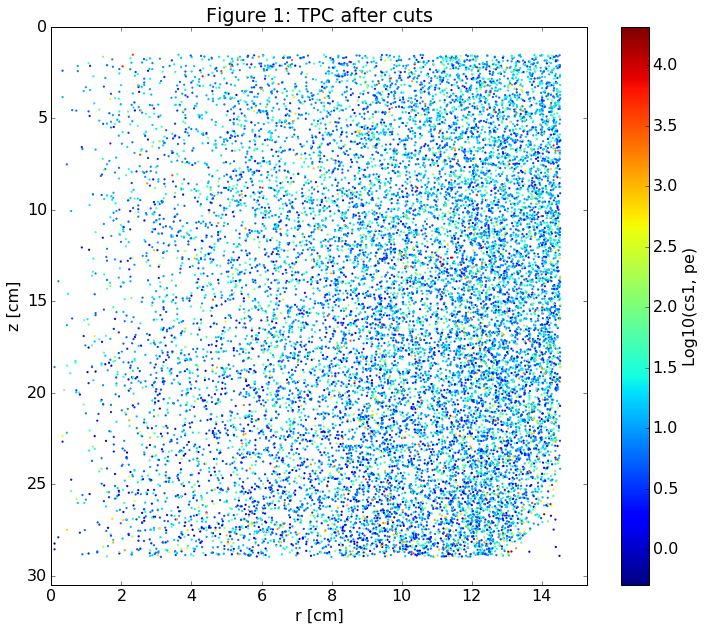

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = ax.scatter(np.sqrt(data['x']**2 + data['y']**2), - data['z'], 
               c=np.log10(data['cs1']), marker='o', s=5, alpha=1.0,
               edgecolors='none')

ax.set_xlabel('r [cm]')
ax.set_ylabel('z [cm]')
ax.set_xlim(0, tpc_radius)
ax.set_ylim(tpc_length, 0)
plt.colorbar(p, label='Log10(cs1, pe)')
plt.title("Figure 1: TPC after cuts")
plt.show()

And just for the fun of having a fancy plot in the notebook:

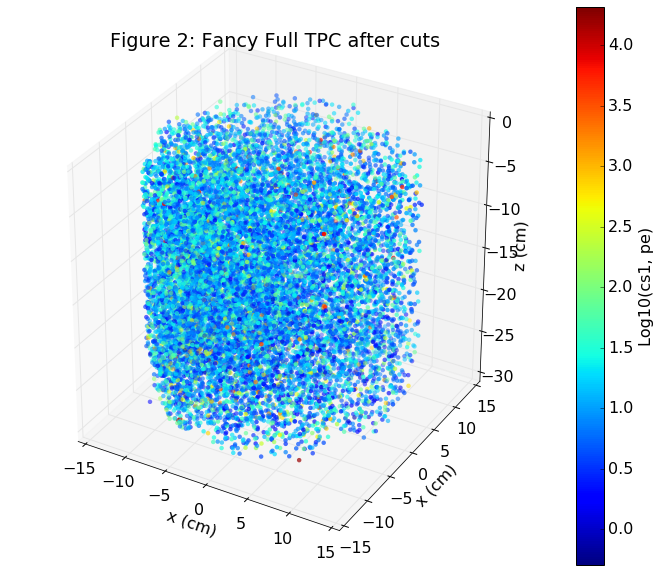

In [18]:
# Another fancy plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(data['x'], data['y'], data['z'], c=np.log10(data['cs1']),
               zdir='z', s=20, marker='o', edgecolors='none',
               depthshade=True)

ax.set_zlim(0, -tpc_length)
ax.set_zlabel('z (cm)')
ax.invert_zaxis()

r = pax_config['DEFAULT']['tpc_radius']
ax.set_xlim(-tpc_radius, tpc_radius)
ax.set_xlabel('x (cm)')

ax.set_ylabel('x (cm)')
ax.set_ylim(-tpc_radius, tpc_radius)

plt.colorbar(p, label='Log10(cs1, pe)')
plt.title("Figure 2: Fancy Full TPC after cuts")
plt.show()

## Exploratory analysis

Before jumping into any sort of fitting of functions, let's have a first look at the data we have in the context of the task of study the s2 width signal (here we include the different relevant cases that will be studied):

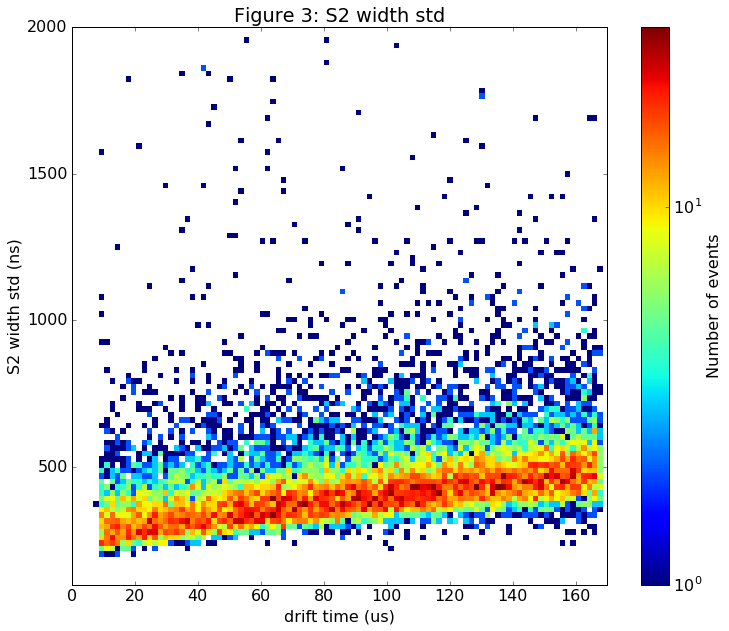

In [19]:
plt.hist2d(data['drift_time_2'],data['s2_width_std'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,170],[100,2000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('drift time (us)')
plt.ylabel('S2 width std (ns)')
plt.title("Figure 3: S2 width std")
plt.show()

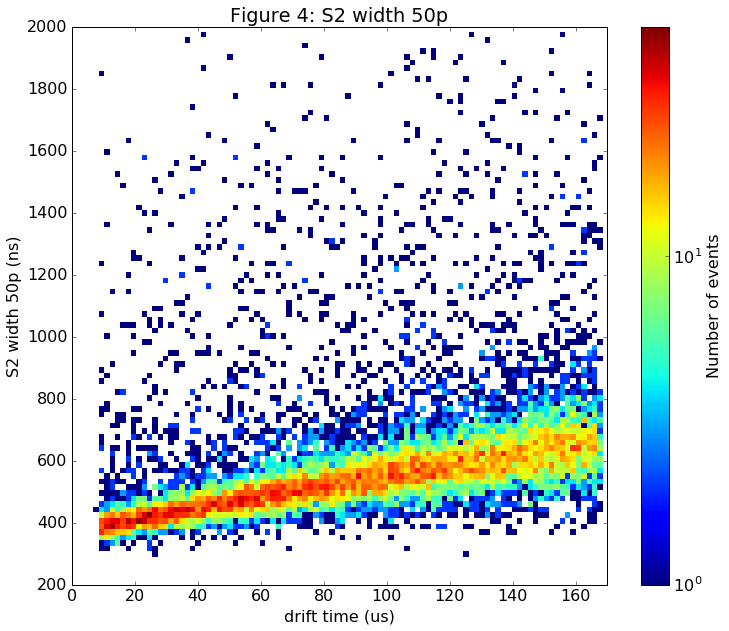

In [20]:
plt.hist2d(data['drift_time_2'],data['s2_width_50p'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,170],[200,2000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('drift time (us)')
plt.ylabel('S2 width 50p (ns)')
plt.title("Figure 4: S2 width 50p")
plt.show()

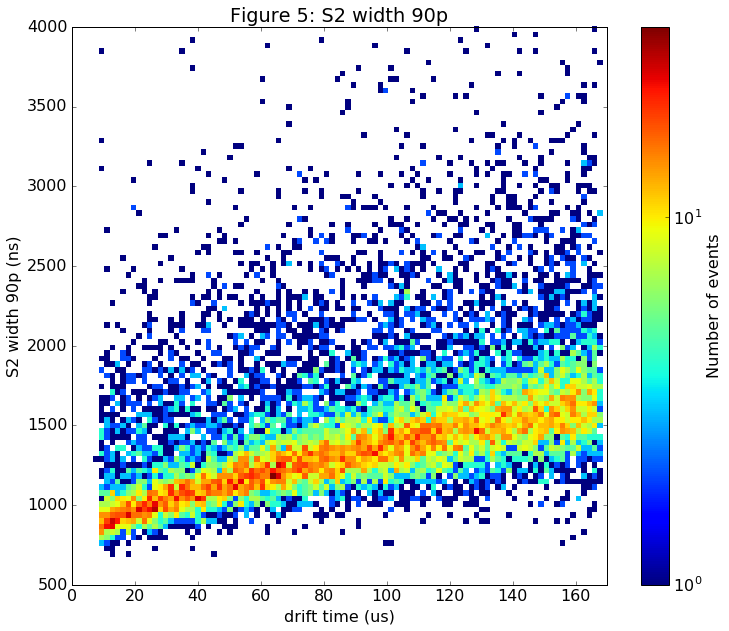

In [21]:
plt.hist2d(data['drift_time_2'],data['s2_width_90p'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,170],[500,4000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('drift time (us)')
plt.ylabel('S2 width 90p (ns)')
plt.title("Figure 5: S2 width 90p")
plt.show()

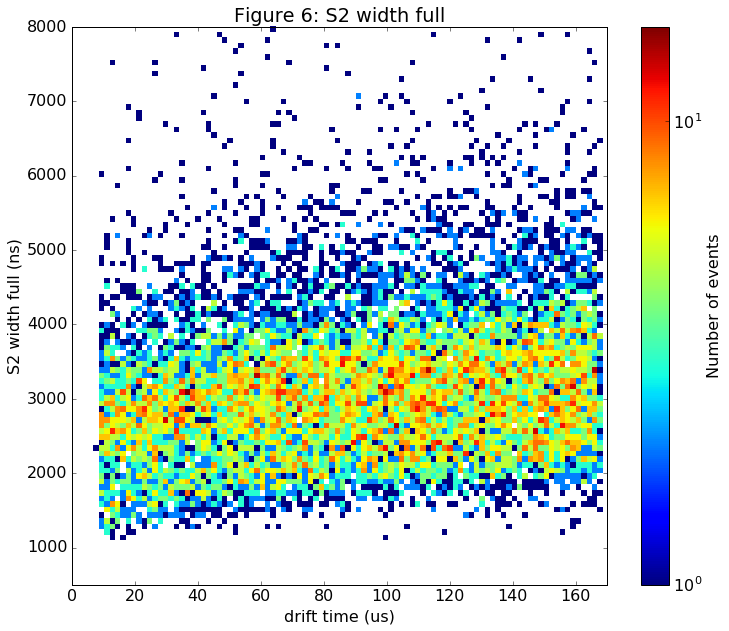

In [22]:
plt.hist2d(data['drift_time_2'],data['s2_width_full'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,170],[500,8000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('drift time (us)')
plt.ylabel('S2 width full (ns)')
plt.title("Figure 6: S2 width full")
plt.show()

** TO DO**: comment about it 

# Analysis 

** TO DO: describe model (1102.2865v2) and provide motivation for parametrization of drift time and s2 area **

##  Fit functions

Although the data could be thought to be described by using a Gaussian standard function, here it will be also considered an [exponentially modified Gaussian](https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution "Exponentially modified Gaussian distribution") function:

In [23]:
import scipy.optimize, scipy.special, scipy.stats
from scipy.special import erf, erfc

def gaussian(x, a, b, c):
# A gaussian peak with:
#   Peak height above background : p[0] = a
#   Central value                : p[1] = b
#   Standard deviation           : p[2] = c

    return a*np.exp(-(x - b)**2 /(2* c**2))

def ModGaussian(x, A, d, e, f):
# A modified gaussian with:
#   Amplitude                    : p[0] =A
#   Mean value                   : p[1] =d
#   Standard deviation           : p[2] =e
#   exponential of rate          : p[3] =f

    return A*f*0.5*np.exp(f*(d-x+0.5*f*e**2))*erfc((d+f*e**2-x)/(e*2**0.5))

Later on, in order to fit a curve through the mean and deviation points of the different slices of data (so we can find the function that best describes the depth-width relationship), we will define the following fit functions:

In [24]:
import pylab

def empirical_function(x, a, b):
# An empirical function with:
#    p[0] = a
#    p[1] = b

    return a*x + b

def empirical_function2(x, a, b):
# An empirical function with:
#    p[0] = a
#    p[1] = b

    return np.sqrt(a*x + b)

def empirical_function3(x, a, b, c):
# An empirical function with:
#    p[0] = a
#    p[1] = b
#    p[2] = c

    return a*x**2 + b*x + c

def area_fit(x, a, b, c):
# An empirical function with:
#    p[0] = a
#    p[1] = b
#    p[2] = c

    return a*np.sqrt(x + b) + c

def area_fit2(x, a, b, c, d, e):
# An empirical function with:
#    p[0] = a
#    p[1] = b
#    p[2] = c
#    p[3] = d
#    p[4] = e

    return a*np.log10(x+b)+c*np.sqrt(x + d) + e

def area_fit3(x, a, b, c, d, e):
# An empirical function with:
#    p[0] = a
#    p[1] = b
#    p[2] = c
#    p[3] = d
#    p[4] = e

    return np.sqrt(a*x + b) + np.log10(c*x+d) + e

# Drift time parametrization

### S2 width (drift time slices)

In [25]:
#slices
cut_0_20     = (data['drift_time_2']> 0)   & (data['drift_time_2'] < 20)
cut_20_40    = (data['drift_time_2']> 20)  & (data['drift_time_2'] < 40)
cut_40_60    = (data['drift_time_2']> 40)  & (data['drift_time_2'] < 60)
cut_60_80    = (data['drift_time_2']> 60)  & (data['drift_time_2'] < 80)
cut_80_100   = (data['drift_time_2']> 80)  & (data['drift_time_2'] < 100)
cut_100_120  = (data['drift_time_2']> 100) & (data['drift_time_2'] < 120)
cut_120_140  = (data['drift_time_2']> 120) & (data['drift_time_2'] < 140)
cut_140_160  = (data['drift_time_2']> 140) & (data['drift_time_2'] < 160)

# S2 width std (dt)

In [26]:
# set of s2_width_std slices

s2_width_std_0_20    = data[cut_0_20]['s2_width_std'] # [0]
s2_width_std_20_40   = data[cut_20_40]['s2_width_std'] # [1]
s2_width_std_40_60   = data[cut_40_60]['s2_width_std'] # [2]
s2_width_std_60_80   = data[cut_60_80]['s2_width_std'] # [3]
s2_width_std_80_100  = data[cut_80_100]['s2_width_std'] # [4]
s2_width_std_100_120 = data[cut_100_120]['s2_width_std'] # [5]
s2_width_std_120_140 = data[cut_120_140]['s2_width_std'] # [6]
s2_width_std_140_160 = data[cut_140_160]['s2_width_std'] # [7]

# Data frame 

#mean point intervals
drift_time_range = [10.,30.,50.,70.,90.,110.,130.,150.]
df_std = pd.DataFrame(drift_time_range)
df_std.columns = ['drift_time']
#fitted values per slice
df_std['mean_width']       = 0.
df_std['mean_width_uncert']= 0.
df_std['std']              = 0.
df_std['std_uncert']       = 0.

### Example: 40-60 slice

### Gaussian 

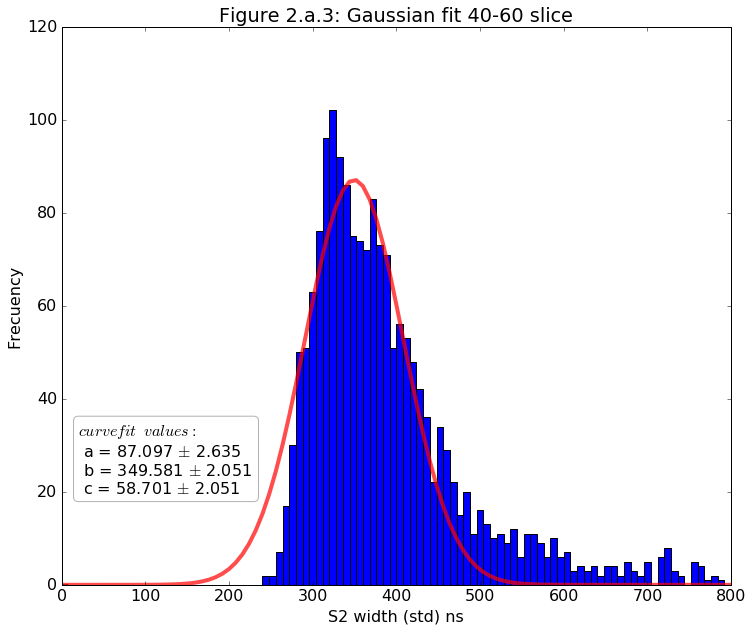

In [27]:
# Gaussian s2_width_std_40_60
# n = frecuencies inside bins

func = gaussian

n, bins, patches = plt.hist(s2_width_std_40_60, bins= 100, range=[0,800],label= 'Histogram')

init = [90,340,60]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 800)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(20, 20, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.a.3: Gaussian fit 40-60 slice")
plt.show()

After attempting  to fit a statistical model to observed data, one may wonder how well the model actually reflects the data (or how "close" are the observed values to those which would be expected under the fitted model?). A statistical test that addresses this problem is the [chi-square goodness of fit test](http://vassarstats.net/textbook/ch8pt1.html "Chi-Square Procedures for the Analysis of Categorical Frequency Data"):

In [28]:
#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Gaussian_cut_40_60.txt', np.c_[bins[:-1],n])


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)

#weight = np.zeros_like(n)
#for i, nx in enumerate(n):
#    if nx > 0:
#        weight[i] = np.sqrt(nx)
#    else:
#        weight[i] = 1

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# WARNING : Scipy seems to use non-standard poorly documented notation for cov,
# which misleads many people. See "cov_x" on
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq
# (which underlies curve_fit) and also discussion at
# http://stackoverflow.com/questions/14854339/in-scipy-how-and-why-does-curve-fit-calculate-the-covariance-of-the-parameter-es.
# This agrees with @cdeil at http://nbviewer.ipython.org/5014170/.

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}, CDF = {:10.5f}%"\
#        .format(chisq, chisq/dof, 100.*cdf))

#if cdf < 0.05 :
#        print("\nNOTE: This does not appear to be a great fit, so the")
#        print("      parameter uncertainties may underestimated.")
#elif cdf > 0.95 :
#        print("\nNOTE: This fit seems better than expected, so the")
#        print("      data uncertainties may have been overestimated.")

Correlation Matrix :
  1.000000  0.000000 -0.577350
  0.000000  1.000000 -0.000000
 -0.577350 -0.000000  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   87.09728 +/-    2.63537      (  90.00000)
p[1] =  349.58086 +/-    2.05094      ( 340.00000)
p[2] =   58.70113 +/-    2.05094      (  60.00000)

Chi-square = 5841.10653, Chi-Squared/dof =   60.21759


### Exponentially modified Gaussian

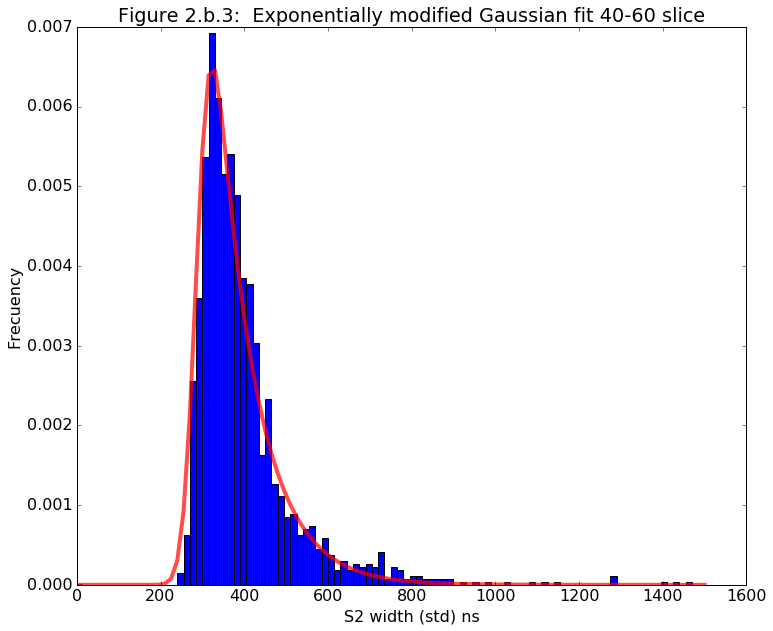

Correlation Matrix :
  1.000000 -0.382486  0.000000 -0.586982
 -0.382486  1.000000  0.334923  0.651614
  0.000000  0.334923  1.000000  0.513991
 -0.586982  0.651614  0.513991  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.98733 +/-    0.01569      (   1.00000)
p[1] =  289.43806 +/-    1.09474      ( 290.00000)
p[2] =   26.49831 +/-    1.26314      (  30.00000)
p[3] =    0.01095 +/-    0.00038      (   0.01500)

Chi-square =  339.97478, Chi-Squared/dof =    3.54140


289.4380579401805

In [29]:
# Exponentially modified Gaussian s2_width_std_40_60

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_40_60, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,290,30,0.015]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.3:  Exponentially modified Gaussian fit 40-60 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_40_60.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

#weight = np.zeros_like(n)
#for i, nx in enumerate(n):
#    if nx > 0:
#        weight[i] = np.sqrt(nx)
#    else:
#        weight[i] = 1

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq

print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}, CDF = {:10.5f}%"\
#        .format(chisq, chisq/dof, 100.*cdf))

#if cdf < 0.05 :
#        print("\nNOTE: This does not appear to be a great fit, so the")
#        print("      parameter uncertainties may underestimated.")
#elif cdf > 0.95 :
#        print("\nNOTE: This fit seems better than expected, so the")
#        print("      data uncertainties may have been overestimated.")

#update parameters for this slice
df_std['mean_width'][2] = popt[1]
df_std['mean_width_uncert'][2]= cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][2] = popt[2]
df_std['std_uncert'][2]= cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))
df_std['mean_width'][2]

**Conclusion: Under this results, the other slices should be treated with a exponentially modified Gaussian fit along with a chi-square test. Additionally, the results were cross checked by using the Python Package LMFIT Non-Linear Least-Squares Minimization and Curve-Fitting**.

## 0-20 slice

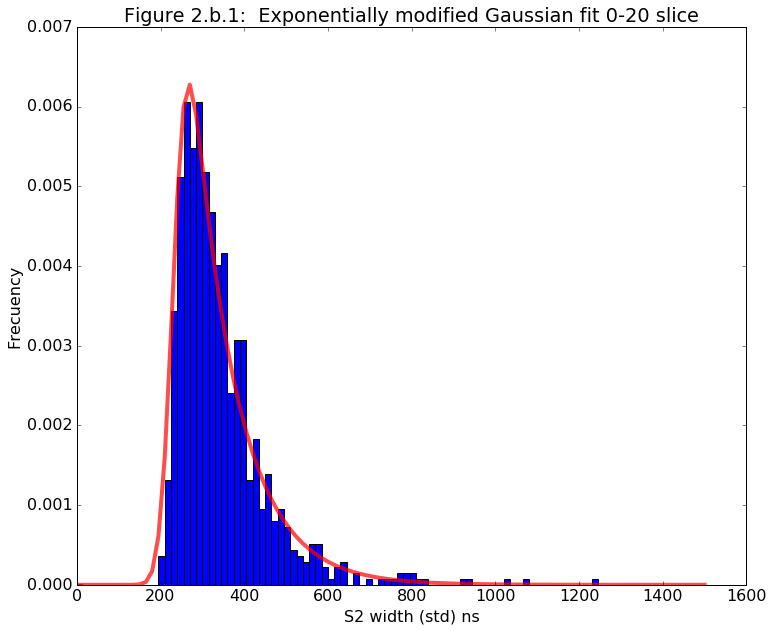

Correlation Matrix :
  1.000000 -0.368103  0.000000 -0.602713
 -0.368103  1.000000  0.293765  0.610743
  0.000000  0.293765  1.000000  0.480996
 -0.602713  0.610743  0.480996  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    1.01613 +/-    0.01765      (   1.00000)
p[1] =  232.87016 +/-    1.17635      ( 250.00000)
p[2] =   25.49857 +/-    1.40101      (  30.00000)
p[3] =    0.00967 +/-    0.00035      (   0.01000)

Chi-square =  392.99590, Chi-Squared/dof =    4.09371


In [30]:
# Exponentially modified Gaussian s2_width_std_0_20

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_0_20, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,250,30,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.1:  Exponentially modified Gaussian fit 0-20 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][0]        = popt[1]
df_std['mean_width_uncert'][0] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][0]               = popt[2]
df_std['std_uncert'][0]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 20-40 slice

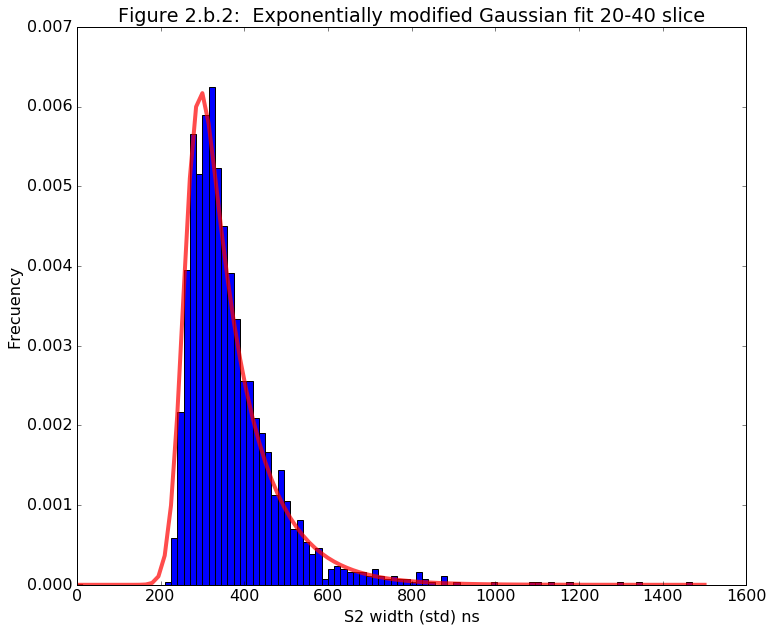

Correlation Matrix :
  1.000000 -0.381685  0.000000 -0.587977
 -0.381685  1.000000  0.332353  0.649149
  0.000000  0.332353  1.000000  0.511983
 -0.587977  0.649149  0.511983  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    1.00794 +/-    0.01310      (   1.00000)
p[1] =  259.60331 +/-    0.95945      ( 250.00000)
p[2] =   28.35303 +/-    1.10930      (  30.00000)
p[3] =    0.01014 +/-    0.00029      (   0.01000)

Chi-square =  220.03813, Chi-Squared/dof =    2.29206


In [31]:
# Exponentially modified Gaussian s2_width_std_20_40

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_20_40, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,250,30,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.2:  Exponentially modified Gaussian fit 20-40 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_20_40.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))
#update parameters for this slice
df_std['mean_width'][1]        = popt[1]
df_std['mean_width_uncert'][1] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][1]               = popt[2]
df_std['std_uncert'][1]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 60-80 slice

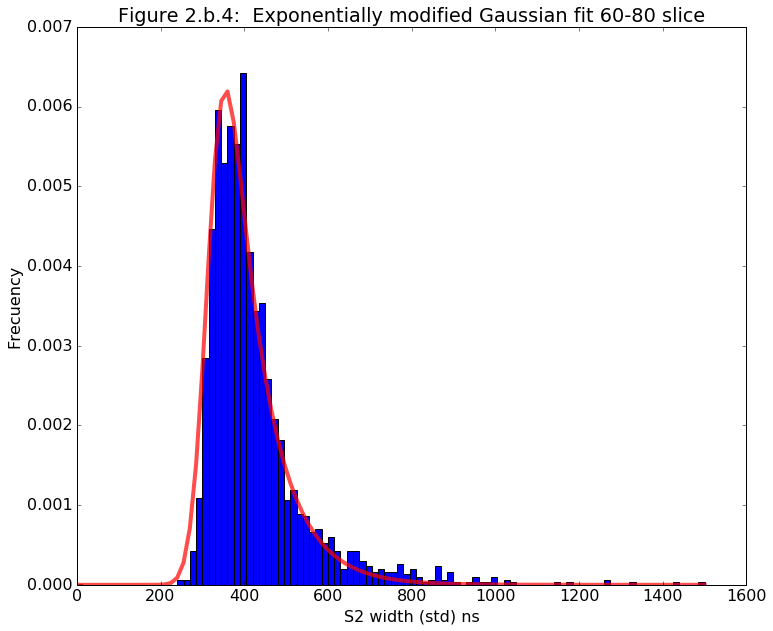

Correlation Matrix :
  1.000000 -0.402068  0.000000 -0.553419
 -0.402068  1.000000  0.418898  0.726516
  0.000000  0.418898  1.000000  0.576585
 -0.553419  0.726516  0.576585  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.97786 +/-    0.01756      (   1.00000)
p[1] =  318.02763 +/-    1.51731      ( 320.00000)
p[2] =   32.84526 +/-    1.62789      (  30.00000)
p[3] =    0.01189 +/-    0.00054      (   0.01000)

Chi-square =  429.40066, Chi-Squared/dof =    4.47292


In [32]:
# Exponentially modified Gaussian s2_width_std_60_80

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_60_80, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,320,30,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.4:  Exponentially modified Gaussian fit 60-80 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_60_80.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][3]        = popt[1]
df_std['mean_width_uncert'][3] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][3]               = popt[2]
df_std['std_uncert'][3]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 80-100 slice

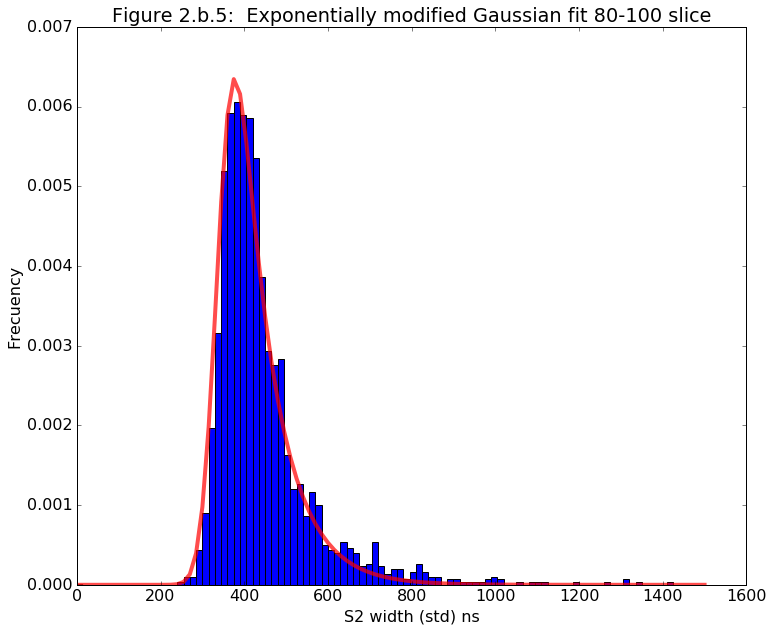

Correlation Matrix :
  1.000000 -0.402461  0.000000 -0.552389
 -0.402461  1.000000  0.421388  0.728583
  0.000000  0.421388  1.000000  0.578366
 -0.552389  0.728583  0.578366  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.96560 +/-    0.01214      (   1.00000)
p[1] =  341.37803 +/-    1.03137      ( 340.00000)
p[2] =   31.87843 +/-    1.10395      (  30.00000)
p[3] =    0.01235 +/-    0.00040      (   0.01000)

Chi-square =  212.73666, Chi-Squared/dof =    2.21601


In [33]:
# Exponentially modified Gaussian s2_width_std_80_100

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_80_100, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,340,30,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.5:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_80_100.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][4]        = popt[1]
df_std['mean_width_uncert'][4] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][4]               = popt[2]
df_std['std_uncert'][4]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 100-120 slice

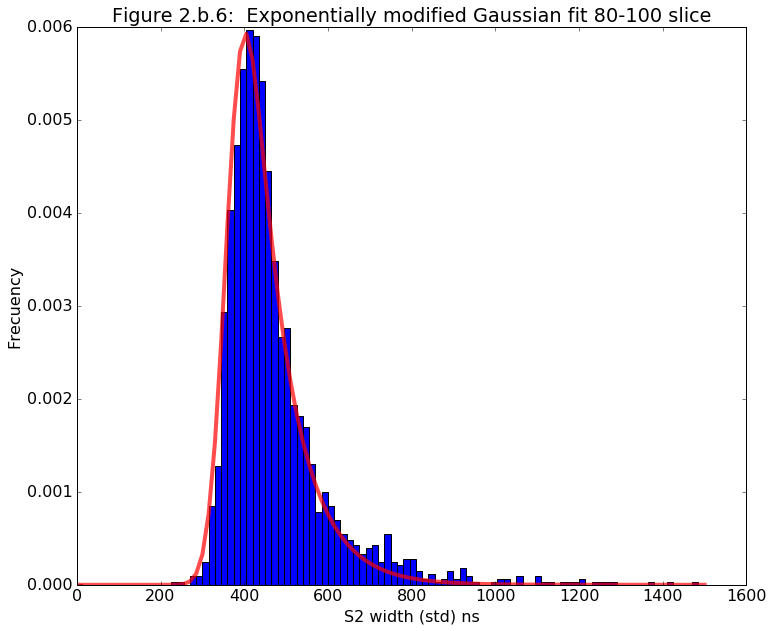

Correlation Matrix :
  1.000000 -0.404606  0.000000 -0.546138
 -0.404606  1.000000  0.436371  0.740850
  0.000000  0.436371  1.000000  0.589014
 -0.546138  0.740850  0.589014  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.96134 +/-    0.01029      (   1.00000)
p[1] =  364.09177 +/-    0.96382      ( 360.00000)
p[2] =   34.92389 +/-    1.01694      (  30.00000)
p[3] =    0.01184 +/-    0.00033      (   0.01000)

Chi-square =  144.35518, Chi-Squared/dof =    1.50370


In [34]:
# Exponentially modified Gaussian s2_width_std_100_120

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_100_120, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,360,30,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.6:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_100_120.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][5]        = popt[1]
df_std['mean_width_uncert'][5] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][5]               = popt[2]
df_std['std_uncert'][5]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 120-140 slice

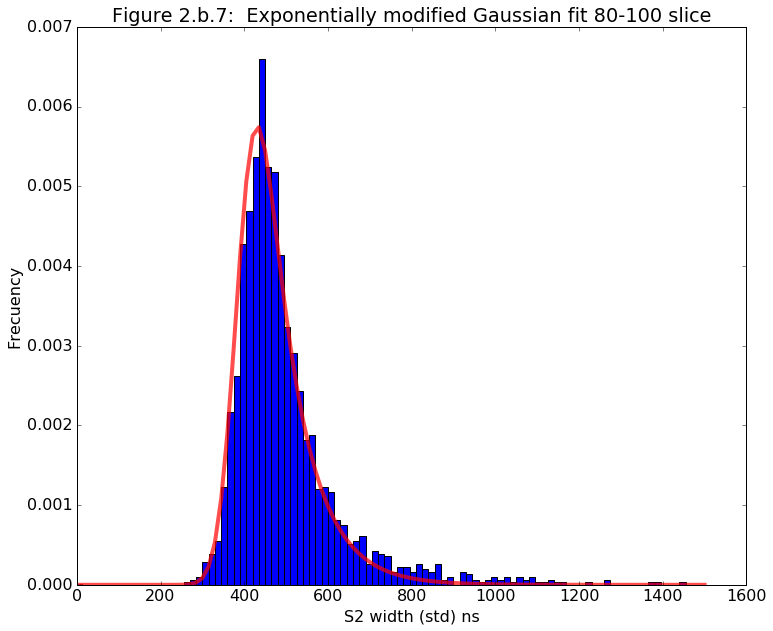

Correlation Matrix :
  1.000000 -0.408649  0.000000 -0.527947
 -0.408649  1.000000  0.478795  0.774034
  0.000000  0.478795  1.000000  0.618571
 -0.527947  0.774034  0.618571  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.94959 +/-    0.01241      (   1.00000)
p[1] =  391.14702 +/-    1.30345      ( 390.00000)
p[2] =   38.16924 +/-    1.31724      (  34.00000)
p[3] =    0.01241 +/-    0.00046      (   0.01000)

Chi-square =  211.01991, Chi-Squared/dof =    2.19812


In [35]:
# Exponentially modified Gaussian s2_width_std_120_140

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_120_140, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,390,34,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.7:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_120_140.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][6]        = popt[1]
df_std['mean_width_uncert'][6] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][6]               = popt[2]
df_std['std_uncert'][6]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 140-160 slice

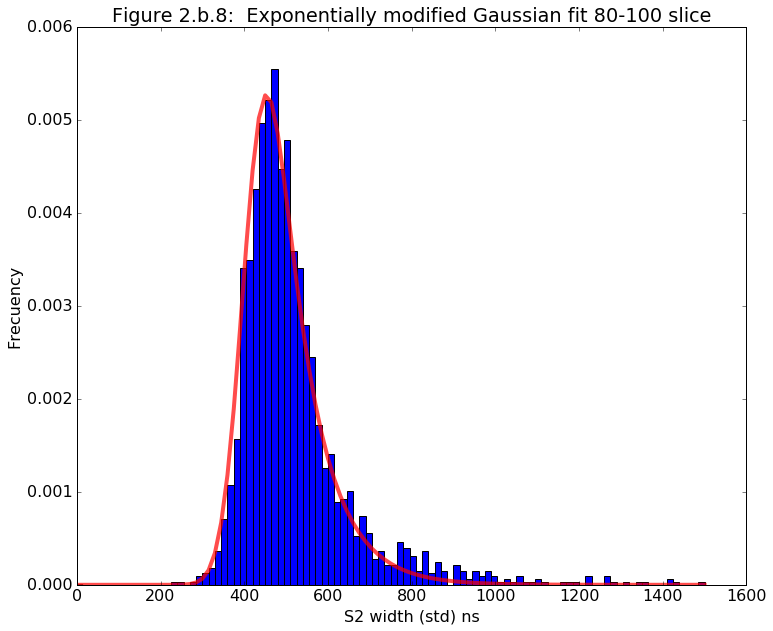

Correlation Matrix :
  1.000000 -0.409737 -0.000000 -0.512306
 -0.409737  1.000000  0.513828  0.799790
 -0.000000  0.513828  1.000000  0.642453
 -0.512306  0.799790  0.642453  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.95908 +/-    0.01245      (   1.00000)
p[1] =  409.63385 +/-    1.53476      ( 410.00000)
p[2] =   44.40242 +/-    1.49209      (  38.00000)
p[3] =    0.01190 +/-    0.00048      (   0.01000)

Chi-square =  196.39073, Chi-Squared/dof =    2.04574


In [36]:
# Exponentially modified Gaussian s2_width_std_140_160

func = ModGaussian

n, bins, patches = plt.hist(s2_width_std_140_160, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,410,38,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (std) ns')
plt.ylabel('Frecuency')
plt.title("Figure 2.b.8:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_140_160.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_std['mean_width'][7]        = popt[1]
df_std['mean_width_uncert'][7] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_std['std'][7]               = popt[2]
df_std['std_uncert'][7]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## Results S2 width std

In [37]:
# Results
df_std

drift_time  mean_width  mean_width_uncert        std  std_uncert
0        10.0  232.870159           1.176347  25.498574    1.401008
1        30.0  259.603309           0.959447  28.353028    1.109303
2        50.0  289.438058           1.094742  26.498306    1.263138
3        70.0  318.027631           1.517308  32.845258    1.627889
4        90.0  341.378028           1.031369  31.878430    1.103945
5       110.0  364.091774           0.963818  34.923887    1.016941
6       130.0  391.147017           1.303455  38.169237    1.317238
7       150.0  409.633846           1.534758  44.402416    1.492088

Here is a summary of the information acquired from all fitted slices using an exponentially modified Gaussian function. The change in their mean value $\mu $ and in their spread $\sigma$, is shown in Figure 6: 

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


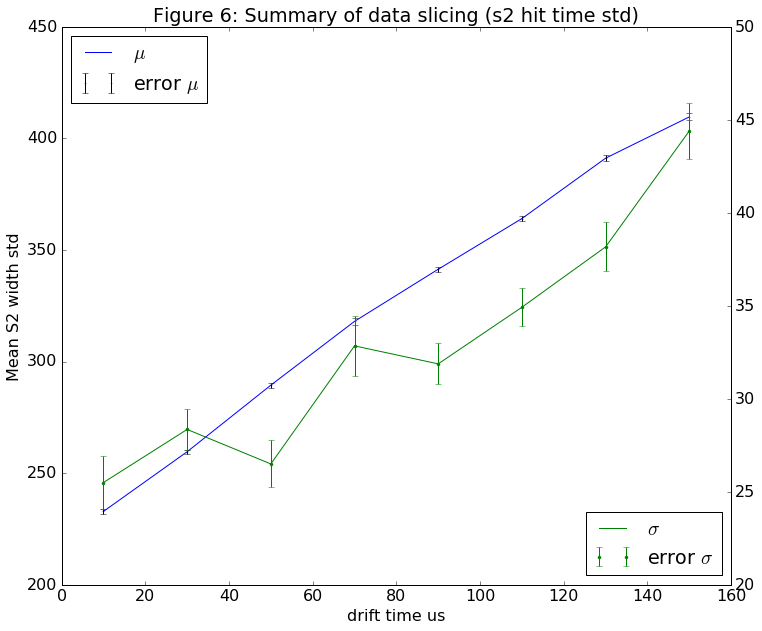

In [38]:
# Plot data and fit
fig, ax = plt.subplots(1, 1)
ax.plot(df_std['drift_time'],df_std['mean_width'],"b-",label='$\mu$')
ax.errorbar(df_std['drift_time'], df_std['mean_width'], yerr=df_std['mean_width_uncert'], 
            fmt='o', markersize=1, color='k', label='error $\mu$')

ax2 = ax.twinx()
ax2.plot(df_std['drift_time'],df_std['std'],"g-",label='$\sigma$')
ax2.errorbar(df_std['drift_time'], df_std['std'], yerr=df_std['std_uncert'], fmt='.', 
             color='g',label='error $\sigma$')

#  legend customization
ax.legend(loc='upper left')
ax2.legend(loc="lower right")

#Axis labels
ax.set_xlabel('drift time us')
ax.set_ylabel('Mean S2 width std')

# Title
ax.set_title("Figure 6: Summary of data slicing (s2 hit time std)")

fig.show()

The fit functions declared above can be applied to the plot in Figure 6 and their fit can be quantified by using a reduced $\chi^2$  quality  measure along with the $R^2 $ (which compares the residuals squared to the standard deviation of the points) measure:

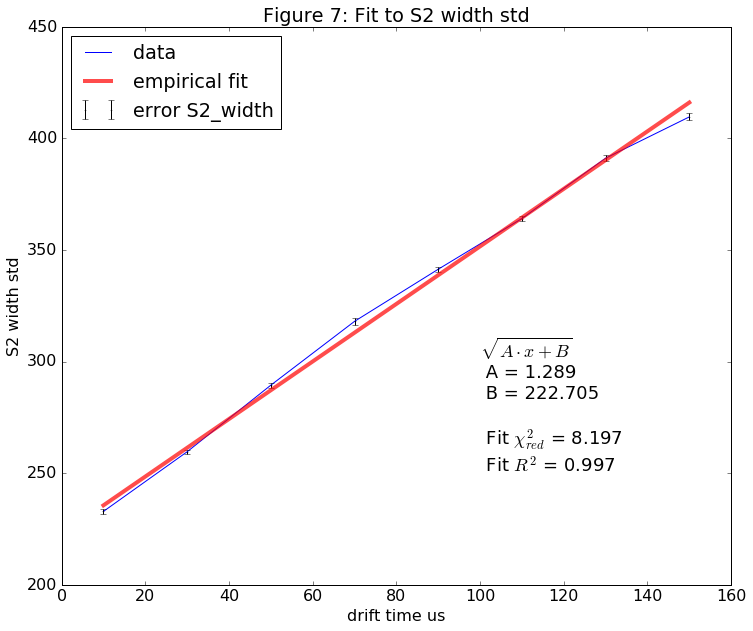

In [39]:
#Fit first empirical function

function = empirical_function

popt, pcov = curve_fit(function, df_std['drift_time'], df_std['mean_width'], 
                       sigma= df_std['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_std['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_std['drift_time'],*popt)- df_std['mean_width'])/df_std['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_std['mean_width'] -
              function(df_std['drift_time'],*popt)))**2)/sum((df_std['mean_width'] - np.mean(df_std['mean_width']))**2)


# Plot data and fit
plt.plot(df_std['drift_time'],df_std['mean_width'], label='data')
plt.errorbar(df_std['drift_time'], df_std['mean_width'], yerr=df_std['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_std['drift_time'], function(df_std['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 250, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width std')
# Title
plt.title("Figure 7: Fit to S2 width std")
plt.show()

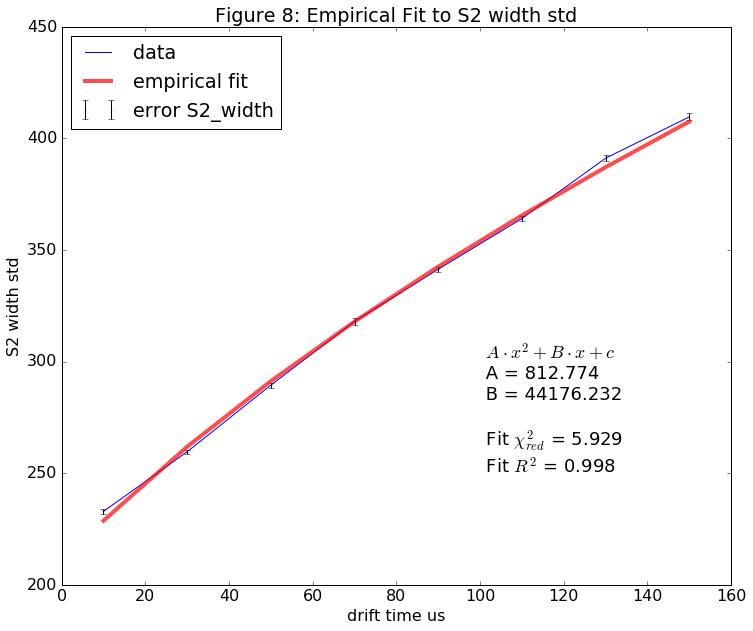

In [40]:
#Fit second empirical function

function = empirical_function2

popt, pcov = curve_fit(function, df_std['drift_time'], df_std['mean_width'], 
                       sigma=df_std['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_std['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_std['drift_time'],*popt)- df_std['mean_width'])/df_std['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_std['mean_width'] -
              function(df_std['drift_time'],*popt)))**2)/sum((df_std['mean_width'] - np.mean(df_std['mean_width']))**2)


# Plot data and fit
plt.plot(df_std['drift_time'],df_std['mean_width'], label='data')
plt.errorbar(df_std['drift_time'], df_std['mean_width'], yerr=df_std['mean_width_uncert'],
             fmt='o', markersize=1, color='k', label='error S2_width')
plt.plot(df_std['drift_time'], function(df_std['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 250, 
    (' $A \cdot x^2 + B \cdot x + c $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width std')
# Title
plt.title("Figure 8: Empirical Fit to S2 width std")
plt.show()

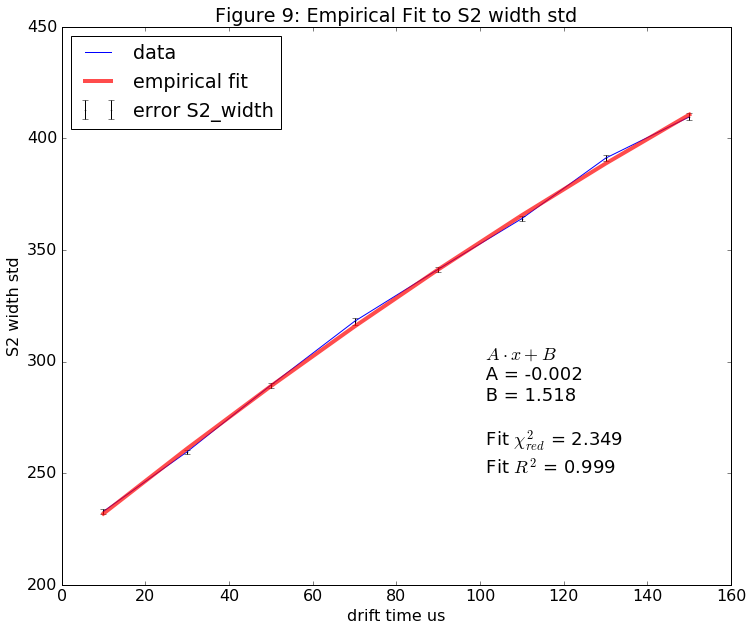

In [41]:
#Fit third empirical function

function = empirical_function3

popt, pcov = curve_fit(function, df_std['drift_time'], df_std['mean_width'], 
                       sigma=df_std['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_std['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_std['drift_time'],*popt)- df_std['mean_width'])/df_std['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_std['mean_width'] -
              function(df_std['drift_time'],*popt)))**2)/sum((df_std['mean_width'] - np.mean(df_std['mean_width']))**2)


# Plot data and fit
plt.plot(df_std['drift_time'],df_std['mean_width'], label='data')
plt.errorbar(df_std['drift_time'], df_std['mean_width'], yerr=df_std['mean_width_uncert'],
             fmt='o', markersize=1, color='k', label='error S2_width')
plt.plot(df_std['drift_time'], function(df_std['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 250, 
    (' $A \cdot x + B $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width std')
# Title
plt.title("Figure 9: Empirical Fit to S2 width std")
plt.show()

**Conclusion: we can go with Figure 8 fit if we want to go for precision**

# S2 width 50p (dt)

In [42]:
# set of s2_width_50p slices

s2_width_50p_0_20 = data[cut_0_20]['s2_width_50p'] # [0]
s2_width_50p_20_40 = data[cut_20_40]['s2_width_50p'] # [1]
s2_width_50p_40_60 = data[cut_40_60]['s2_width_50p'] # [2]
s2_width_50p_60_80 = data[cut_60_80]['s2_width_50p'] # [3]
s2_width_50p_80_100 = data[cut_80_100]['s2_width_50p'] # [4]
s2_width_50p_100_120 = data[cut_100_120]['s2_width_50p'] # [5]
s2_width_50p_120_140 = data[cut_120_140]['s2_width_50p'] # [6]
s2_width_50p_140_160 = data[cut_140_160]['s2_width_50p'] # [7]

# Data frame 

#mean point intervals
drift_time_range_50p = [10.,30.,50.,70.,90.,110.,130.,150.]
df_50p = pd.DataFrame(drift_time_range)
df_50p.columns = ['drift_time']
#fitted values per slice
df_50p['mean_width'] = 0.
df_50p['mean_width_uncert']= 0.
df_50p['50p'] = 0.
df_50p['50p_uncert']= 0.

## 0-20 slice

## Gaussian

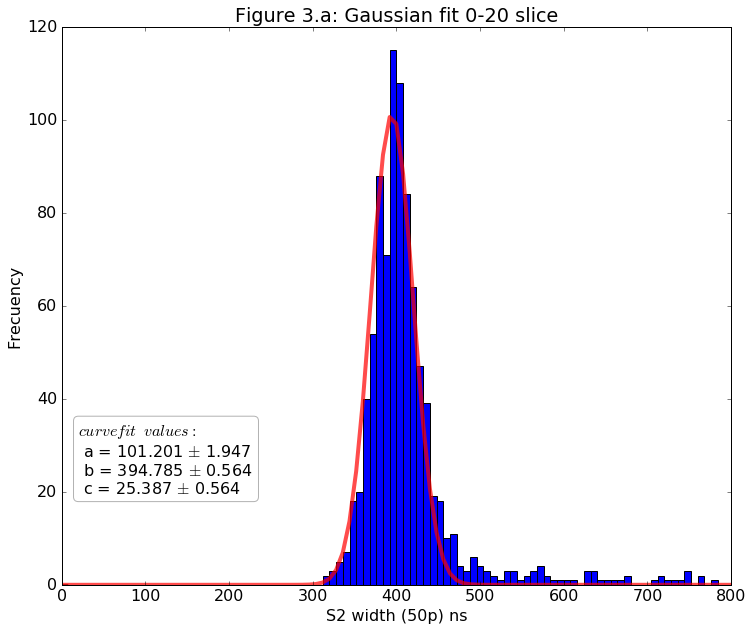

Correlation Matrix :
  1.000000  0.000000 -0.577350
  0.000000  1.000000 -0.000000
 -0.577350 -0.000000  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =  101.20099 +/-    1.94694      (  90.00000)
p[1] =  394.78523 +/-    0.56395      ( 340.00000)
p[2] =   25.38679 +/-    0.56395      (  60.00000)

Chi-square = 1378.72079, Chi-Squared/dof =   14.21362


In [43]:
# Gaussian s2_width_50p_0_20
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_50p_0_20, bins= 100, range=[0,800],label= 'Histogram')

init = [90,340,60]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 800)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(20, 20, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.a: Gaussian fit 0-20 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-squared
#weight = np.zeros_like(n)
#for i, nx in enumerate(n):
#    if nx > 0:
#        weight[i] = np.sqrt(nx)
#    else:
#        weight[i] = 1
        
chisq = sum(((n-func(bins[:-1],*popt))/1)**2)
# WARNING : Scipy seems to use non-standard poorly documented notation for cov,
# which misleads many people. See "cov_x" on
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq
# (which underlies curve_fit) and also discussion at
# http://stackoverflow.com/questions/14854339/in-scipy-how-and-why-does-curve-fit-calculate-the-covariance-of-the-parameter-es.
# This agrees with @cdeil at http://nbviewer.ipython.org/5014170/.
# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

## Exponentially modified Gaussian

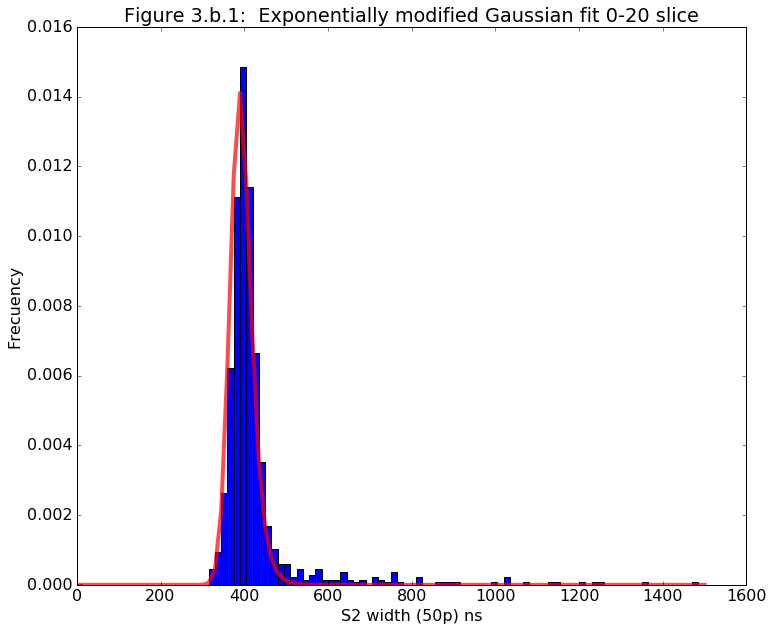

Correlation Matrix :
  1.000000 -0.365022  0.000000 -0.392085
 -0.365022  1.000000  0.736570  0.930977
  0.000000  0.736570  1.000000  0.791179
 -0.392085  0.930977  0.791179  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.89960 +/-    0.00895      (   1.00000)
p[1] =  375.58256 +/-    0.74011      ( 350.00000)
p[2] =   20.36804 +/-    0.50749      (  25.00000)
p[3] =    0.05274 +/-    0.00325      (   0.05000)

Chi-square =  324.73711, Chi-Squared/dof =    3.38268


In [44]:
# Exponentially modified Gaussian s2_width_50p_0_20

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_0_20, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,350,25,0.05]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.1:  Exponentially modified Gaussian fit 0-20 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][0]        = popt[1]
df_50p['mean_width_uncert'][0] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][0]               = popt[2]
df_50p['50p_uncert'][0]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

**Conclusion: Again, the slices will be treated with a exponentially modified Gaussian fit along with a chi-square test**.

## 20-40 slice

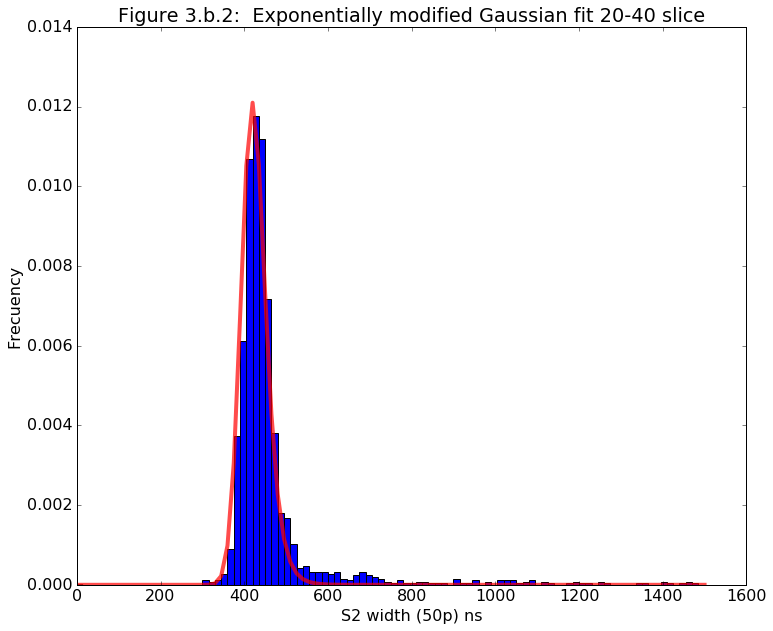

Correlation Matrix :
  1.000000 -0.359791  0.000000 -0.384284
 -0.359791  1.000000  0.748213  0.936262
  0.000000  0.748213  1.000000  0.799149
 -0.384284  0.936262  0.799149  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.90429 +/-    0.00976      (   1.00000)
p[1] =  404.04516 +/-    0.98269      ( 400.00000)
p[2] =   24.16147 +/-    0.65653      (  25.00000)
p[3] =    0.04635 +/-    0.00328      (   0.05000)

Chi-square =  331.88209, Chi-Squared/dof =    3.45711


In [45]:
# Exponentially modified Gaussian s2_width_50p_20_40

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_20_40, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,400,25,0.05]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins,*popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.2:  Exponentially modified Gaussian fit 20-40 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][1]        = popt[1]
df_50p['mean_width_uncert'][1] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][1]               = popt[2]
df_50p['50p_uncert'][1]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 40-60 slice

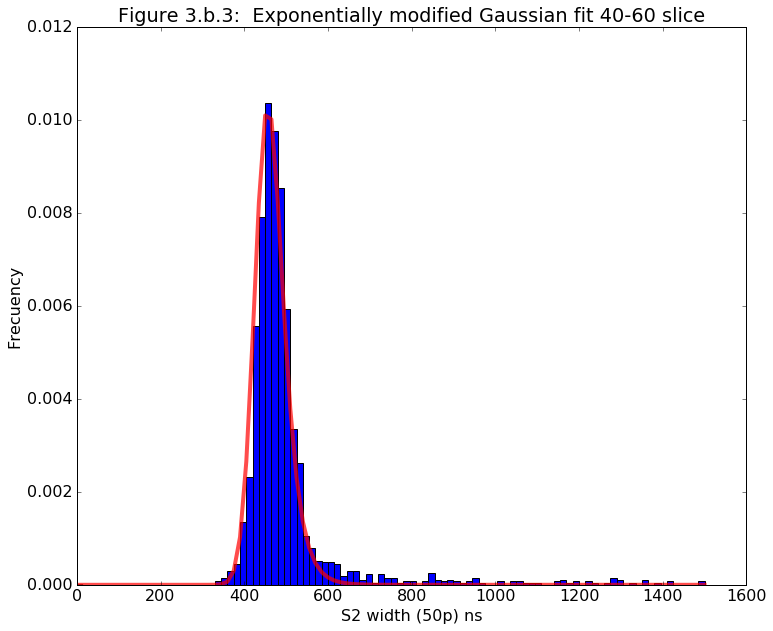

Correlation Matrix :
  1.000000 -0.374013  0.000000 -0.406318
 -0.374013  1.000000  0.714472  0.920493
  0.000000  0.714472  1.000000  0.776184
 -0.406318  0.920493  0.776184  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.91809 +/-    0.00824      (   1.00000)
p[1] =  437.32988 +/-    0.86486      ( 425.00000)
p[2] =   27.81191 +/-    0.62114      (  30.00000)
p[3] =    0.03577 +/-    0.00181      (   0.04000)

Chi-square =  194.73197, Chi-Squared/dof =    2.02846


In [46]:
# Exponentially modified Gaussian s2_width_50p_40_60

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_40_60, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,425,30,0.04]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.3:  Exponentially modified Gaussian fit 40-60 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][2]        = popt[1]
df_50p['mean_width_uncert'][2] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][2]               = popt[2]
df_50p['50p_uncert'][2]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 60-80 slice

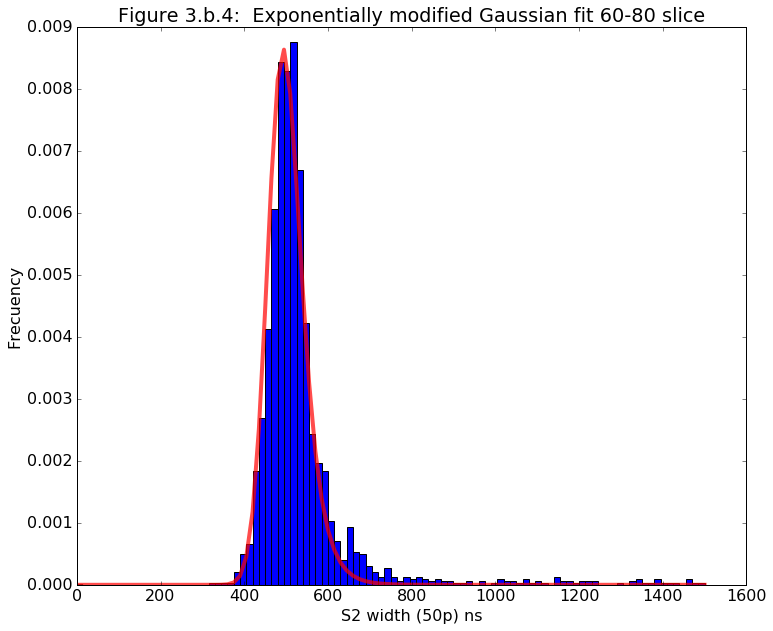

Correlation Matrix :
  1.000000 -0.375295  0.000000 -0.408452
 -0.375295  1.000000  0.711063  0.918824
  0.000000  0.711063  1.000000  0.773884
 -0.408452  0.918824  0.773884  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.90668 +/-    0.01343      (   1.00000)
p[1] =  470.19824 +/-    1.66479      ( 460.00000)
p[2] =   32.65930 +/-    1.20382      (  30.00000)
p[3] =    0.03011 +/-    0.00248      (   0.04000)

Chi-square =  438.83325, Chi-Squared/dof =    4.57118


In [47]:
# Exponentially modified Gaussian s2_width_50p_60_80

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_60_80, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,460,30,0.04]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.4:  Exponentially modified Gaussian fit 60-80 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][3]        = popt[1]
df_50p['mean_width_uncert'][3] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][3]               = popt[2]
df_50p['50p_uncert'][3]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 80-100 slice

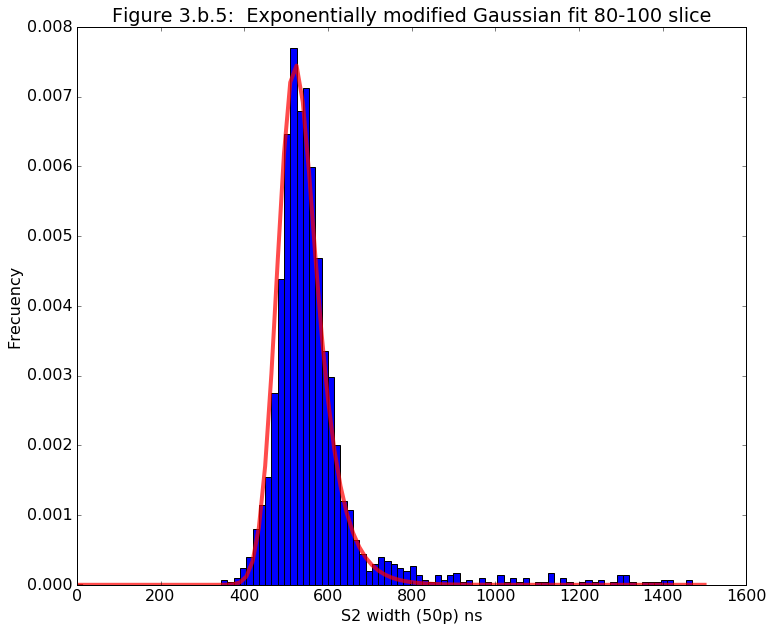

Correlation Matrix :
  1.000000 -0.397122  0.000000 -0.451986
 -0.397122  1.000000  0.635912  0.878617
  0.000000  0.635912  1.000000  0.723765
 -0.451986  0.878617  0.723765  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.93626 +/-    0.01044      (   1.00000)
p[1] =  492.56237 +/-    1.20538      ( 500.00000)
p[2] =   35.94064 +/-    0.99509      (  35.00000)
p[3] =    0.02143 +/-    0.00102      (   0.04000)

Chi-square =  213.06256, Chi-Squared/dof =    2.21940


In [48]:
# Exponentially modified Gaussian s2_width_50p_80_100

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_80_100, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,500,35,0.04]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.5:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][4]        = popt[1]
df_50p['mean_width_uncert'][4] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][4]               = popt[2]
df_50p['50p_uncert'][4]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 100-120 slice

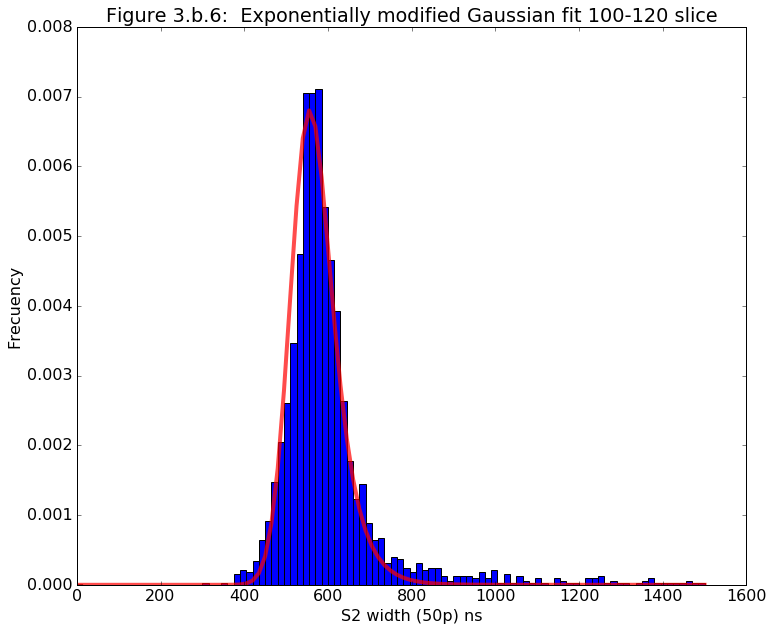

Correlation Matrix :
  1.000000 -0.384207 -0.000000 -0.424238
 -0.384207  1.000000  0.685053  0.905640
 -0.000000  0.685053  1.000000  0.756430
 -0.424238  0.905640  0.756430  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.90129 +/-    0.01475      (   1.00000)
p[1] =  527.01569 +/-    2.14104      ( 530.00000)
p[2] =   40.09135 +/-    1.62676      (  38.00000)
p[3] =    0.02249 +/-    0.00185      (   0.02500)

Chi-square =  413.61685, Chi-Squared/dof =    4.30851


In [49]:
# Exponentially modified Gaussian s2_width_50p_100_120

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_100_120, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,530,38,0.025]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.6:  Exponentially modified Gaussian fit 100-120 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][5]        = popt[1]
df_50p['mean_width_uncert'][5] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][5]               = popt[2]
df_50p['50p_uncert'][5]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 120-140 slice

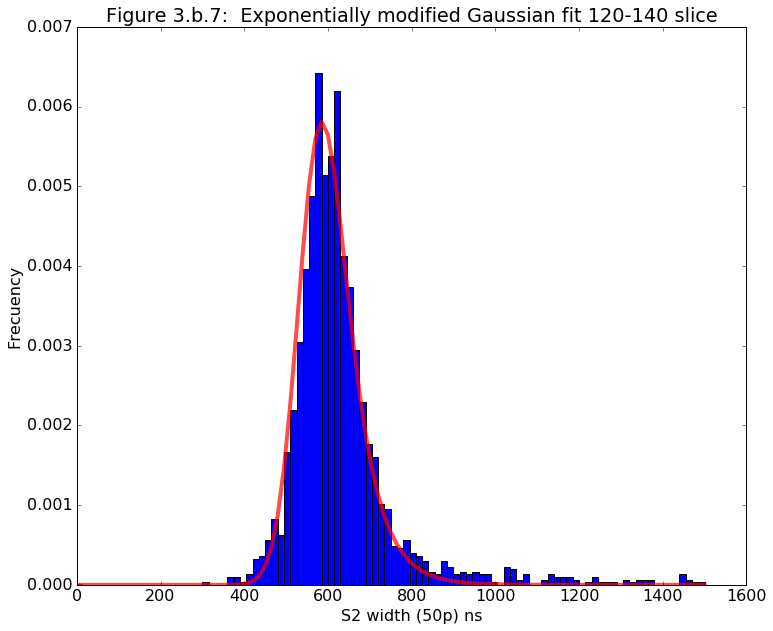

Correlation Matrix :
  1.000000 -0.389796  0.000000 -0.435286
 -0.389796  1.000000  0.666012  0.895494
  0.000000  0.666012  1.000000  0.743738
 -0.435286  0.895494  0.743738  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.93118 +/-    0.01511      (   1.00000)
p[1] =  549.14312 +/-    2.43202      ( 545.00000)
p[2] =   47.52189 +/-    1.91108      (  45.00000)
p[3] =    0.01784 +/-    0.00136      (   0.02000)

Chi-square =  355.12151, Chi-Squared/dof =    3.69918


In [50]:
# Exponentially modified Gaussian s2_width_50p_120_140

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_120_140, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,545,45,0.02]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.7:  Exponentially modified Gaussian fit 120-140 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][6]        = popt[1]
df_50p['mean_width_uncert'][6] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][6]               = popt[2]
df_50p['50p_uncert'][6]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 140-160 slice

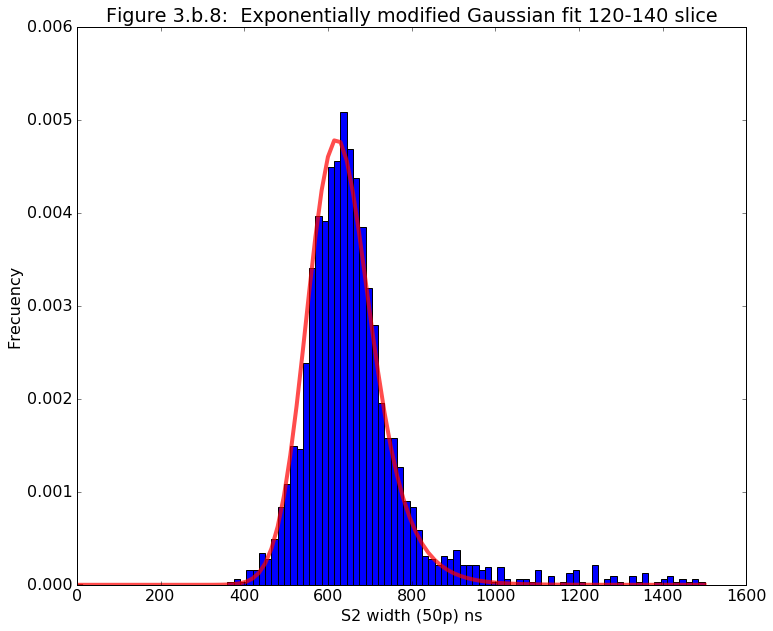

Correlation Matrix :
  1.000000 -0.367495  0.000000 -0.395886
 -0.367495  1.000000  0.730777  0.928286
  0.000000  0.730777  1.000000  0.787233
 -0.395886  0.928286  0.787233  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.94720 +/-    0.01063      (   1.00000)
p[1] =  578.67192 +/-    2.53714      ( 580.00000)
p[2] =   62.74644 +/-    1.76160      (  55.00000)
p[3] =    0.01677 +/-    0.00114      (   0.01800)

Chi-square =  147.62301, Chi-Squared/dof =    1.53774


In [51]:
# Exponentially modified Gaussian s2_width_50p_140_160

func = ModGaussian

n, bins, patches = plt.hist(s2_width_50p_140_160, bins= 100, normed = 1, range=[0,1500],label= 'Histogram')

init2 = [1,580,55,0.018]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 1500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 3.b.8:  Exponentially modified Gaussian fit 120-140 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_50p['mean_width'][7]        = popt[1]
df_50p['mean_width_uncert'][7] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_50p['50p'][7]               = popt[2]
df_50p['50p_uncert'][7]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## Results S2 width 50p

In [52]:
# Results
df_50p

drift_time  mean_width  mean_width_uncert        50p  50p_uncert
0        10.0  375.582563           0.740111  20.368036    0.507491
1        30.0  404.045155           0.982685  24.161470    0.656530
2        50.0  437.329885           0.864861  27.811912    0.621139
3        70.0  470.198235           1.664786  32.659299    1.203824
4        90.0  492.562372           1.205376  35.940640    0.995088
5       110.0  527.015693           2.141035  40.091353    1.626757
6       130.0  549.143118           2.432024  47.521893    1.911082
7       150.0  578.671919           2.537145  62.746441    1.761602

Here is a summary of the information acquired from all fitted slices using an exponentially modified Gaussian function. The change in their mean value $\mu $ and in their spread $\sigma$, is shown in Figure 10: 

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


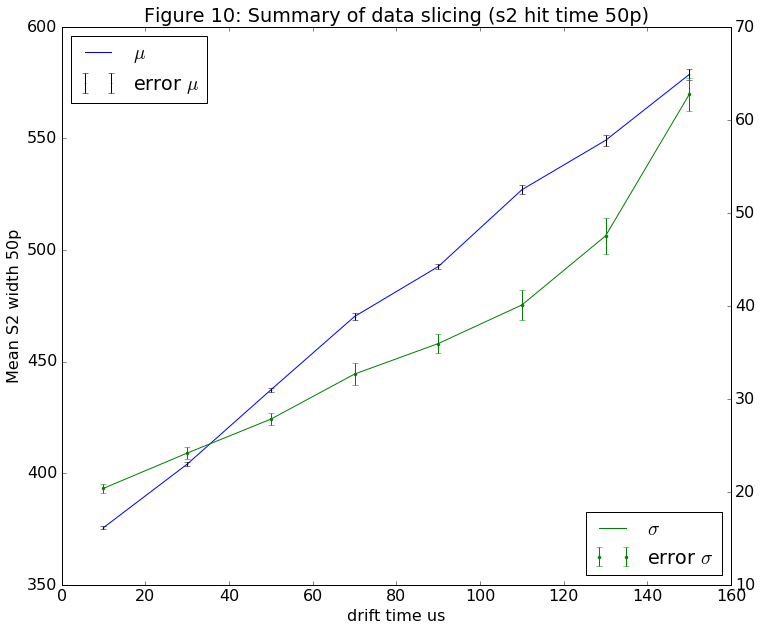

In [53]:
# Plot data and fit
fig, ax = plt.subplots(1, 1)
ax.plot(df_50p['drift_time'],df_50p['mean_width'],"b-",label='$\mu$')
ax.errorbar(df_50p['drift_time'], df_50p['mean_width'], yerr=df_50p['mean_width_uncert'], 
            fmt='o', markersize=1, color='k', label='error $\mu$')

ax2 = ax.twinx()
ax2.plot(df_50p['drift_time'],df_50p['50p'],"g-",label='$\sigma$')
ax2.errorbar(df_50p['drift_time'], df_50p['50p'], yerr=df_50p['50p_uncert'], fmt='.', 
             color='g',label='error $\sigma$')

#  legend customization
ax.legend(loc='upper left')
ax2.legend(loc="lower right")

#Axis labels
ax.set_xlabel('drift time us')
ax.set_ylabel('Mean S2 width 50p')

# Title
ax.set_title("Figure 10: Summary of data slicing (s2 hit time 50p)")

fig.show()

Now one fits a curve through the mean and deviation points for the plot in Figure 10, using again the same fit functions defined. Their fit is quantified by using a reduced $\chi^2$  quality  measure  and the $R^2 $ measure:

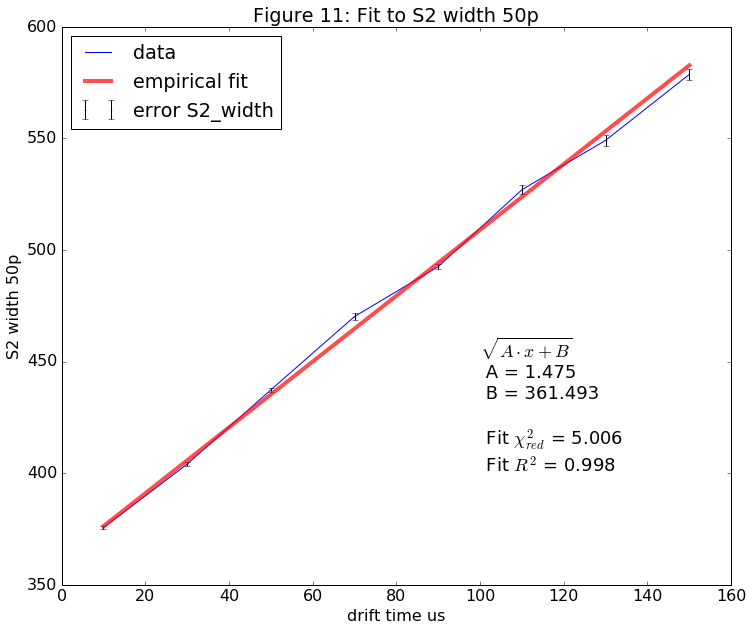

In [54]:
#Fit first empirical function

function = empirical_function

popt, pcov = curve_fit(function, df_50p['drift_time'], df_50p['mean_width'], 
                       sigma= df_50p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_50p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_50p['drift_time'],*popt)- df_50p['mean_width'])/df_50p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_50p['mean_width'] -
              function(df_50p['drift_time'],*popt)))**2)/sum((df_50p['mean_width'] - np.mean(df_50p['mean_width']))**2)


# Plot data and fit
plt.plot(df_50p['drift_time'],df_50p['mean_width'], label='data')
plt.errorbar(df_50p['drift_time'], df_50p['mean_width'], yerr=df_50p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_50p['drift_time'], function(df_50p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 400, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 50p')
# Title
plt.title("Figure 11: Fit to S2 width 50p")
plt.show()

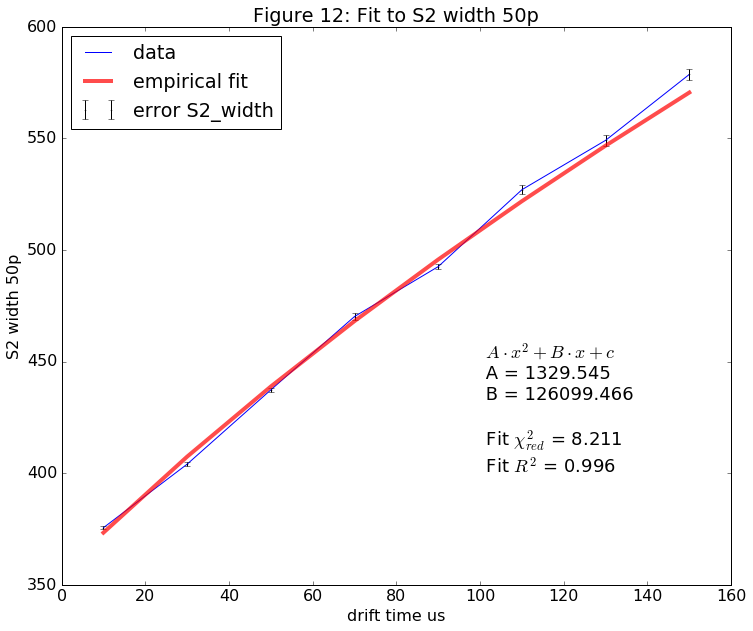

In [55]:
#Fit second empirical function

function = empirical_function2

popt, pcov = curve_fit(function, df_50p['drift_time'], df_50p['mean_width'], 
                       sigma= df_50p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_50p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_50p['drift_time'],*popt)- df_50p['mean_width'])/df_50p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_50p['mean_width'] -
              function(df_50p['drift_time'],*popt)))**2)/sum((df_50p['mean_width'] - np.mean(df_50p['mean_width']))**2)


# Plot data and fit
plt.plot(df_50p['drift_time'],df_50p['mean_width'], label='data')
plt.errorbar(df_50p['drift_time'], df_50p['mean_width'], yerr=df_50p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_50p['drift_time'], function(df_50p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 400, 
    (' $A \cdot x^2 + B \cdot x + c $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 50p')
# Title
plt.title("Figure 12: Fit to S2 width 50p")
plt.show()

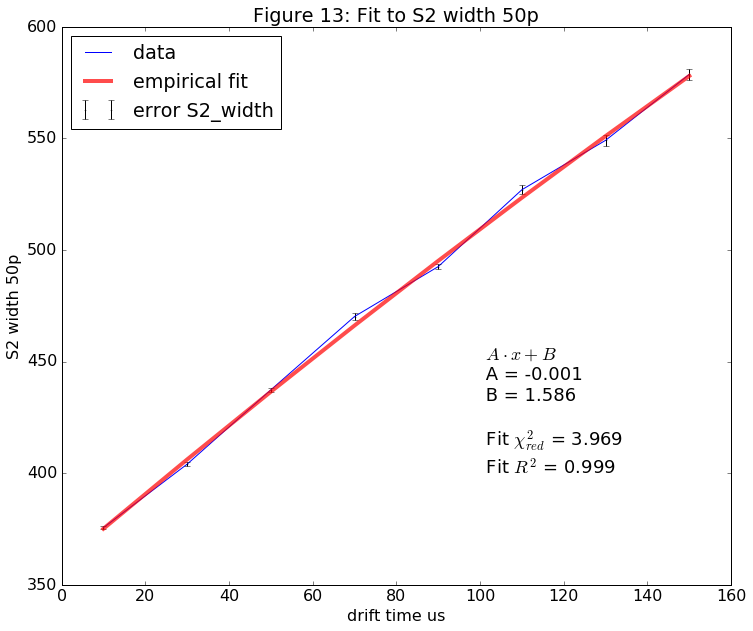

In [56]:
#Fit third empirical function

function = empirical_function3

popt, pcov = curve_fit(function, df_50p['drift_time'], df_50p['mean_width'], 
                       sigma= df_50p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_50p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_50p['drift_time'],*popt)- df_50p['mean_width'])/df_50p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_50p['mean_width'] -
              function(df_50p['drift_time'],*popt)))**2)/sum((df_50p['mean_width'] - np.mean(df_50p['mean_width']))**2)


# Plot data and fit
plt.plot(df_50p['drift_time'],df_50p['mean_width'], label='data')
plt.errorbar(df_50p['drift_time'], df_50p['mean_width'], yerr=df_50p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_50p['drift_time'], function(df_50p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 400, 
    (' $A \cdot x + B $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 50p')
# Title
plt.title("Figure 13: Fit to S2 width 50p")
plt.show()

**Conclusion: as before, we can go with Figure 12 fit if we want to go for precision**

# S2 width 90p (dt)

In [57]:
# set of s2_width_50p slices

s2_width_90p_0_20 = data[cut_0_20]['s2_width_90p'] # [0]
s2_width_90p_20_40 = data[cut_20_40]['s2_width_90p'] # [1]
s2_width_90p_40_60 = data[cut_40_60]['s2_width_90p'] # [2]
s2_width_90p_60_80 = data[cut_60_80]['s2_width_90p'] # [3]
s2_width_90p_80_100 = data[cut_80_100]['s2_width_90p'] # [4]
s2_width_90p_100_120 = data[cut_100_120]['s2_width_90p'] # [5]
s2_width_90p_120_140 = data[cut_120_140]['s2_width_90p'] # [6]
s2_width_90p_140_160 = data[cut_140_160]['s2_width_90p'] # [7]

# Data frame 

#mean point intervals
drift_time_range_90p = [10.,30.,50.,70.,90.,110.,130.,150.]
df_90p = pd.DataFrame(drift_time_range)
df_90p.columns = ['drift_time']
#fitted values per slice
df_90p['mean_width'] = 0.
df_90p['mean_width_uncert']= 0.
df_90p['90p'] = 0.
df_90p['90p_uncert']= 0.

## 0-20 slice

### Gaussian

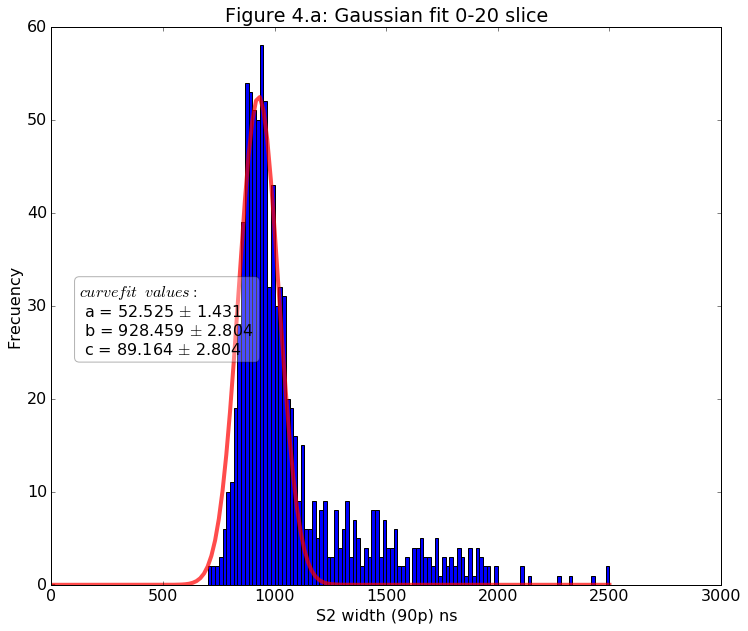

Correlation Matrix :
  1.000000  0.000000 -0.577350
  0.000000  1.000000 -0.000000
 -0.577350 -0.000000  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   52.52518 +/-    1.43073      (  55.00000)
p[1] =  928.45929 +/-    2.80446      ( 925.00000)
p[2] =   89.16401 +/-    2.80446      (  75.00000)

Chi-square = 1902.21198, Chi-Squared/dof =   12.94022


In [58]:
# Gaussian s2_width_90p_0_20
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_90p_0_20, bins= 150, range=[0,2500],label= 'Histogram')

init = [55,925,75]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 2500)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(125, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.a: Gaussian fit 0-20 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)

        
chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

### Exponentially modified Gaussian

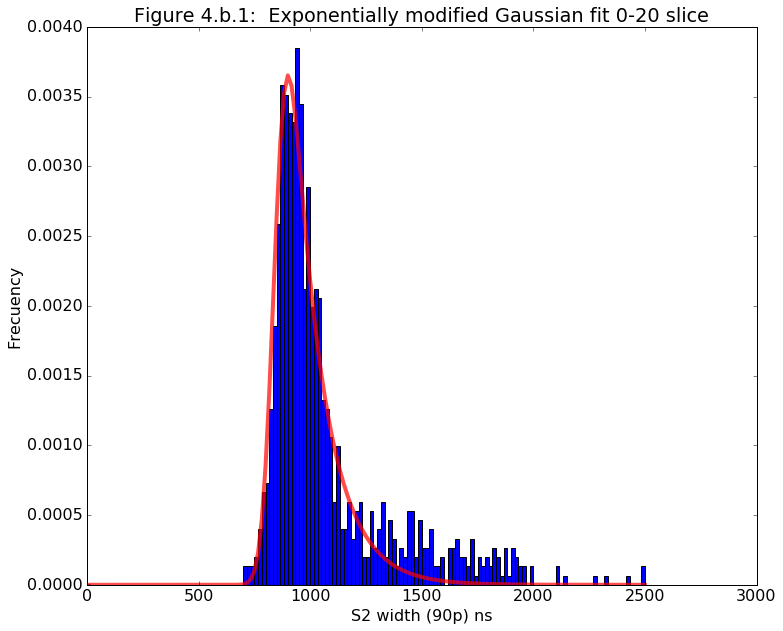

Correlation Matrix :
  1.000000 -0.393079  0.000000 -0.571763
 -0.393079  1.000000  0.373680  0.687486
  0.000000  0.373680  1.000000  0.543546
 -0.571763  0.687486  0.543546  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.87125 +/-    0.01895      (   1.00000)
p[1] =  846.05911 +/-    2.55166      ( 900.00000)
p[2] =   45.55794 +/-    2.85110      (  45.00000)
p[3] =    0.00734 +/-    0.00037      (   0.01000)

Chi-square =  440.51748, Chi-Squared/dof =    3.01724


In [59]:
# Exponentially modified Gaussian s2_width_90p_0_20

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_0_20, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,900,45,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.1:  Exponentially modified Gaussian fit 0-20 slice")
plt.show()

#If you want to export the data to make a chi-square fit somewhere else

#from numpy import *
#np.savetxt('Mod_Gaussian_cut_0_20.txt', np.c_[bins[:-1],n])

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][0]        = popt[1]
df_90p['mean_width_uncert'][0] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][0]               = popt[2]
df_90p['90p_uncert'][0]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 20-40 slice

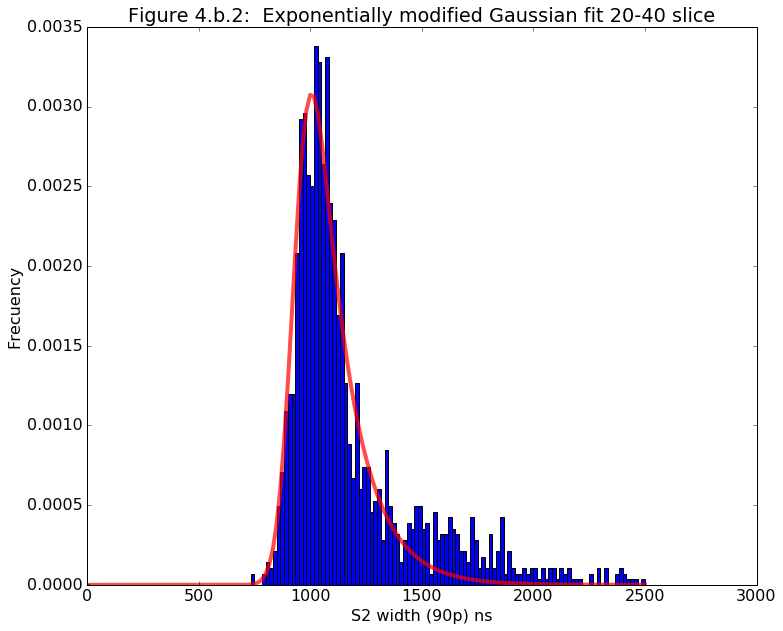

Correlation Matrix :
  1.000000 -0.404650 -0.000001 -0.546001
 -0.404650  1.000000  0.436699  0.741116
 -0.000001  0.436699  1.000000  0.589246
 -0.546001  0.741116  0.589246  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.88285 +/-    0.02154      (   1.00000)
p[1] =  937.98806 +/-    3.88733      ( 940.00000)
p[2] =   61.77583 +/-    4.10028      (  55.00000)
p[3] =    0.00670 +/-    0.00043      (   0.00800)

Chi-square =  490.08540, Chi-Squared/dof =    3.35675


In [60]:
# Exponentially modified Gaussian s2_width_90p_20_40

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_20_40, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,940,55,0.008]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.2:  Exponentially modified Gaussian fit 20-40 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][1]        = popt[1]
df_90p['mean_width_uncert'][1] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][1]               = popt[2]
df_90p['90p_uncert'][1]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 40-60 slice

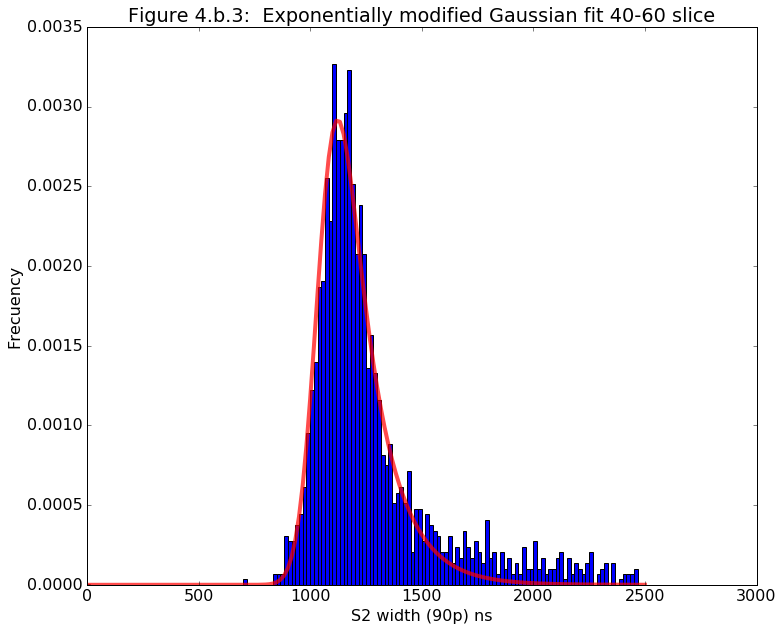

Correlation Matrix :
  1.000000 -0.409419 -0.000002 -0.520633
 -0.409419  1.000000  0.495351  0.786386
 -0.000002  0.495351  1.000000  0.629908
 -0.520633  0.786386  0.629908  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.89384 +/-    0.01585      (   1.00000)
p[1] = 1049.29868 +/-    3.39710      ( 990.00000)
p[2] =   72.72962 +/-    3.37205      (  65.00000)
p[3] =    0.00686 +/-    0.00036      (   0.00800)

Chi-square =  256.06614, Chi-Squared/dof =    1.75388


In [61]:
# Exponentially modified Gaussian s2_width_90p_40_60

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_40_60, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,990,65,0.008]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.3:  Exponentially modified Gaussian fit 40-60 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][2]        = popt[1]
df_90p['mean_width_uncert'][2] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][2]               = popt[2]
df_90p['90p_uncert'][2]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 60-80 slice

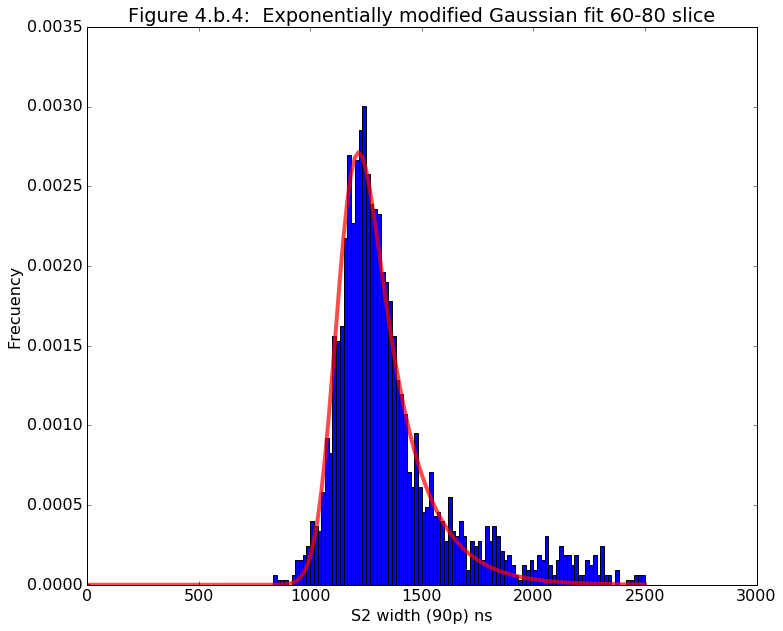

Correlation Matrix :
  1.000000 -0.407971 -0.000044 -0.532487
 -0.407971  1.000000  0.468474  0.766163
 -0.000044  0.468474  1.000000  0.611454
 -0.532487  0.766163  0.611454  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.91665 +/-    0.01441      (   1.00000)
p[1] = 1135.93525 +/-    3.14638      (1180.00000)
p[2] =   76.86251 +/-    3.21440      (  85.00000)
p[3] =    0.00597 +/-    0.00026      (   0.00850)

Chi-square =  189.38318, Chi-Squared/dof =    1.29715


In [62]:
# Exponentially modified Gaussian s2_width_90p_60_80

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_60_80, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,1180,85,0.0085]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.4:  Exponentially modified Gaussian fit 60-80 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][3]        = popt[1]
df_90p['mean_width_uncert'][3] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][3]               = popt[2]
df_90p['90p_uncert'][3]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 80-100 slice

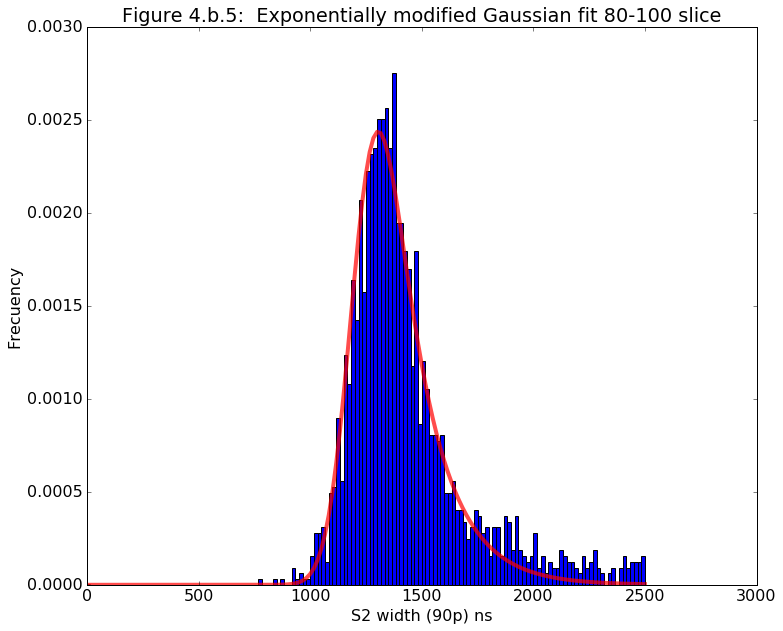

Correlation Matrix :
  1.000000 -0.409763 -0.000208 -0.506268
 -0.409763  1.000000  0.527416  0.809381
 -0.000208  0.527416  1.000000  0.651628
 -0.506268  0.809381  0.651628  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.93319 +/-    0.01636      (   1.00000)
p[1] = 1212.62962 +/-    4.48987      (1300.00000)
p[2] =   95.30550 +/-    4.29673      (  90.00000)
p[3] =    0.00578 +/-    0.00032      (   0.00800)

Chi-square =  222.12845, Chi-Squared/dof =    1.52143


In [63]:
# Exponentially modified Gaussian s2_width_90p_80_100

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_80_100, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,1300,90,0.008]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.5:  Exponentially modified Gaussian fit 80-100 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][4]        = popt[1]
df_90p['mean_width_uncert'][4] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][4]               = popt[2]
df_90p['90p_uncert'][4]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 100-120 slice

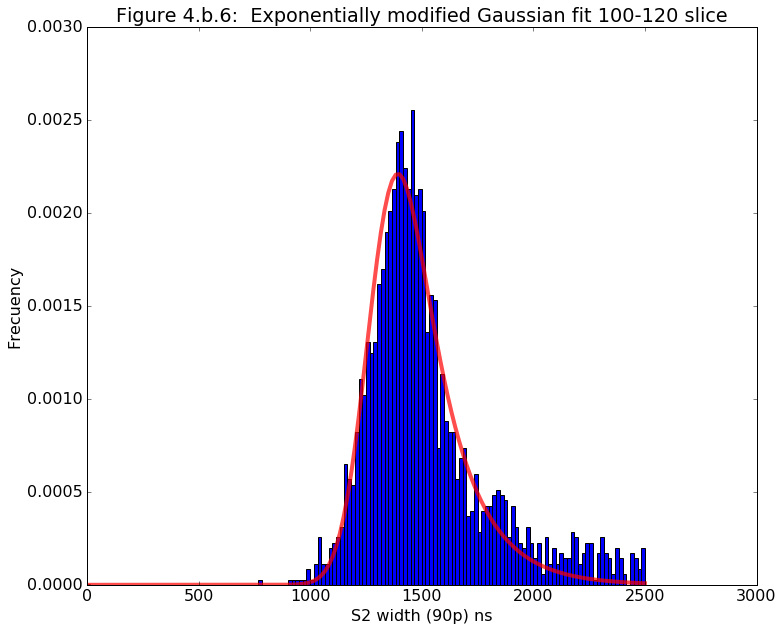

Correlation Matrix :
  1.000000 -0.409588 -0.000971 -0.497605
 -0.409588  1.000000  0.547480  0.823129
 -0.000971  0.547480  1.000000  0.665116
 -0.497605  0.823129  0.665116  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.92614 +/-    0.01786      (   1.00000)
p[1] = 1292.20000 +/-    5.63807      (1300.00000)
p[2] =  107.22204 +/-    5.26737      ( 105.00000)
p[3] =    0.00546 +/-    0.00035      (   0.00700)

Chi-square =  243.89885, Chi-Squared/dof =    1.67054


In [64]:
# Exponentially modified Gaussian s2_width_90p_100_120

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_100_120, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,1300,105,0.007]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.6:  Exponentially modified Gaussian fit 100-120 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][5]        = popt[1]
df_90p['mean_width_uncert'][5] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][5]               = popt[2]
df_90p['90p_uncert'][5]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 120-140 slice

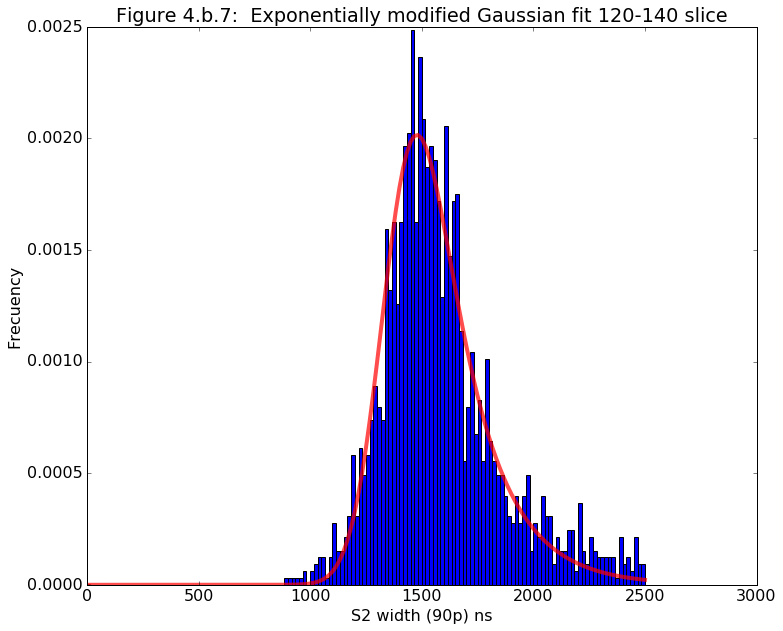

Correlation Matrix :
  1.000000 -0.412493 -0.005458 -0.497517
 -0.412493  1.000000  0.556883  0.829185
 -0.005458  0.556883  1.000000  0.671564
 -0.497517  0.829185  0.671564  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.95731 +/-    0.02130      (   1.00000)
p[1] = 1364.28421 +/-    7.49772      (1350.00000)
p[2] =  122.62007 +/-    6.93445      ( 115.00000)
p[3] =    0.00487 +/-    0.00037      (   0.00700)

Chi-square =  306.09497, Chi-Squared/dof =    2.09654


In [65]:
# Exponentially modified Gaussian s2_width_90p_120_140

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_120_140, bins= 150, normed = 1, range=[0,2500],label= 'Histogram')

init2 = [1,1350,115,0.007]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.7:  Exponentially modified Gaussian fit 120-140 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][6]        = popt[1]
df_90p['mean_width_uncert'][6] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][6]               = popt[2]
df_90p['90p_uncert'][6]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 140-160 slice

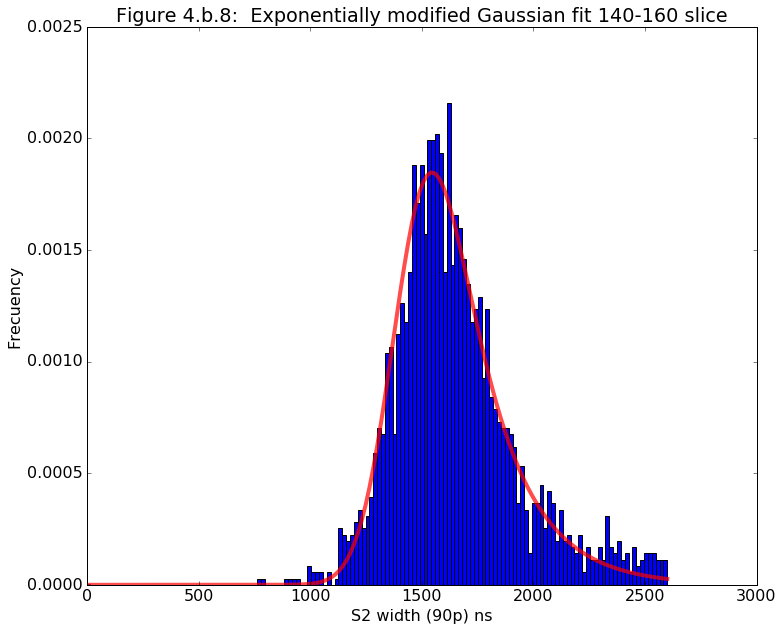

Correlation Matrix :
  1.000000 -0.413782 -0.008414 -0.493957
 -0.413782  1.000000  0.570253  0.837830
 -0.008414  0.570253  1.000000  0.680565
 -0.493957  0.837830  0.680565  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.97117 +/-    0.01627      (   1.00000)
p[1] = 1419.68441 +/-    6.42367      (1450.00000)
p[2] =  137.86996 +/-    5.84614      ( 155.00000)
p[3] =    0.00449 +/-    0.00026      (   0.00700)

Chi-square =  155.70096, Chi-Squared/dof =    1.06644


In [66]:
# Exponentially modified Gaussian s2_width_90p_140_160

func = ModGaussian

n, bins, patches = plt.hist(s2_width_90p_140_160, bins= 150, normed = 1, range=[0,2600],label= 'Histogram')

init2 = [1,1450,155,0.007]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0, 2600)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (90p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 4.b.8:  Exponentially modified Gaussian fit 140-160 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_90p['mean_width'][7]        = popt[1]
df_90p['mean_width_uncert'][7] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_90p['90p'][7]               = popt[2]
df_90p['90p_uncert'][7]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## Results S2 width 90p

In [67]:
# Results
df_90p

drift_time   mean_width  mean_width_uncert         90p  90p_uncert
0        10.0   846.059114           2.551663   45.557941    2.851099
1        30.0   937.988064           3.887330   61.775831    4.100281
2        50.0  1049.298678           3.397104   72.729623    3.372052
3        70.0  1135.935252           3.146380   76.862506    3.214399
4        90.0  1212.629623           4.489875   95.305504    4.296733
5       110.0  1292.199998           5.638073  107.222038    5.267372
6       130.0  1364.284205           7.497720  122.620067    6.934453
7       150.0  1419.684414           6.423667  137.869962    5.846144

Here is a summary of the information acquired from all fitted slices using an exponentially modified Gaussian function. The change in their mean value $\mu $ and in their spread $\sigma$, is shown in Figure 14: 

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


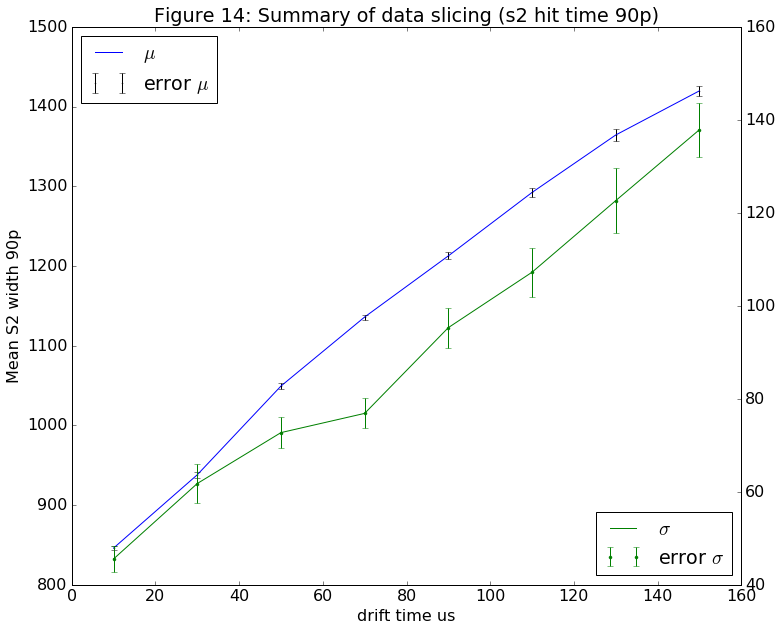

In [68]:
# Plot data and fit
fig, ax = plt.subplots(1, 1)
ax.plot(df_90p['drift_time'],df_90p['mean_width'],"b-",label='$\mu$')
ax.errorbar(df_90p['drift_time'], df_90p['mean_width'], yerr=df_90p['mean_width_uncert'], 
            fmt='o', markersize=1, color='k', label='error $\mu$')

ax2 = ax.twinx()
ax2.plot(df_90p['drift_time'],df_90p['90p'],"g-",label='$\sigma$')
ax2.errorbar(df_90p['drift_time'], df_90p['90p'], yerr=df_90p['90p_uncert'], fmt='.', 
             color='g',label='error $\sigma$')

#  legend customization
ax.legend(loc='upper left')
ax2.legend(loc="lower right")

#Axis labels
ax.set_xlabel('drift time us')
ax.set_ylabel('Mean S2 width 90p')

# Title
ax.set_title("Figure 14: Summary of data slicing (s2 hit time 90p)")

fig.show()

Now one fits a curve through the mean and deviation points for the plot in Figure 13, using again the same fit functions defined. Their fit is quantified by using a reduced $\chi^2$  quality  measure  and the $R^2 $ measure:

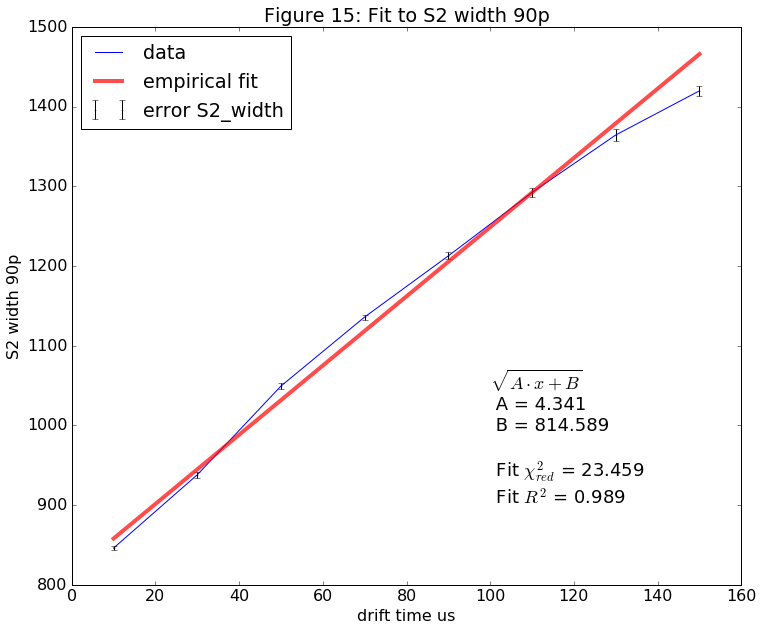

In [69]:
#Fit first empirical function

function = empirical_function

popt, pcov = curve_fit(function, df_90p['drift_time'], df_90p['mean_width'], 
                       sigma= df_90p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_90p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_90p['drift_time'],*popt)- df_90p['mean_width'])/df_90p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_90p['mean_width'] -
              function(df_90p['drift_time'],*popt)))**2)/sum((df_90p['mean_width'] - np.mean(df_90p['mean_width']))**2)


# Plot data and fit
plt.plot(df_90p['drift_time'],df_90p['mean_width'], label='data')
plt.errorbar(df_90p['drift_time'], df_90p['mean_width'], yerr=df_90p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_90p['drift_time'], function(df_90p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 900, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 90p')
# Title
plt.title("Figure 15: Fit to S2 width 90p")
plt.show()

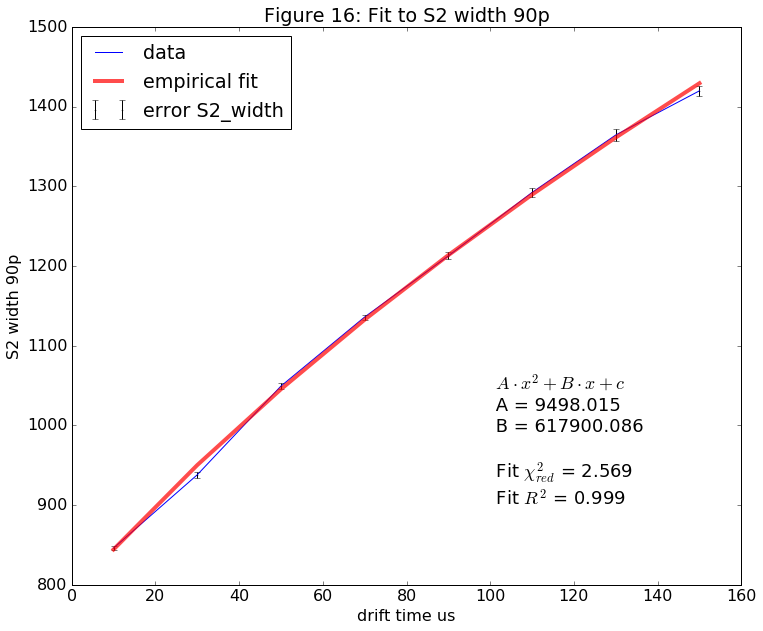

In [70]:
#Fit second empirical function

function = empirical_function2

popt, pcov = curve_fit(function, df_90p['drift_time'], df_90p['mean_width'], 
                       sigma= df_90p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_90p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_90p['drift_time'],*popt)- df_90p['mean_width'])/df_90p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_90p['mean_width'] -
              function(df_90p['drift_time'],*popt)))**2)/sum((df_90p['mean_width'] - np.mean(df_90p['mean_width']))**2)


# Plot data and fit
plt.plot(df_90p['drift_time'],df_90p['mean_width'], label='data')
plt.errorbar(df_90p['drift_time'], df_90p['mean_width'], yerr=df_90p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_90p['drift_time'], function(df_90p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 900, 
    (' $A \cdot x^2 + B \cdot x + c $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 90p')
# Title
plt.title("Figure 16: Fit to S2 width 90p")
plt.show()

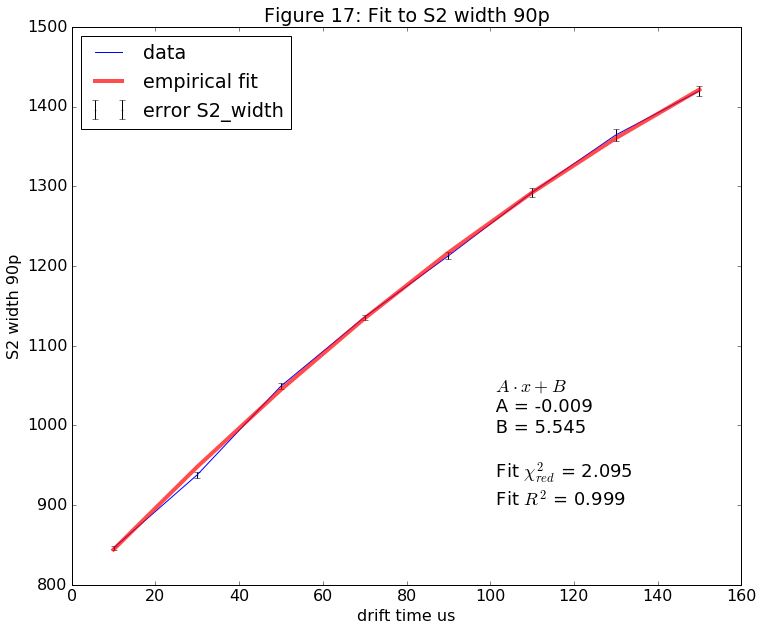

In [71]:
#Fit third empirical function

function = empirical_function3

popt, pcov = curve_fit(function, df_90p['drift_time'], df_90p['mean_width'], 
                       sigma= df_90p['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_90p['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_90p['drift_time'],*popt)- df_90p['mean_width'])/df_90p['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_90p['mean_width'] -
              function(df_90p['drift_time'],*popt)))**2)/sum((df_90p['mean_width'] - np.mean(df_90p['mean_width']))**2)


# Plot data and fit
plt.plot(df_90p['drift_time'],df_90p['mean_width'], label='data')
plt.errorbar(df_90p['drift_time'], df_90p['mean_width'], yerr=df_90p['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_90p['drift_time'], function(df_90p['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 900, 
    (' $A \cdot x + B $ \n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width 90p')
# Title
plt.title("Figure 17: Fit to S2 width 90p")
plt.show()

**Conclusion: as before, we can go with Figure 16 fit if we want to go for precision**

# S2 width Full (dt)

In [72]:
# set of s2_width_full slices

s2_width_full_0_20 = data[cut_0_20]['s2_width_full'] # [0]
s2_width_full_20_40 = data[cut_20_40]['s2_width_full'] # [1]
s2_width_full_40_60 = data[cut_40_60]['s2_width_full'] # [2]
s2_width_full_60_80 = data[cut_60_80]['s2_width_full'] # [3]
s2_width_full_80_100 = data[cut_80_100]['s2_width_full'] # [4]
s2_width_full_100_120 = data[cut_100_120]['s2_width_full'] # [5]
s2_width_full_120_140 = data[cut_120_140]['s2_width_full'] # [6]
s2_width_full_140_160 = data[cut_140_160]['s2_width_full'] # [7]

# Data frame 

#mean point intervals
drift_time_range = [10.,30.,50.,70.,90.,110.,130.,150.]
df_full = pd.DataFrame(drift_time_range)
df_full.columns = ['drift_time']
#fitted values per slice
df_full['mean_width'] = 0.
df_full['mean_width_uncert']= 0.
df_full['full'] = 0.
df_full['full_uncert']= 0.

## 0-20 slice

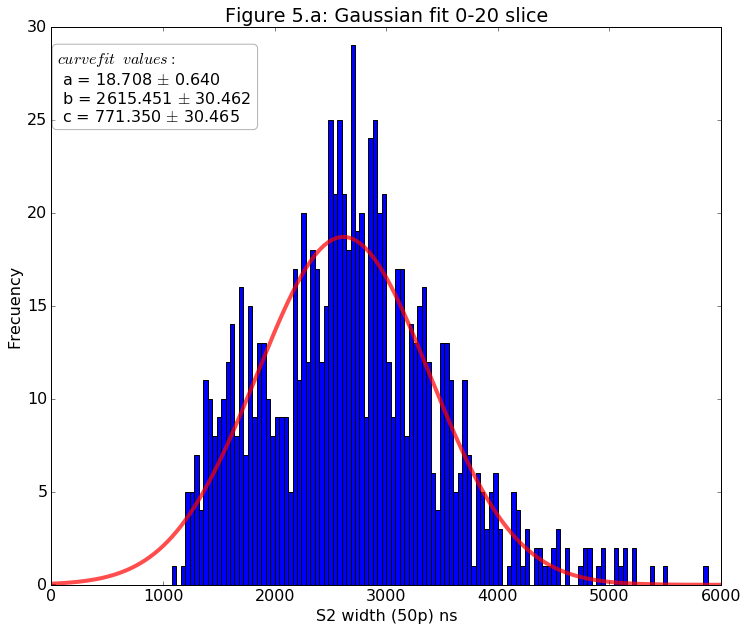

Correlation Matrix :
  1.000000  0.000031 -0.577382
  0.000031  1.000000 -0.000058
 -0.577382 -0.000058  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   18.70820 +/-    0.63985      (  25.00000)
p[1] = 2615.45115 +/-   30.46203      (2600.00000)
p[2] =  771.34969 +/-   30.46482      ( 750.00000)

Chi-square = 1371.27758, Chi-Squared/dof =    9.32842


In [73]:
# Gaussian s2_width_full_0_20
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_0_20, bins= 150, range=[0,6000],label= 'Histogram')

init = [25,2600,750]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a: Gaussian fit 0-20 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][0]        = popt[1]
df_full['mean_width_uncert'][0] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][0]               = popt[2]
df_full['full_uncert'][0]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

In [74]:
#from numpy import *
#np.savetxt('Gaussian_cut_0_20_witdh_full.txt', np.c_[bins[:-1],n])

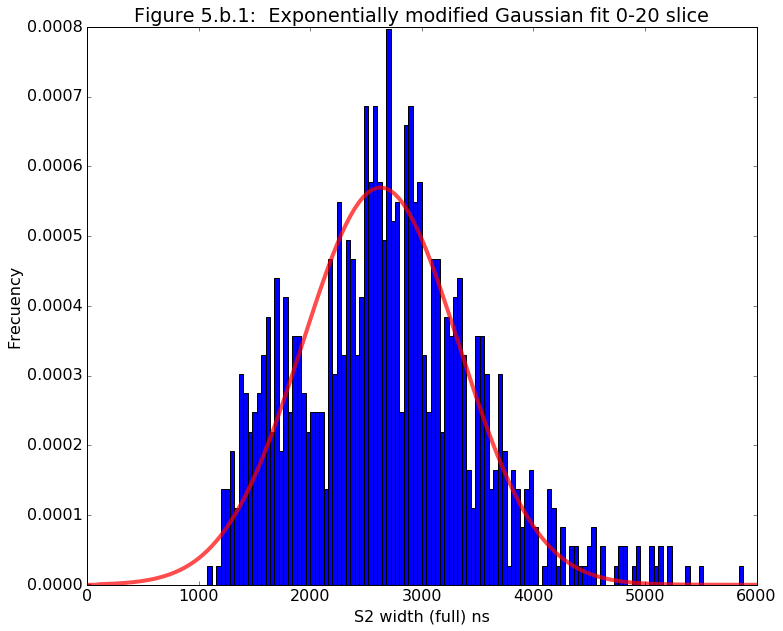

Correlation Matrix :
  1.000000 -0.027236 -0.006540 -0.027236
 -0.027236  1.000000  0.999357  0.999999
 -0.006540  0.999357  1.000000  0.999358
 -0.027236  0.999999  0.999358  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.99998 +/-    0.03861      (   1.00000)
p[1] = 2609.99999 +/- 29738.39446      (2610.00000)
p[2] =  700.00019 +/-  871.48002      ( 700.00000)
p[3] =    0.04871 +/-   70.66171      (   0.04200)

Chi-square =  110.70069, Chi-Squared/dof =    0.75822


In [75]:
# Exponentially modified Gaussian s2_width_full_0_20

func = ModGaussian

n, bins, patches = plt.hist(s2_width_full_0_20, bins= 150, normed = 1, range=[0,6000],label= 'Histogram')

init2 = [1,2610,700,0.042]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,6000)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.b.1:  Exponentially modified Gaussian fit 0-20 slice")
plt.show()


# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

# Calculate Chi-square
chisq = sum(((n-func(bins[:-1],*popt))/0.0001)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

**For now the method to calculate $\chi^2$ will be to use a Gaussian approach given that the Exp mod. Gaussian approach doesn't provide a trustworthy uncertainty and $\chi^2$. **

## 20-40 slice

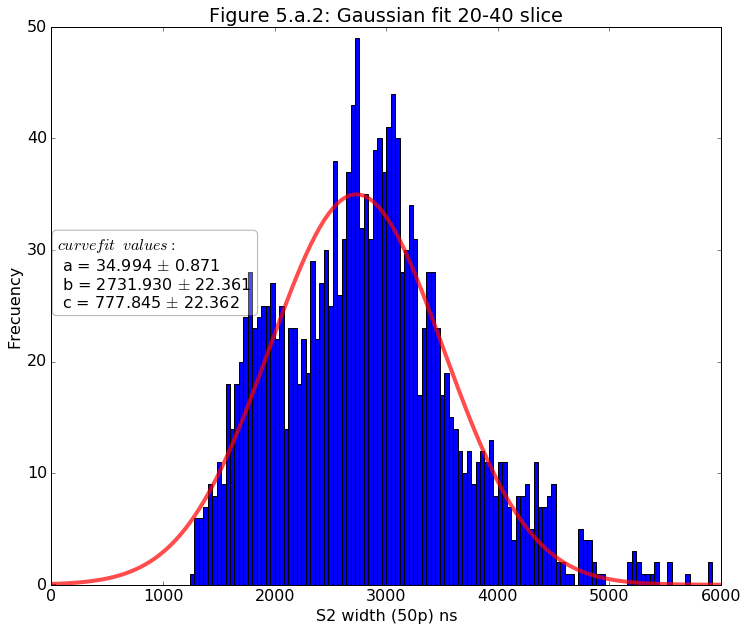

Correlation Matrix :
  1.000000  0.000014 -0.577366
  0.000014  1.000000 -0.000027
 -0.577366 -0.000027  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   34.99367 +/-    0.87122      (  35.00000)
p[1] = 2731.92996 +/-   22.36128      (2800.00000)
p[2] =  777.84523 +/-   22.36227      ( 750.00000)

Chi-square = 2563.76398, Chi-Squared/dof =   17.44057


In [76]:
# Gaussian s2_width_full_20_40
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_20_40, bins= 150, range=[0,6000],label= 'Histogram')

init = [35,2800,750]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 20-40 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][1]        = popt[1]
df_full['mean_width_uncert'][1] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][1]               = popt[2]
df_full['full_uncert'][1]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 40-60 slice

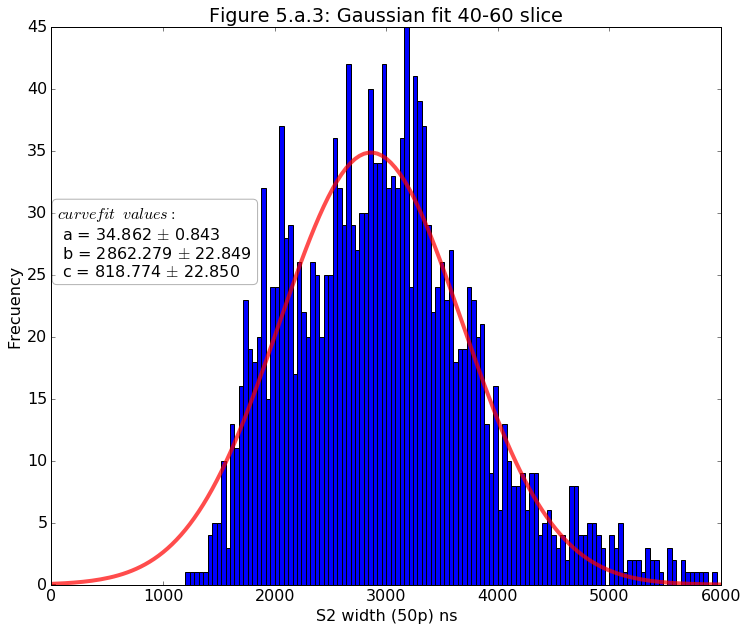

Correlation Matrix :
  1.000000  0.000014 -0.577370
  0.000014  1.000000 -0.000026
 -0.577370 -0.000026  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   34.86189 +/-    0.84254      (  40.00000)
p[1] = 2862.27855 +/-   22.84896      (2900.00000)
p[2] =  818.77416 +/-   22.85025      ( 770.00000)

Chi-square = 2523.87961, Chi-Squared/dof =   17.16925


In [77]:
# Gaussian s2_width_full_40_60
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_40_60, bins= 150, range=[0,6000],label= 'Histogram')

init = [40,2900,770]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.3: Gaussian fit 40-60 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][2]        = popt[1]
df_full['mean_width_uncert'][2] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][2]               = popt[2]
df_full['full_uncert'][2]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 60-80 slice

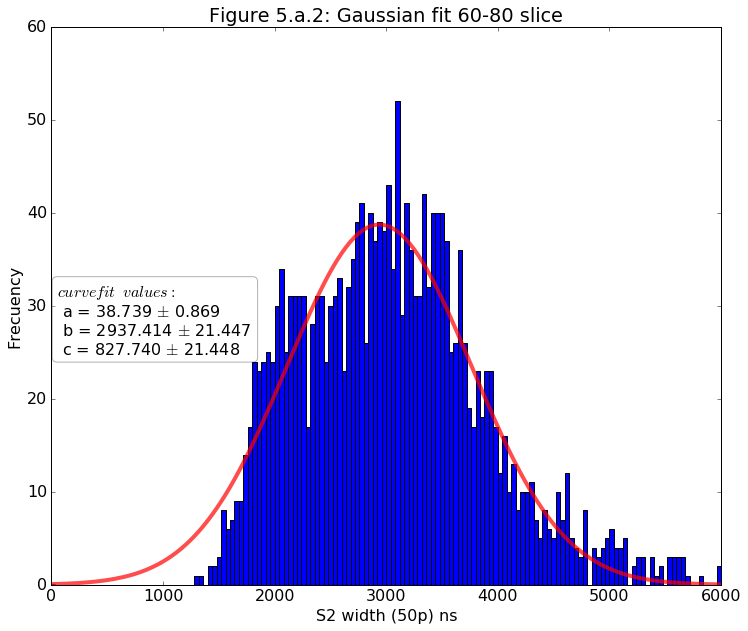

Correlation Matrix :
  1.000000  0.000006 -0.577369
  0.000006  1.000000 -0.000011
 -0.577369 -0.000011  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   38.73889 +/-    0.86925      (  42.00000)
p[1] = 2937.41447 +/-   21.44651      (2900.00000)
p[2] =  827.73979 +/-   21.44765      ( 820.00000)

Chi-square = 2715.88988, Chi-Squared/dof =   18.47544


In [78]:
# Gaussian s2_width_full_60_80
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_60_80, bins= 150, range=[0,6000],label= 'Histogram')

init = [42,2900,820]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 60-80 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][3]        = popt[1]
df_full['mean_width_uncert'][3] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][3]               = popt[2]
df_full['full_uncert'][3]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 80-100 slice

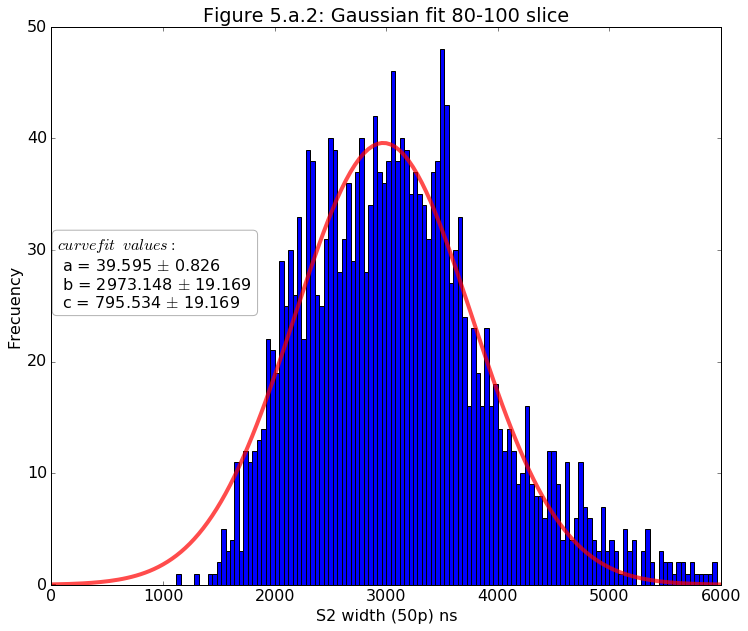

Correlation Matrix :
  1.000000  0.000000 -0.577357
  0.000000  1.000000 -0.000001
 -0.577357 -0.000001  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   39.59538 +/-    0.82625      (  44.00000)
p[1] = 2973.14840 +/-   19.16877      (3000.00000)
p[2] =  795.53410 +/-   19.16914      ( 835.00000)

Chi-square = 2358.41205, Chi-Squared/dof =   16.04362


In [79]:
# Gaussian s2_width_full_80_100
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_80_100, bins= 150, range=[0,6000],label= 'Histogram')

init = [44,3000,835]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0, 6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 80-100 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][4]        = popt[1]
df_full['mean_width_uncert'][4] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][4]               = popt[2]
df_full['full_uncert'][4]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 100-120 slice

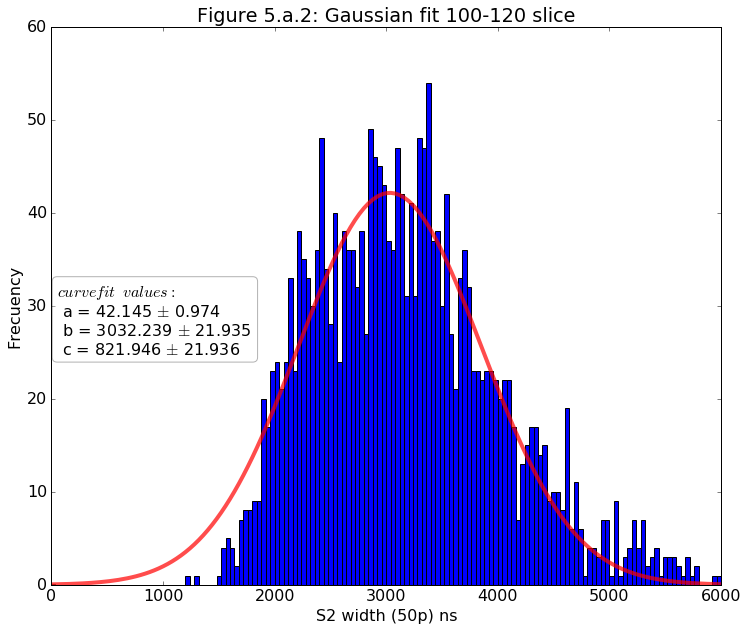

Correlation Matrix :
  1.000000 -0.000006 -0.577367
 -0.000006  1.000000  0.000011
 -0.577367  0.000011  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   42.14494 +/-    0.97403      (  42.00000)
p[1] = 3032.23874 +/-   21.93477      (3050.00000)
p[2] =  821.94631 +/-   21.93579      ( 805.00000)

Chi-square = 3386.19937, Chi-Squared/dof =   23.03537


In [80]:
# Gaussian s2_width_full_100_120
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_100_120, bins= 150, range=[0,6000],label= 'Histogram')

init = [42,3050,805]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0,6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 100-120 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))
        
        
cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][5]        = popt[1]
df_full['mean_width_uncert'][5] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][5]               = popt[2]
df_full['full_uncert'][5]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 120-140 slice

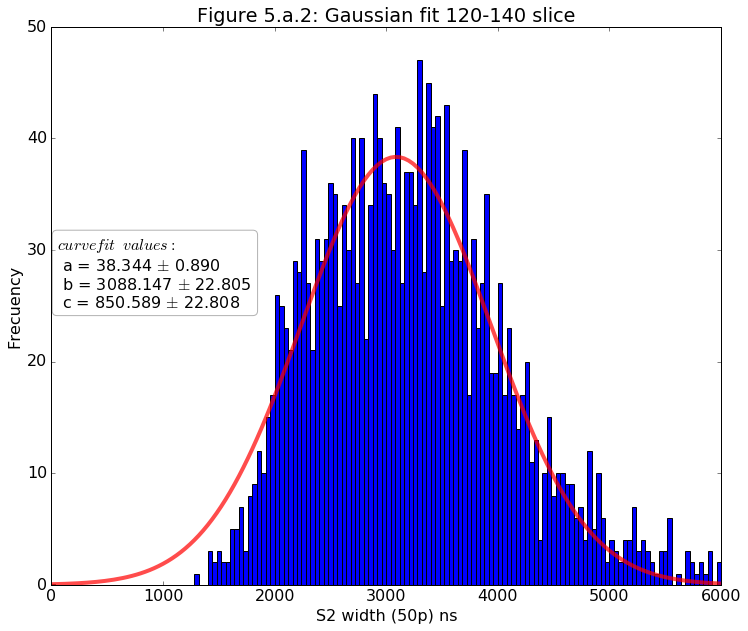

Correlation Matrix :
  1.000000 -0.000028 -0.577393
 -0.000028  1.000000  0.000052
 -0.577393  0.000052  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   38.34400 +/-    0.89034      (  44.00000)
p[1] = 3088.14662 +/-   22.80521      (3050.00000)
p[2] =  850.58885 +/-   22.80800      ( 825.00000)

Chi-square = 2927.76421, Chi-Squared/dof =   19.91676


In [81]:
# Gaussian s2_width_full_120_140
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_120_140, bins= 150, range=[0,6000],label= 'Histogram')

init = [44,3050,825]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0,6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 120-140 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))
        
        
cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][6]        = popt[1]
df_full['mean_width_uncert'][6] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][6]               = popt[2]
df_full['full_uncert'][6]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 140-160 slice

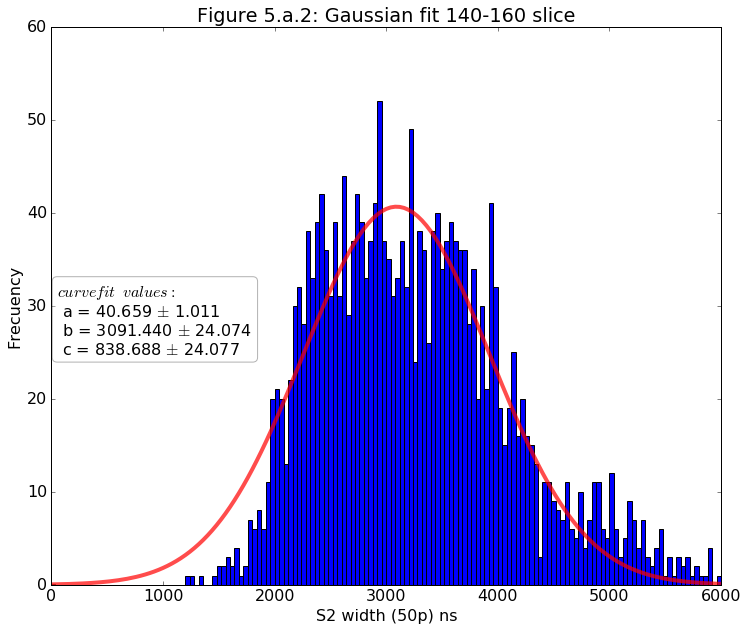

Correlation Matrix :
  1.000000 -0.000021 -0.577383
 -0.000021  1.000000  0.000041
 -0.577383  0.000041  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   40.65857 +/-    1.01076      (  41.00000)
p[1] = 3091.43952 +/-   24.07435      (3100.00000)
p[2] =  838.68753 +/-   24.07657      ( 825.00000)

Chi-square = 3720.56033, Chi-Squared/dof =   25.30993


In [82]:
# Gaussian s2_width_full_140_160
# n = frecuencies inside bins

func = gaussian
n, bins, patches = plt.hist(s2_width_full_140_160, bins= 150, range=[0,6000],label= 'Histogram')

init = [41,3100,825]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0,6000)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(50, 25, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (50p) ns')
plt.ylabel('Frecuency')
plt.title("Figure 5.a.2: Gaussian fit 140-160 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)
        
    
weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 1

chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))
        
        
cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_full['mean_width'][7]        = popt[1]
df_full['mean_width_uncert'][7] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_full['full'][7]               = popt[2]
df_full['full_uncert'][7]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## Results S2 width full

In [83]:
# Results
df_full

drift_time   mean_width  mean_width_uncert        full  full_uncert
0        10.0  2615.451154          30.462032  771.349691    30.464819
1        30.0  2731.929957          22.361281  777.845230    22.362272
2        50.0  2862.278547          22.848961  818.774156    22.850250
3        70.0  2937.414465          21.446509  827.739789    21.447655
4        90.0  2973.148395          19.168771  795.534096    19.169143
5       110.0  3032.238741          21.934767  821.946311    21.935789
6       130.0  3088.146624          22.805214  850.588854    22.807996
7       150.0  3091.439516          24.074354  838.687527    24.076574

Here is a summary of the information acquired from all fitted slices using an exponentially modified Gaussian function. The change in their mean value $\mu $ and in their spread $\sigma$, is shown in Figure 18: 

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


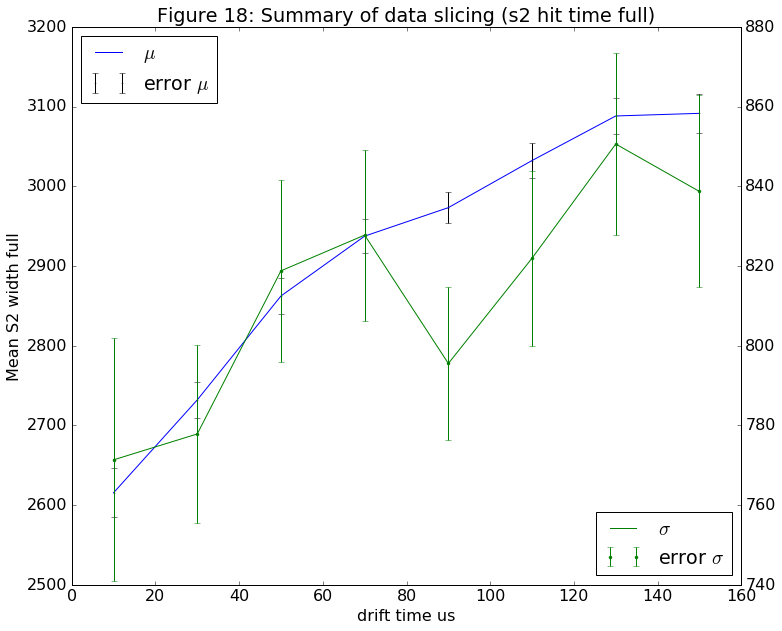

In [84]:
# Plot data and fit
fig, ax = plt.subplots(1, 1)
ax.plot(df_full['drift_time'],df_full['mean_width'],"b-",label='$\mu$')
ax.errorbar(df_full['drift_time'], df_full['mean_width'], yerr=df_full['mean_width_uncert'], 
            fmt='o', markersize=1, color='k', label='error $\mu$')

ax2 = ax.twinx()
ax2.plot(df_full['drift_time'],df_full['full'],"g-",label='$\sigma$')
ax2.errorbar(df_full['drift_time'], df_full['full'], yerr=df_full['full_uncert'], fmt='.', 
             color='g',label='error $\sigma$')

#  legend customization
ax.legend(loc='upper left')
ax2.legend(loc="lower right")

#Axis labels
ax.set_xlabel('drift time us')
ax.set_ylabel('Mean S2 width full')

# Title
ax.set_title("Figure 18: Summary of data slicing (s2 hit time full)")

fig.show()

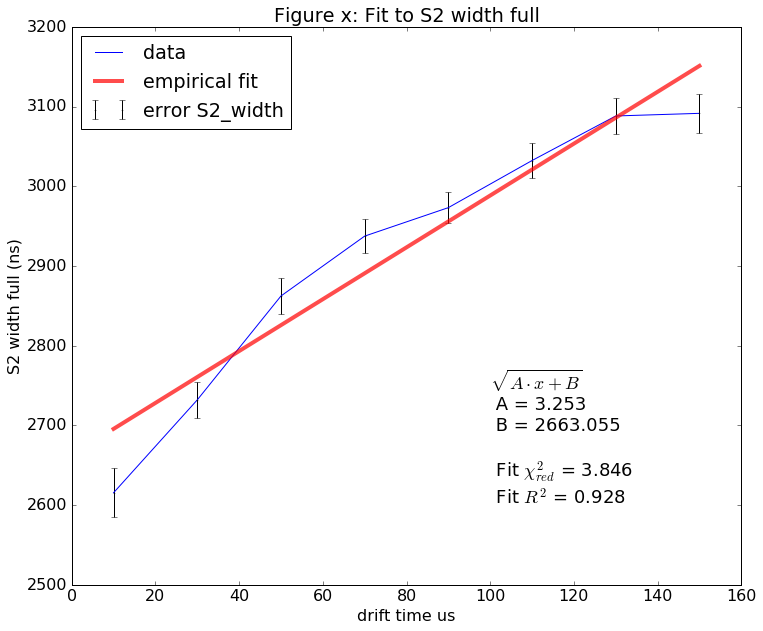

In [85]:
#Fit first empirical function

function = empirical_function

popt, pcov = curve_fit(function, df_full['drift_time'], df_full['mean_width'], 
                       sigma= df_full['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_full['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_full['drift_time'],*popt)- df_full['mean_width'])/df_full['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_full['mean_width'] -
              function(df_full['drift_time'],*popt)))**2)/sum((df_full['mean_width'] - np.mean(df_full['mean_width']))**2)


# Plot data and fit
plt.plot(df_full['drift_time'],df_full['mean_width'], label='data')
plt.errorbar(df_full['drift_time'], df_full['mean_width'], yerr=df_full['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_full['drift_time'], function(df_full['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 2600, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width full (ns)')
# Title
plt.title("Figure x: Fit to S2 width full")
plt.show()

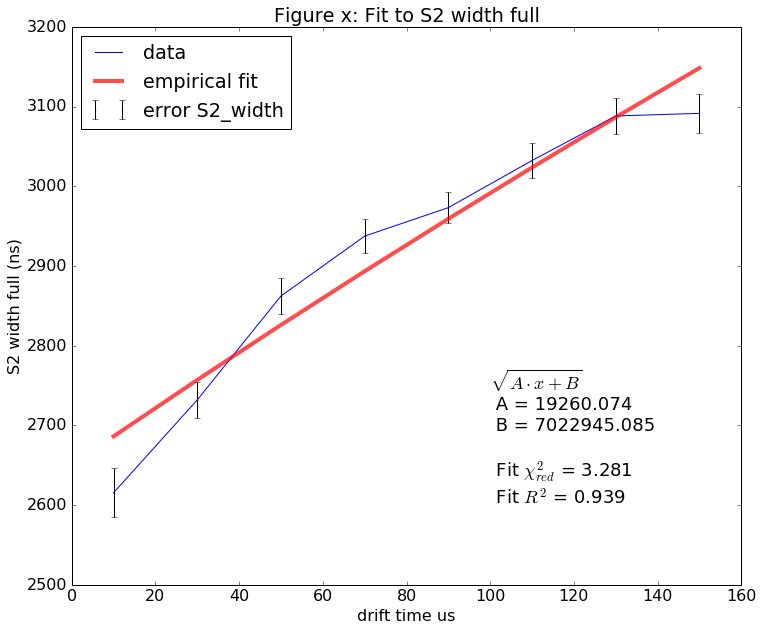

In [86]:
#Fit first empirical function2

function = empirical_function2

popt, pcov = curve_fit(function, df_full['drift_time'], df_full['mean_width'], 
                       sigma= df_full['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_full['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_full['drift_time'],*popt)- df_full['mean_width'])/df_full['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_full['mean_width'] -
              function(df_full['drift_time'],*popt)))**2)/sum((df_full['mean_width'] - np.mean(df_full['mean_width']))**2)


# Plot data and fit
plt.plot(df_full['drift_time'],df_full['mean_width'], label='data')
plt.errorbar(df_full['drift_time'], df_full['mean_width'], yerr=df_full['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_full['drift_time'], function(df_full['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 2600, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width full (ns)')
# Title
plt.title("Figure x: Fit to S2 width full")
plt.show()

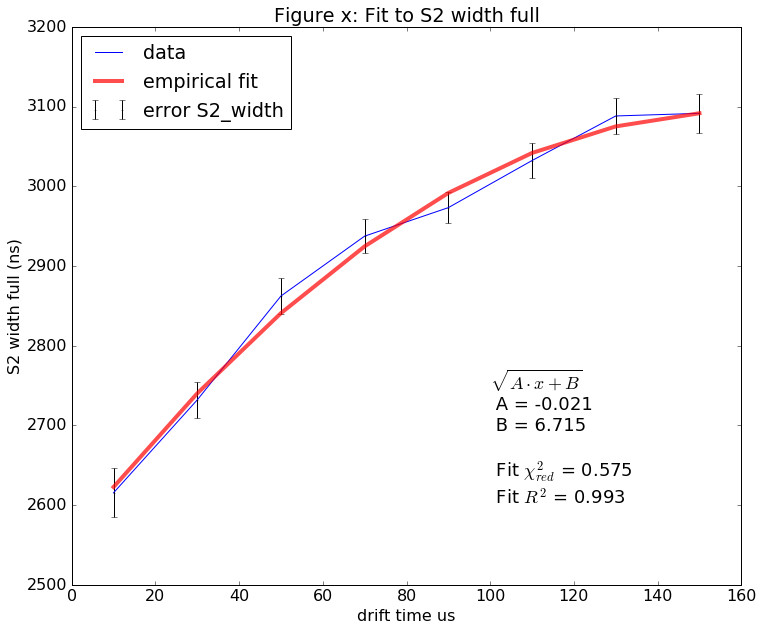

In [87]:
#Fit first empirical function3

function = empirical_function3

popt, pcov = curve_fit(function, df_full['drift_time'], df_full['mean_width'], 
                       sigma= df_full['mean_width_uncert'],method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_full['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_full['drift_time'],*popt)- df_full['mean_width'])/df_full['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_full['mean_width'] -
              function(df_full['drift_time'],*popt)))**2)/sum((df_full['mean_width'] - np.mean(df_full['mean_width']))**2)


# Plot data and fit
plt.plot(df_full['drift_time'],df_full['mean_width'], label='data')
plt.errorbar(df_full['drift_time'], df_full['mean_width'], yerr=df_full['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_full['drift_time'], function(df_full['drift_time'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(100, 2600, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )

# Legend customization
pylab.legend(loc='upper left')
# Axis labels
plt.xlabel('drift time us')
plt.ylabel('S2 width full (ns)')
# Title
plt.title("Figure x: Fit to S2 width full")
plt.show()

# S2 area parametrization

## Preview of the data

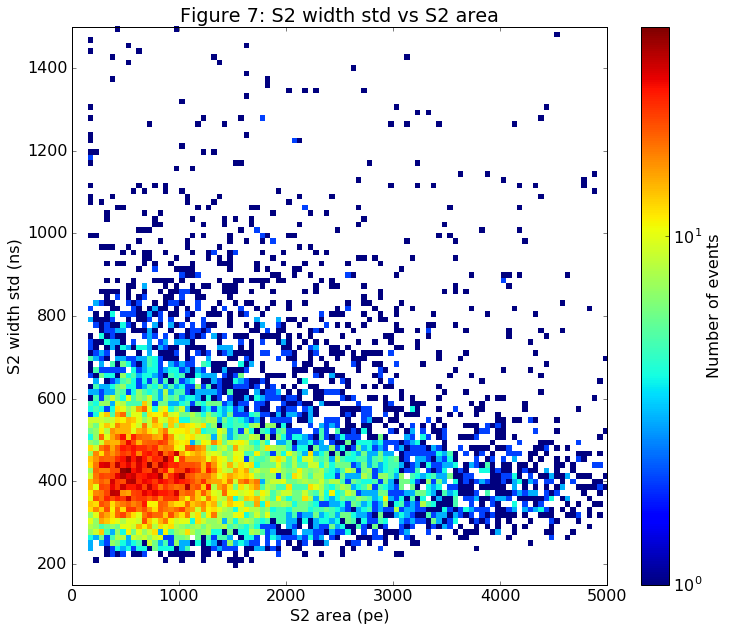

In [88]:
plt.hist2d(data['s2'],data['s2_width_std'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,5000],[150,1500]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('S2 area (pe)')
plt.ylabel('S2 width std (ns)')
plt.title("Figure 7: S2 width std vs S2 area")
plt.show()

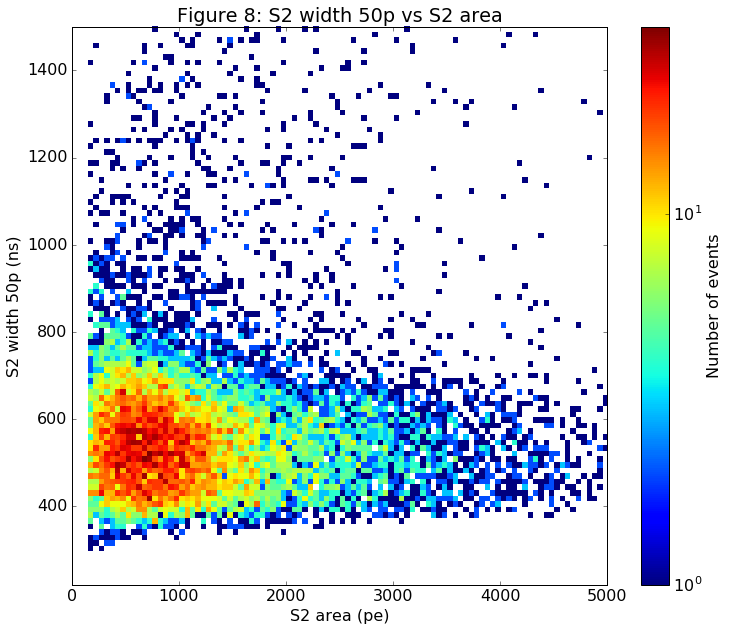

In [89]:
plt.hist2d(data['s2'],data['s2_width_50p'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,5000],[220,1500]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('S2 area (pe)')
plt.ylabel('S2 width 50p (ns)')
plt.title("Figure 8: S2 width 50p vs S2 area")
plt.show()

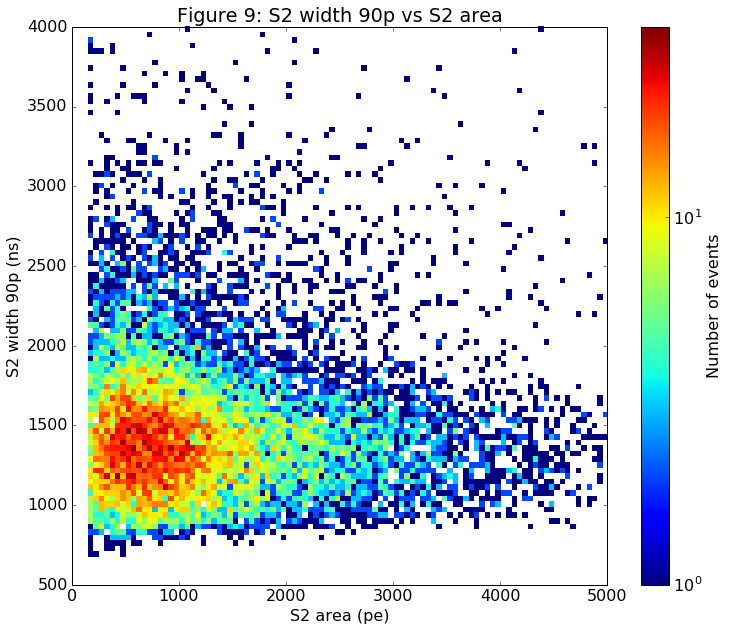

In [90]:
plt.hist2d(data['s2'],data['s2_width_90p'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,5000],[500,4000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('S2 area (pe)')
plt.ylabel('S2 width 90p (ns)')
plt.title("Figure 9: S2 width 90p vs S2 area")
plt.show()

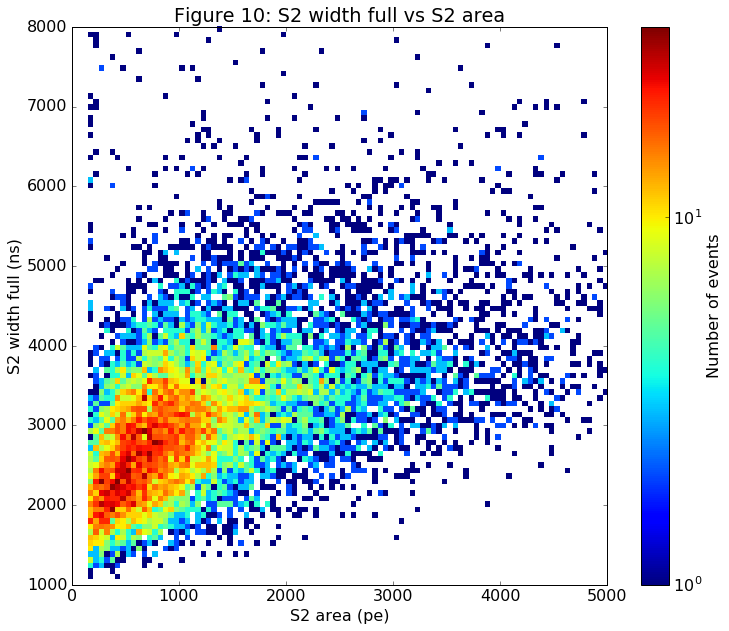

In [91]:
plt.hist2d(data['s2'],data['s2_width_full'], 
           bins=100, 
           norm=matplotlib.colors.LogNorm(),   # Logarithmic color scale
           range = [[0,5000],[1000,8000]]
)

# Make an S2 vs Drift time histogram
plt.colorbar(label='Number of events')
plt.xlabel('S2 area (pe)')
plt.ylabel('S2 width full (ns)')
plt.title("Figure 10: S2 width full vs S2 area")
plt.show()

## S2 width/area slices

In [92]:
#slices

cut_100_300    = ( (data['s2']> 100)  & (data['s2'] < 300))
cut_300_500    = ( (data['s2']> 300)  & (data['s2'] < 500)  )
cut_500_700    = ( (data['s2']> 500)  & (data['s2'] < 700)  )
cut_700_900    = ( (data['s2']> 700)  & (data['s2'] < 900)  )
cut_900_1100   = ( (data['s2']> 900)  & (data['s2'] < 1100) )
cut_1100_1300  = ( (data['s2']> 1100) & (data['s2'] < 1300) )
cut_1300_1500  = ( (data['s2']> 1300) & (data['s2'] < 1500) )
cut_1500_1700  = ( (data['s2']> 1500) & (data['s2'] < 1700) )
cut_1700_1900  = ( (data['s2']> 1700) & (data['s2'] < 1900) )
cut_1900_2100  = ( (data['s2']> 1900) & (data['s2'] < 2100) )


# S2 area (width std)

In [93]:
# set of s2_area_std slices

s2_area_std_100_300    = data[cut_100_300]['s2_width_std'] # [0]
s2_area_std_300_500    = data[cut_300_500]['s2_width_std'] # [1]
s2_area_std_500_700    = data[cut_500_700]['s2_width_std'] # [2]
s2_area_std_700_900    = data[cut_700_900]['s2_width_std'] # [3]
s2_area_std_900_1100   = data[cut_900_1100]['s2_width_std'] # [4]
s2_area_std_1100_1300  = data[cut_1100_1300]['s2_width_std'] # [5]
s2_area_std_1300_1500  = data[cut_1300_1500]['s2_width_std'] # [6]
s2_area_std_1500_1700  = data[cut_1500_1700]['s2_width_std'] # [7]
s2_area_std_1700_1900  = data[cut_1700_1900]['s2_width_std'] # [8]
s2_area_std_1900_2100  = data[cut_1900_2100]['s2_width_std'] # [9]

In [94]:
# Data frame 

#mean point intervals
s2_area_range = [100.,300.,500.,700.,900.,1100.,1300.,1500.,1700.,1900.]
df_area_std = pd.DataFrame(s2_area_range)
df_area_std.columns = ['s2_area']
#fitted values per slice
df_area_std['mean_width'] = 0.
df_area_std['mean_width_uncert']= 0.
df_area_std['std'] = 0.
df_area_std['std_uncert']= 0.

### Gaussian (100-300)

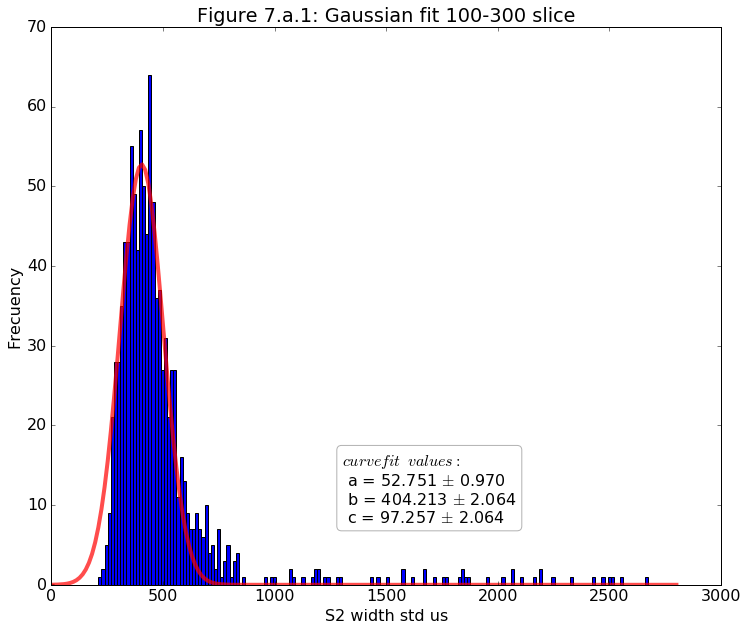

Correlation Matrix :
  1.000000  0.000000 -0.577350
  0.000000  1.000000 -0.000000
 -0.577350 -0.000000  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   52.75056 +/-    0.96961      (  10.00000)
p[1] =  404.21272 +/-    2.06423      ( 400.00000)
p[2] =   97.25687 +/-    2.06423      (  90.00000)

Chi-square = 1520.31935, Chi-Squared/dof =    7.71736


In [95]:

func = gaussian
n, bins, patches = plt.hist(s2_area_std_100_300, bins= 200, range=[0,2800],label= 'Histogram')

init = [10,400,90]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0,2800)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(1300, 8, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width std us')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.1: Gaussian fit 100-300 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)

        
chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

### Exponentially modified Gaussian (100-300)

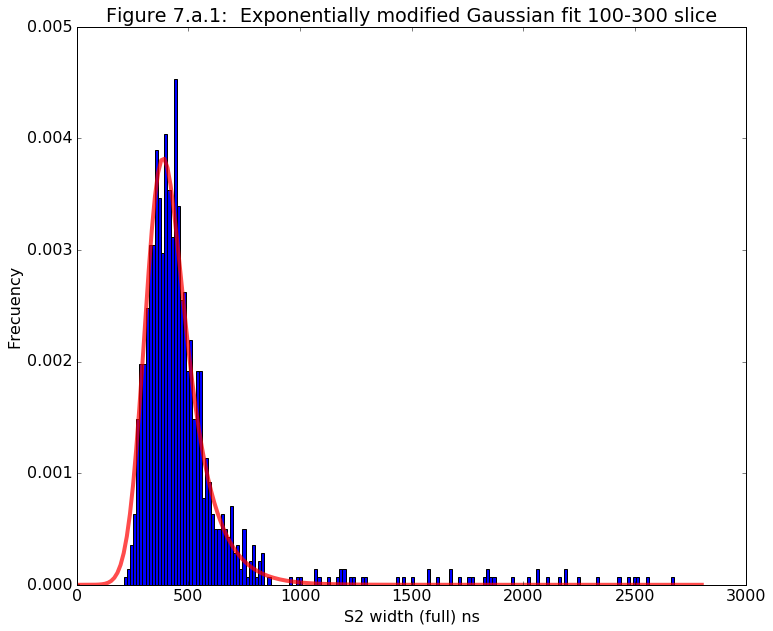

Correlation Matrix :
  1.000000 -0.407928  0.000000 -0.490025
 -0.407928  1.000000  0.561355  0.832464
  0.000000  0.561355  1.000000  0.674329
 -0.490025  0.832464  0.674329  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.96792 +/-    0.01561      (   1.00000)
p[1] =  325.94709 +/-    2.94069      ( 350.00000)
p[2] =   66.04883 +/-    2.69849      (  70.00000)
p[3] =    0.00926 +/-    0.00051      (   0.01000)

Chi-square =  772.29896, Chi-Squared/dof =    3.94030


In [96]:
# Exponentially modified Gaussian s2_area_std_100_300

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_100_300, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,350,70,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.1:  Exponentially modified Gaussian fit 100-300 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][0]        = popt[1]
df_area_std['mean_width_uncert'][0] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][0]               = popt[2]
df_area_std['std_uncert'][0]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 300-500 slice

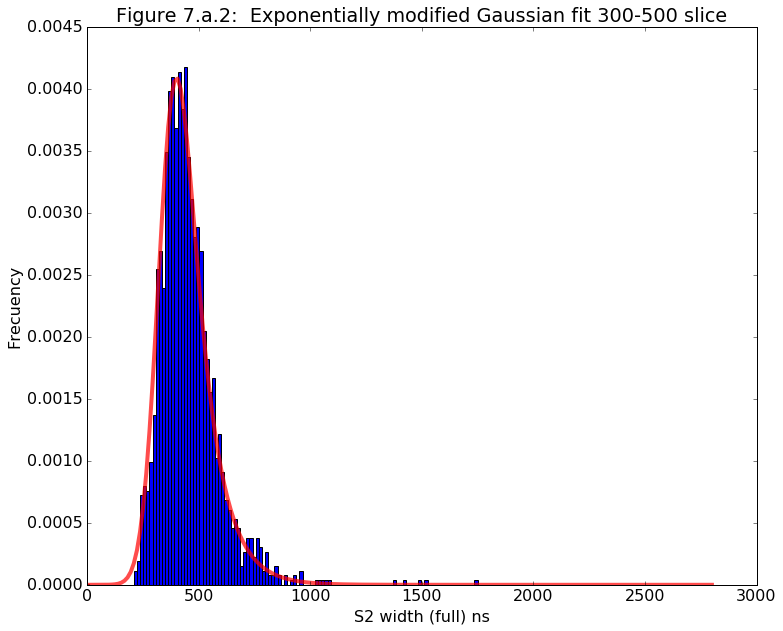

Correlation Matrix :
  1.000000 -0.405255  0.000000 -0.477069
 -0.405255  1.000000  0.587686  0.849470
  0.000000  0.587686  1.000000  0.691826
 -0.477069  0.849470  0.691826  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.99747 +/-    0.00942      (   1.00000)
p[1] =  343.28566 +/-    1.76389      ( 345.00000)
p[2] =   65.90145 +/-    1.56294      (  68.00000)
p[3] =    0.01006 +/-    0.00035      (   0.01000)

Chi-square =  247.10612, Chi-Squared/dof =    1.26075


In [97]:
# Exponentially modified Gaussian s2_area_std_300_500

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_300_500, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,345,68,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.2:  Exponentially modified Gaussian fit 300-500 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][1]        = popt[1]
df_area_std['mean_width_uncert'][1] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][1]               = popt[2]
df_area_std['std_uncert'][1]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 500-700 slice

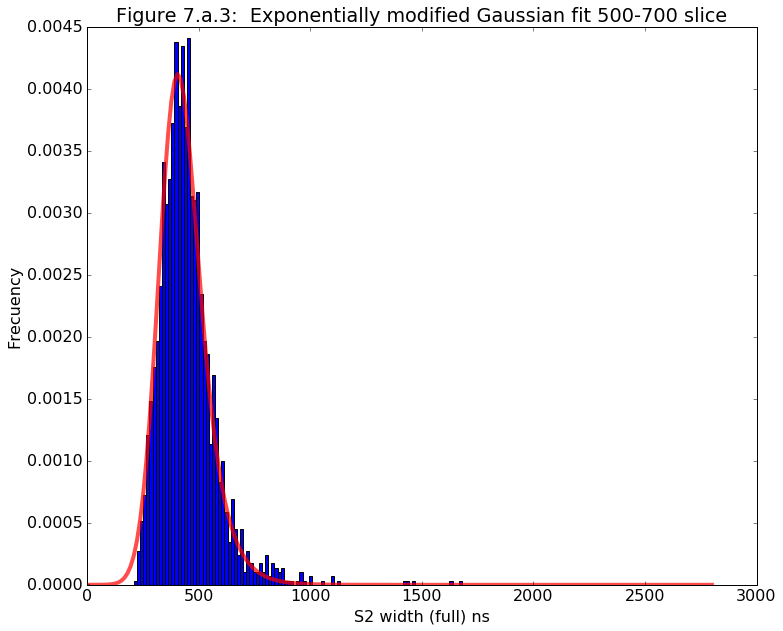

Correlation Matrix :
  1.000000 -0.380649  0.000000 -0.417712
 -0.380649  1.000000  0.695974  0.911271
  0.000000  0.695974  1.000000  0.763740
 -0.417712  0.911271  0.763740  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.99026 +/-    0.01022      (   1.00000)
p[1] =  353.55495 +/-    2.53269      ( 355.00000)
p[2] =   73.64442 +/-    1.88575      (  70.00000)
p[3] =    0.01269 +/-    0.00069      (   0.01000)

Chi-square =  369.47236, Chi-Squared/dof =    1.88506


In [98]:
# Exponentially modified Gaussian s2_area_std_500_700

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_500_700, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,355,70,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.3:  Exponentially modified Gaussian fit 500-700 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][2]        = popt[1]
df_area_std['mean_width_uncert'][2] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][2]               = popt[2]
df_area_std['std_uncert'][2]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 700-900 slice

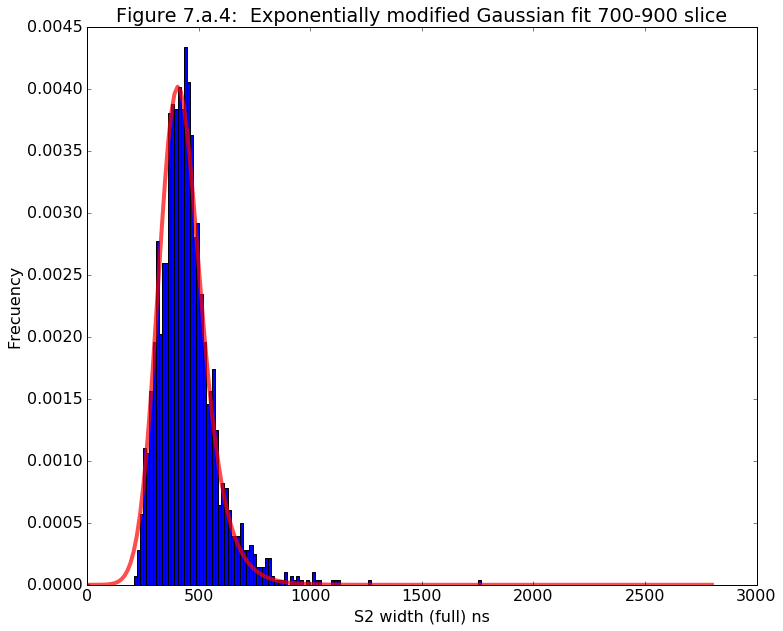

Correlation Matrix :
  1.000000 -0.375139  0.000000 -0.408191
 -0.375139  1.000000  0.711481  0.919029
  0.000000  0.711481  1.000000  0.774166
 -0.408191  0.919029  0.774166  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.98579 +/-    0.01121      (   1.00000)
p[1] =  353.80261 +/-    2.99138      ( 360.00000)
p[2] =   76.40874 +/-    2.16130      (  74.00000)
p[3] =    0.01289 +/-    0.00082      (   0.01000)

Chi-square =  543.12003, Chi-Squared/dof =    2.77102


In [99]:
# Exponentially modified Gaussian s2_area_std_700_900

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_700_900, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,360,74,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.4:  Exponentially modified Gaussian fit 700-900 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][3]        = popt[1]
df_area_std['mean_width_uncert'][3] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][3]               = popt[2]
df_area_std['std_uncert'][3]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 900-1100 slice

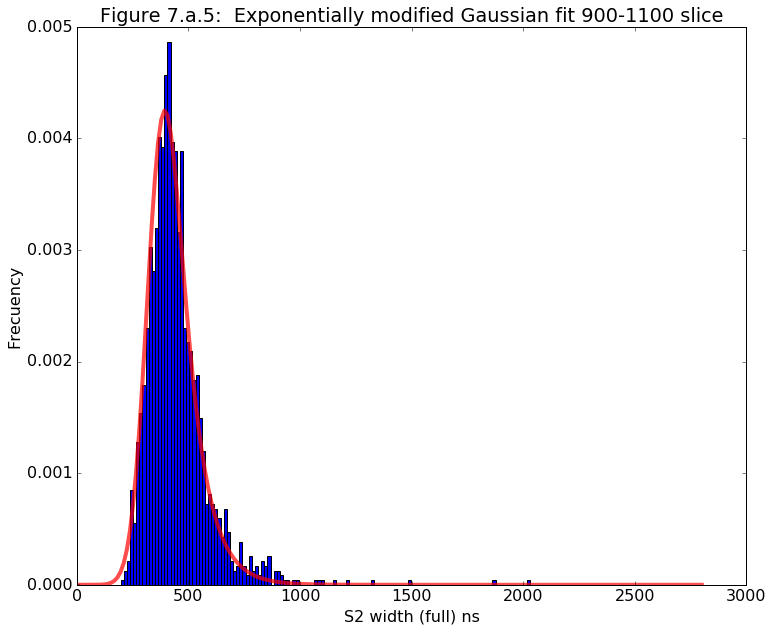

Correlation Matrix :
  1.000000 -0.400177  0.000000 -0.460170
 -0.400177  1.000000  0.620576  0.869629
  0.000000  0.620576  1.000000  0.713610
 -0.460170  0.869629  0.713610  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.97928 +/-    0.01750      (   1.00000)
p[1] =  340.02177 +/-    3.41239      ( 350.00000)
p[2] =   64.81197 +/-    2.88413      (  62.00000)
p[3] =    0.01133 +/-    0.00082      (   0.01000)

Chi-square =   78.66333, Chi-Squared/dof =    0.40134


In [100]:
# Exponentially modified Gaussian s2_area_std_900_1100

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_900_1100, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,350,62,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.5:  Exponentially modified Gaussian fit 900-1100 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][4]        = popt[1]
df_area_std['mean_width_uncert'][4] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][4]               = popt[2]
df_area_std['std_uncert'][4]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 1100-1300 slice

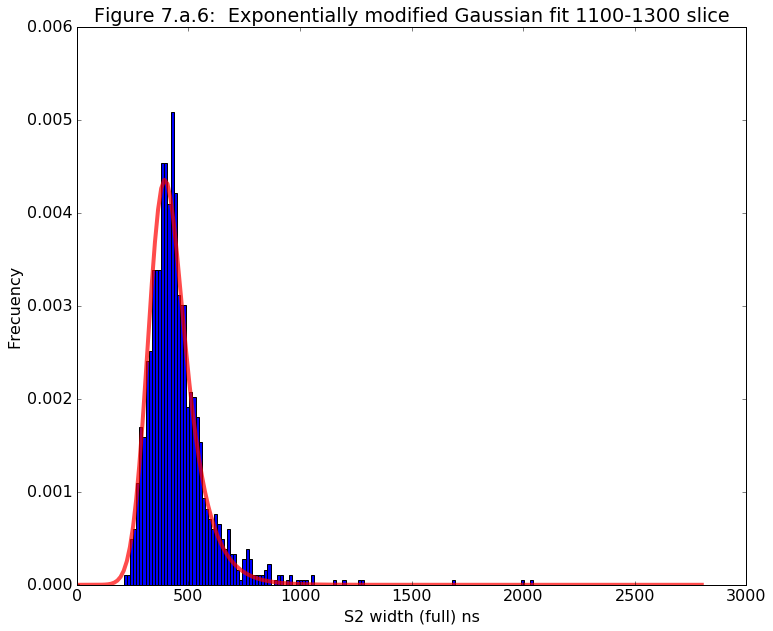

Correlation Matrix :
  1.000000 -0.402164  0.000000 -0.466132
 -0.402164  1.000000  0.609160  0.862768
  0.000000  0.609160  1.000000  0.706053
 -0.466132  0.862768  0.706053  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.97435 +/-    0.01496      (   1.00000)
p[1] =  341.49903 +/-    2.76560      ( 345.00000)
p[2] =   62.04264 +/-    2.37723      (  65.00000)
p[3] =    0.01142 +/-    0.00069      (   0.01000)

Chi-square =  118.70743, Chi-Squared/dof =    0.60565


In [101]:
# Exponentially modified Gaussian s2_area_std_1100_1300

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_1100_1300, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,345,65,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.6:  Exponentially modified Gaussian fit 1100-1300 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][5]        = popt[1]
df_area_std['mean_width_uncert'][5] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][5]               = popt[2]
df_area_std['std_uncert'][5]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 1300-1500 slice

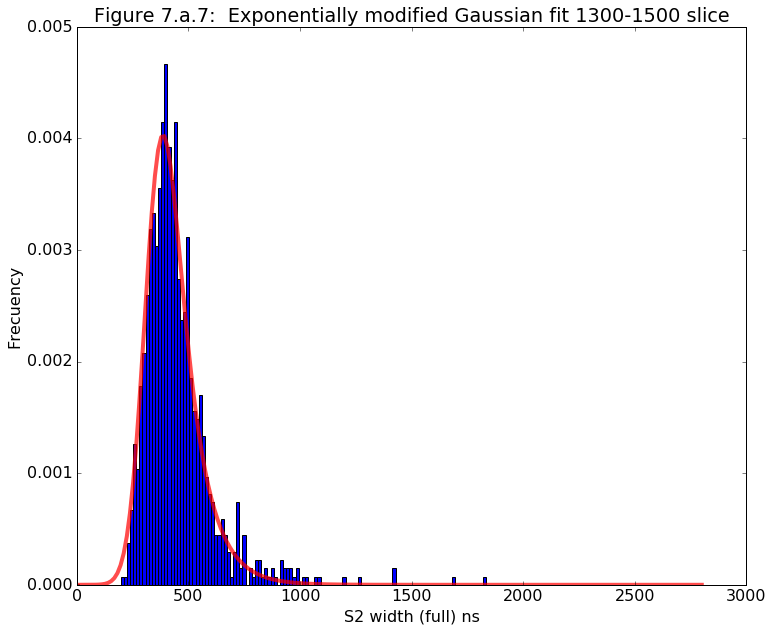

Correlation Matrix :
  1.000000 -0.405450 -0.000000 -0.477859
 -0.405450  1.000000  0.586107  0.848472
 -0.000000  0.586107  1.000000  0.690779
 -0.477859  0.848472  0.690779  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.98174 +/-    0.01337      (   1.00000)
p[1] =  327.95154 +/-    2.52798      ( 340.00000)
p[2] =   65.65761 +/-    2.24484      (  65.00000)
p[3] =    0.01005 +/-    0.00050      (   0.01000)

Chi-square =  458.17046, Chi-Squared/dof =    2.33760


In [102]:
# Exponentially modified Gaussian s2_area_std_1300_1500

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_1300_1500, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,340,65,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.7:  Exponentially modified Gaussian fit 1300-1500 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][6]        = popt[1]
df_area_std['mean_width_uncert'][6] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][6]               = popt[2]
df_area_std['std_uncert'][6]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 1500-1700 slice

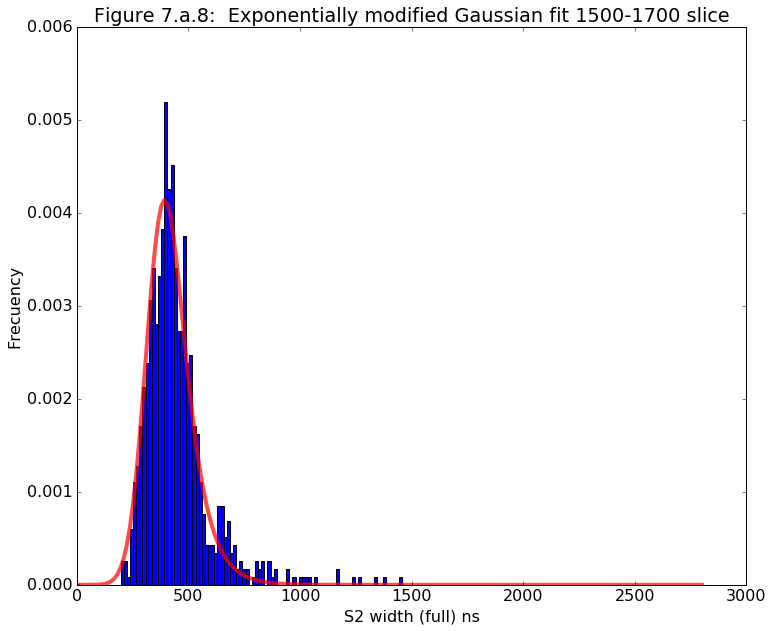

Correlation Matrix :
  1.000000 -0.384634 -0.000000 -0.425045
 -0.384634  1.000000  0.683686  0.904925
 -0.000000  0.683686  1.000000  0.755517
 -0.425045  0.904925  0.755517  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.96428 +/-    0.01634      (   1.00000)
p[1] =  341.10032 +/-    3.88679      ( 345.00000)
p[2] =   70.45551 +/-    2.96053      (  68.00000)
p[3] =    0.01274 +/-    0.00108      (   0.01000)

Chi-square =  266.20121, Chi-Squared/dof =    1.35817


In [103]:
# Exponentially modified Gaussian s2_area_std_1500_1700

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_1500_1700, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,345,68,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.8:  Exponentially modified Gaussian fit 1500-1700 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][7]        = popt[1]
df_area_std['mean_width_uncert'][7] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][7]               = popt[2]
df_area_std['std_uncert'][7]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 1700-1900 slice

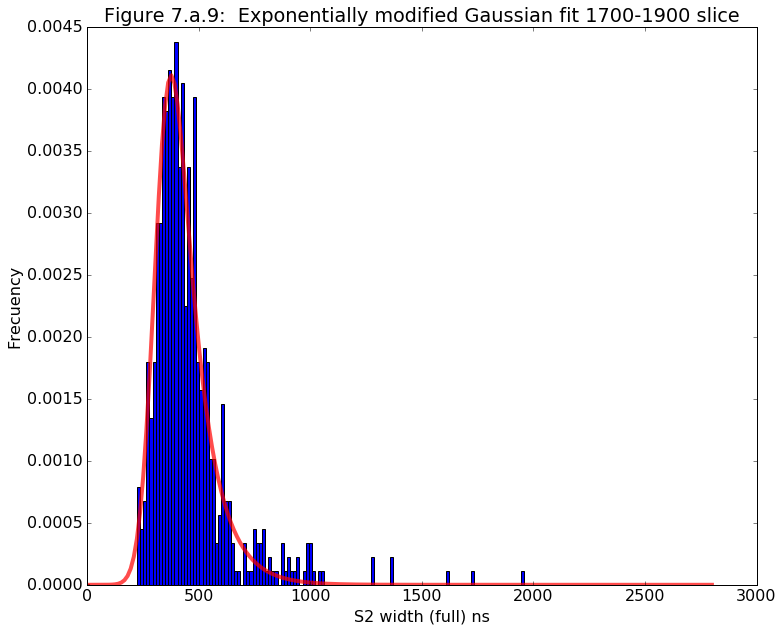

Correlation Matrix :
  1.000000 -0.409595  0.000000 -0.505762
 -0.409595  1.000000  0.528080  0.809858
  0.000000  0.528080  1.000000  0.652064
 -0.505762  0.809858  0.652064  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.96927 +/-    0.01928      (   1.00000)
p[1] =  320.31435 +/-    3.14245      ( 345.00000)
p[2] =   58.78361 +/-    3.00465      (  60.00000)
p[3] =    0.00940 +/-    0.00059      (   0.01000)

Chi-square = 1982.23211, Chi-Squared/dof =   10.11343


In [104]:
# Exponentially modified Gaussian s2_area_std_1700_1900

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_1700_1900, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,345,60,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.9:  Exponentially modified Gaussian fit 1700-1900 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][8]        = popt[1]
df_area_std['mean_width_uncert'][8] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][8]               = popt[2]
df_area_std['std_uncert'][8]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## 1900-2100 slice

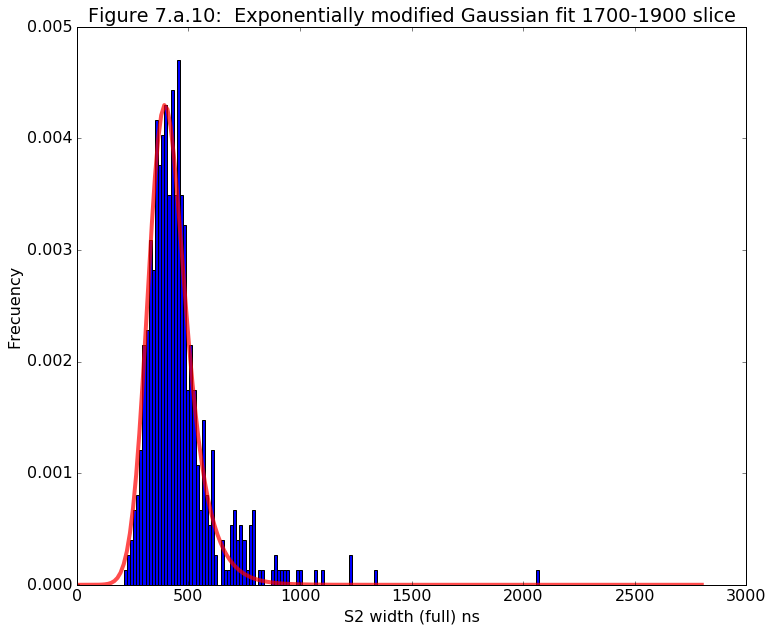

Correlation Matrix :
  1.000000 -0.391877 -0.000000 -0.439719
 -0.391877  1.000000  0.658178  0.891199
 -0.000000  0.658178  1.000000  0.738531
 -0.439719  0.891199  0.738531  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    0.95349 +/-    0.01666      (   1.00000)
p[1] =  343.86722 +/-    3.54338      ( 335.00000)
p[2] =   65.14576 +/-    2.82159      (  60.00000)
p[3] =    0.01269 +/-    0.00101      (   0.01000)

Chi-square = 2253.92891, Chi-Squared/dof =   11.49964


In [105]:
# Exponentially modified Gaussian s2_area_std_1900_2100

func = ModGaussian

n, bins, patches = plt.hist(s2_area_std_1900_2100, bins= 200, normed = 1, range=[0,2800],label= 'Histogram')

init2 = [1,335,60,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,2800)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.10:  Exponentially modified Gaussian fit 1700-1900 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

#update parameters for this slice
df_area_std['mean_width'][9]        = popt[1]
df_area_std['mean_width_uncert'][9] = cov[1,1]**0.5*max(1,np.sqrt(chisq/dof))
df_area_std['std'][9]               = popt[2]
df_area_std['std_uncert'][9]        = cov[2,2]**0.5*max(1,np.sqrt(chisq/dof))

## Results S2 area (width std)

In [106]:
# Results
df_area_std

s2_area  mean_width  mean_width_uncert        std  std_uncert
0    100.0  325.947094           2.940694  66.048827    2.698489
1    300.0  343.285663           1.763890  65.901453    1.562936
2    500.0  353.554951           2.532689  73.644417    1.885754
3    700.0  353.802611           2.991379  76.408739    2.161299
4    900.0  340.021769           3.412392  64.811970    2.884131
5   1100.0  341.499030           2.765597  62.042642    2.377233
6   1300.0  327.951539           2.527984  65.657612    2.244835
7   1500.0  341.100319           3.886788  70.455508    2.960528
8   1700.0  320.314350           3.142454  58.783605    3.004651
9   1900.0  343.867219           3.543378  65.145755    2.821587

In [107]:
# For the following plot \mu and \sigma are normalize to be 1 at 700 pe
df_area_std['mean_width_uncert'] = df_area_std['mean_width_uncert']/df_area_std['mean_width'][3]
df_area_std['mean_width'] = df_area_std['mean_width']/df_area_std['mean_width'][3]
df_area_std['std_uncert'] = df_area_std['std_uncert']/df_area_std['std'][3]
df_area_std['std'] = df_area_std['std']/df_area_std['std'][3]
df_area_std

s2_area  mean_width  mean_width_uncert       std  std_uncert
0    100.0    0.921268           0.008312  0.864415    0.035316
1    300.0    0.970275           0.004986  0.862486    0.020455
2    500.0    0.999300           0.007158  0.963822    0.024680
3    700.0    1.000000           0.008455  1.000000    0.028286
4    900.0    0.961049           0.009645  0.848227    0.037746
5   1100.0    0.965225           0.007817  0.811984    0.031112
6   1300.0    0.926934           0.007145  0.859295    0.029379
7   1500.0    0.964098           0.010986  0.922087    0.038746
8   1700.0    0.905348           0.008882  0.769331    0.039323
9   1900.0    0.971918           0.010015  0.852596    0.036928

/afs/pdc.kth.se/projects/xenon/software/Anaconda3r5/envs/pax/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


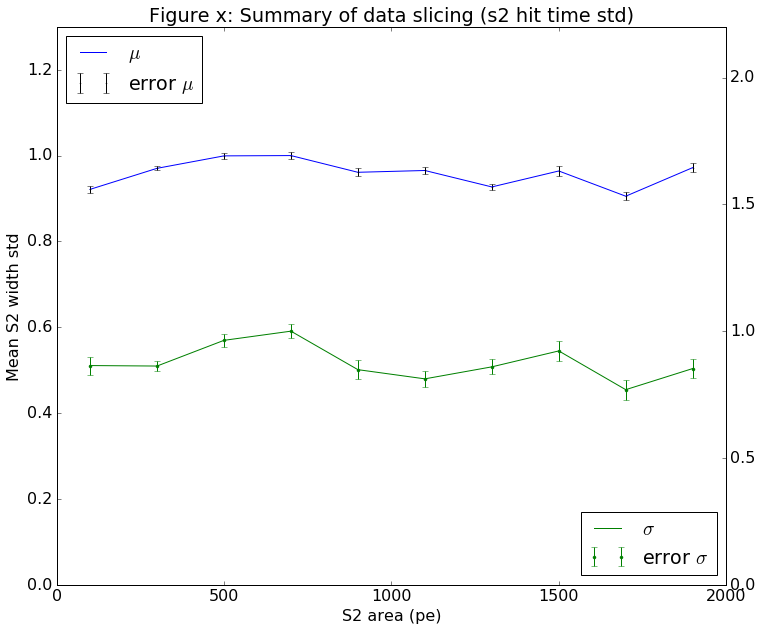

In [111]:
# Plot data and fit
fig, ax = plt.subplots(1, 1)
ax.plot(df_area_std['s2_area'],df_area_std['mean_width'],"b-",label='$\mu$')
ax.errorbar(df_area_std['s2_area'], df_area_std['mean_width'], yerr=df_area_std['mean_width_uncert'], 
            fmt='o', markersize=1, color='k', label='error $\mu$')

ax2 = ax.twinx()
ax2.plot(df_area_std['s2_area'],df_area_std['std'],"g-",label='$\sigma$')
ax2.errorbar(df_area_std['s2_area'], df_area_std['std'], yerr=df_area_std['std_uncert'], fmt='.', 
             color='g',label='error $\sigma$')

#  legend customization
ax.legend(loc='upper left')
ax2.legend(loc="lower right")

#Axis labels
ax.set_ylim(0,1.3)
ax2.set_ylim(0,2.2)
ax.set_xlabel('S2 area (pe)')
ax.set_ylabel('Mean S2 width std')

# Title
ax.set_title("Figure x: Summary of data slicing (s2 hit time std)")

fig.show()

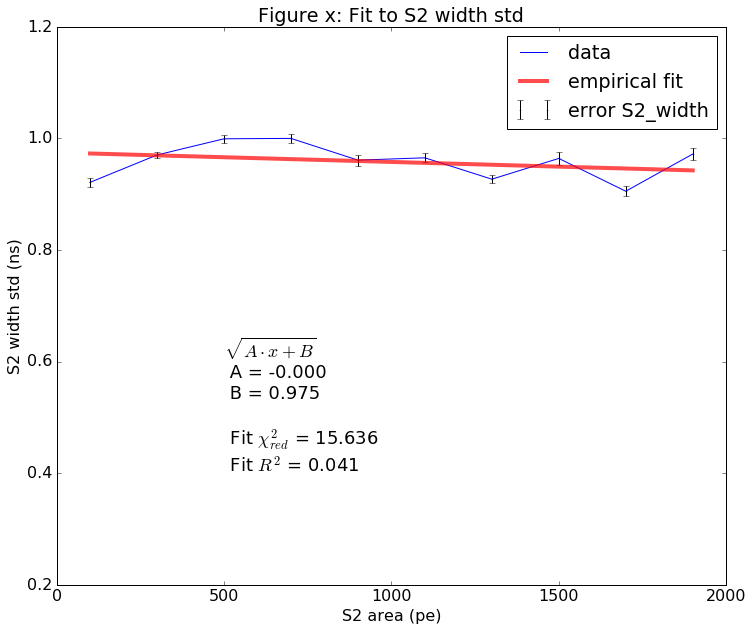

In [128]:
#Fit function s2 area

function = empirical_function

popt, pcov = curve_fit(function, df_area_std['s2_area'], df_area_std['mean_width'], sigma= df_area_std['mean_width_uncert'], method='lm') 

# Calculate degrees of freedom of fit
dof = len(df_area_std['mean_width']) - len(popt)

# Calculate chisq
chisq = (1/dof)*sum(((function(df_area_std['s2_area'],*popt)-
                      df_area_std['mean_width'])/df_area_std['mean_width_uncert'])**2)

# Calculate $R^2$
R2= 1 - sum(((df_area_std['mean_width'] -
              function(df_area_std['s2_area'],*popt)))**2)/sum((df_area_std['mean_width'] -
                                                                np.mean(df_area_std['mean_width']))**2)


# Plot data and fit
plt.plot(df_area_std['s2_area'],df_area_std['mean_width'], label='data')
plt.errorbar(df_area_std['s2_area'], df_area_std['mean_width'], yerr=df_area_std['mean_width_uncert'], fmt='o', 
             markersize=1, color='k', label='error S2_width')
plt.plot(df_area_std['s2_area'], function(df_area_std['s2_area'], *popt), 
         linewidth = 4.0, alpha = 0.7, color = 'red', label= 'empirical fit')
props = dict(boxstyle='round', facecolor='None', alpha=0.0)
plt.text(500, 0.4, 
    ('$ \sqrt{A \cdot x + B}$\n A = %.3f \n B = %.3f \n \n Fit $\chi^2_{red}$ = %.3f \n Fit $R^2$ = %.3f ' 
    % (popt[0], popt[1], chisq,R2)), fontsize=18,bbox=props )
plt.ylim(0.2,1.2)

# Legend customization
pylab.legend(loc='upper right')
# Axis labels
plt.xlabel('S2 area (pe)')
plt.ylabel('S2 width std (ns)')
# Title
plt.title("Figure x: Fit to S2 width std")
plt.show()

# S2 area (width 50p)

## 0-400 slice

In [ ]:
## 400-800 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

In [ ]:
## 0-20 slice

# S2 area (width 90p)

# S2 area (width full)

In [128]:
# set of s2_area_full slices

s2_area_full_0_400      = data[cut_0_400]['s2_width_full'] # [0]
s2_area_full_400_800    = data[cut_400_800]['s2_width_full'] # [1]
s2_area_full_800_1200   = data[cut_800_1200]['s2_width_full'] # [2]
s2_area_full_1200_1600  = data[cut_1200_1600]['s2_width_full'] # [3]
s2_area_full_1600_2000  = data[cut_1600_2000]['s2_width_full'] # [4]
s2_area_full_2000_2400  = data[cut_2000_2400]['s2_width_full'] # [5]
s2_area_full_2400_2800  = data[cut_2400_2800]['s2_width_full'] # [6]
s2_area_full_2800_3200  = data[cut_2800_3200]['s2_width_full'] # [7]
s2_area_full_3200_3600  = data[cut_3200_3600]['s2_width_full'] # [8]
s2_area_full_3600_4000  = data[cut_3600_4000]['s2_width_full'] # [9]
s2_area_full_4000_4400  = data[cut_4000_4400]['s2_width_full'] # [10]
s2_area_full_4400_4800  = data[cut_4400_4800]['s2_width_full'] # [11]

# Data frame 

#mean point intervals
s2_area_range = [200.,600.,1000.,1400.,1800.,2200.,2600.,3000.,3400.,3800.]
df_area_full = pd.DataFrame(s2_area_range)
df_area_full.columns = ['s2_area']
#fitted values per slice
df_area_full['mean_width'] = 0.
df_area_full['mean_width_uncert']= 0.
df_area_full['full'] = 0.
df_area_full['full_uncert']= 0.
df_area_full

s2_area  mean_width  mean_width_uncert  full  full_uncert
0    200.0         0.0                0.0   0.0          0.0
1    600.0         0.0                0.0   0.0          0.0
2   1000.0         0.0                0.0   0.0          0.0
3   1400.0         0.0                0.0   0.0          0.0
4   1800.0         0.0                0.0   0.0          0.0
5   2200.0         0.0                0.0   0.0          0.0
6   2600.0         0.0                0.0   0.0          0.0
7   3000.0         0.0                0.0   0.0          0.0
8   3400.0         0.0                0.0   0.0          0.0
9   3800.0         0.0                0.0   0.0          0.0

### Gaussian (0-400)

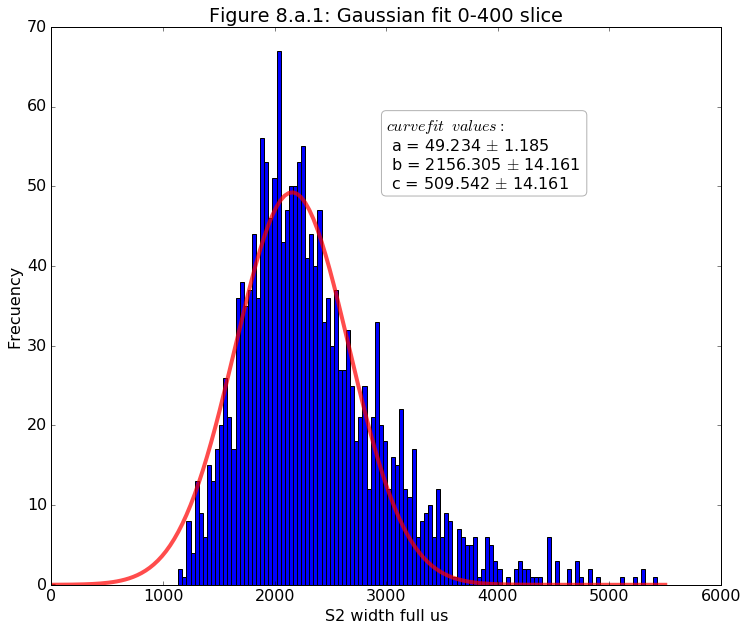

Correlation Matrix :
  1.000000  0.000000 -0.577350
  0.000000  1.000000 -0.000000
 -0.577350 -0.000000  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =   49.23447 +/-    1.18498      (  60.00000)
p[1] = 2156.30547 +/-   14.16092      (2400.00000)
p[2] =  509.54184 +/-   14.16092      ( 550.00000)

Chi-square = 3389.47365, Chi-Squared/dof =   23.05764


In [142]:

func = gaussian
n, bins, patches = plt.hist(s2_area_full_0_400, bins= 150, range=[0,5500],label= 'Histogram')

init = [60,2400,550]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init, bounds=(0,5500)) 
sigma = np.sqrt(np.diag(pcov) ) # sqrt(diag elements) of pcov are the 1 sigma deviations

plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'Gaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(3000, 50, 
    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width full us')
plt.ylabel('Frecuency')
plt.title("Figure 8.a.1: Gaussian fit 0-400 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate dof of fit: equal to the number of points, minus the number of free parameters of the fit function
dof = len(bins[:-1]) - len(popt)

        
chisq = sum(((n-func(bins[:-1],*popt))/1)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")
#  Note: If the fit is poor, i.e. chisq/dof is large, the uncertainties
#   are scaled up. If the fit is too good, i.e. chisq/dof << 1, it suggests
#   that the uncertainties have been overestimated, but the uncertainties
#   are not scaled down.
for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))

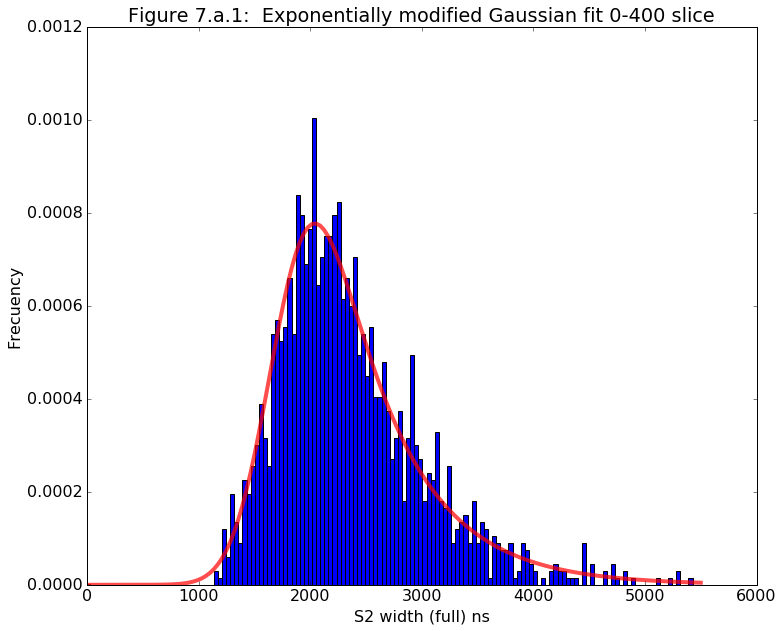

Correlation Matrix :
  1.000000 -0.410090 -0.001680 -0.527767
 -0.410090  1.000000  0.482929  0.777049
 -0.001680  0.482929  1.000000  0.621481
 -0.527767  0.777049  0.621481  1.000000

Estimated parameters and uncertainties (with initial guesses)
p[0] =    1.00724 +/-    0.02486      (   1.00000)
p[1] = 1728.44826 +/-   19.47610      ( 310.00000)
p[2] =  301.29467 +/-   19.60674      (  65.00000)
p[3] =    0.00159 +/-    0.00011      (   0.01000)

Chi-square =   86.30979, Chi-Squared/dof =    0.59116


In [144]:
# Exponentially modified Gaussian s2_area_full_0_400

func = ModGaussian

n, bins, patches = plt.hist(s2_area_full_0_400, bins= 150, normed = 1, range=[0,5500],label= 'Histogram')

init2 = [1,310,65,0.01]
popt, pcov = curve_fit(func, bins[:-1], n, p0=init2, bounds=(0,5500)) 
sigma2 = np.sqrt(np.diag(pcov)) # sqrt(diag elements) of pcov are the 1 sigma deviations


plt.plot(bins, func(bins, *popt), linewidth = 4.0, alpha = 0.7, color = 'red',label = 'ModGaussian')
props = dict(boxstyle='round', facecolor='white', alpha=0.3)

#plt.text(1000, 100, 
#    ('$curve fit\;\;values:\;$\n a = %.3f $\pm$ %.3f\n b = %.3f $\pm$ %.3f \n c = %.3f $\pm$ %.3f' 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel('S2 width (full) ns')
plt.ylabel('Frecuency')
plt.title("Figure 7.a.1:  Exponentially modified Gaussian fit 0-400 slice")
plt.show()

# Calculate residuals (difference between data and fit)
for i in enumerate(n):
    y_fit = func(bins[:-1],*popt)
    y_residual = n - y_fit
    
# Calculate degrees of freedom of fit
dof = len(bins[:-1]) - len(popt)

weight = np.zeros_like(n)
for i, nx in enumerate(n):
    if nx > 0:
        weight[i] = np.sqrt(nx)
    else:
        weight[i] = 0.00001

chisq = sum(((n-func(bins[:-1],*popt))/weight)**2)

# Convert Scipy cov matrix to standard covariance matrix.
cov = pcov*dof/chisq
print("Correlation Matrix :")
for i,row in enumerate(cov):
        for j in range(len(popt)) :
            print("{:10f}".format(cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])),end="")
        print()
print("\nEstimated parameters and uncertainties (with initial guesses)")

for i in range(len(popt)):
        print("p[{:d}] = {:10.5f} +/- {:10.5f}      ({:10.5f})"
                   .format(i,popt[i],cov[i,i]**0.5*max(1,np.sqrt(chisq/dof)),
                       init2[i]))

cdf = scipy.special.chdtrc(dof,chisq)

print("\nChi-square = {:10.5f}, Chi-Squared/dof = {:10.5f}"\
        .format(chisq, chisq/dof))


In [ ]:
## 0-400 slice

In [ ]:
## 400-800 slice

In [ ]:
## 800-1200 slice

In [ ]:
## 1200-1600 slice

In [ ]:
## 1600-2000 slice

In [ ]:
## 2000-2400 slice

In [ ]:
## 2400-2800 slice

In [ ]:
## 2800-3200 slice

In [ ]:
## 3200-3600 slice

In [ ]:
## 3600-4000 slice

# Longitudinal diffusion coefficient

# Annex

_About clustering_:

See e.g. pax issue[XENON1T/pax#225](https://github.com/XENON1T/pax/issues/225 "XENON1T/pax#225").
    
The main problem is that the current algorithm works well at low energy (or rather high sparsity, i.e. not so many hits) but poorly at high energy. Of course low-energy is most important, but some high-energy applications are also relevant (in particular the Cs137 photopeak). The same is true for our S2 and drift time measures: they were all chosen to give the best performance on low-energy events, so if you try them on Cs137, you can see some weird things.

One solution would be to make a separate algorithm for high-energy (e.g. a sum-waveform cutoff minimum cutoff like in Xerawdp, we actually had this in a much earlier version of pax) since it would add extra complexity, extra parameters to be tuned, and a 'transition' somewhere in our analysis range which could make life more difficult for acceptance calculations etc. Perhaps, however, we could only enable such an algorithm for very large peaks (say >10k pe), transition smoothly from one algorithm to another, or only use the high-energy algorithm while processing Cs data.

Another avenue is trying to improve the existing clustering to work better at high energy. There are a few low-energy cases of interest where such an improvement may help as well, in particular highly asymmetric splits, e.g. a very small S1 just in front of a medium/large S2).

An entirely different route is to come up with some neural net (probably recurrent and/or convolutional) to do the clustering for us. This would not be easy, and you'd have to train it on a lot of simulated data. You may draw some inspiration from systems that do character separation for handwriting recognition.

If one is interested in developing the clustering, It is recommend to check out PeakfinderTest (https://github.com/XENON1T/XeAnalysisScripts/tree/master/PeakFinderTest), which lets you test the performance of the clustering on simulated data.